In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [5]:
df = pd.read_csv('datasets\one_hot_encoded\combined-data.csv')

df.head()

Year  Temperature        Co2  Country_Albania  Country_Algeria  \
0  1970        0.248   8.952570                0                0   
1  1970        0.082   0.002168                0                0   
2  1970       -0.106   4.814516                1                0   
3  1970        0.422  19.437564                0                0   
4  1970        0.438  88.321009                0                0   

   Country_Angola  Country_Anguilla  Country_Antigua and Barbuda  \
0               1                 0                            0   
1               0                 1                            0   
2               0                 0                            0   
3               0                 0                            0   
4               0                 0                            0   

   Country_Argentina  Country_Australia  ...  Country_Uganda  \
0                  0                  0  ...               0   
1                  0                  0  ...               0   
2                  0                  0  ...               0   
3                  0                  0  ...               0   
4                  1                  0  ...               0   

   Country_United Arab Emirates  Country_United Kingdom  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             1                       0   
4                             0                       0   

   Country_United States  Country_Uruguay  Country_Vanuatu  Country_Vietnam  \
0                      0                0                0                0   
1                      0                0                0                0   
2                      0                0                0                0   
3                      0                0                0                0   
4                      0                0                0                0   

   Country_Western Sahara  Country_Zambia  Country_Zimbabwe  
0                       0               0                 0  
1                       0               0                 0  
2                       0               0                 0  
3                       0               0                 0  
4                       0               0                 0  

[5 rows x 135 columns]

In [6]:
avg_by_year = df.groupby('Year').mean()


X = avg_by_year[['Co2']].values
y = avg_by_year['Temperature'].values


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=1)
])


model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train, batch_size=5, epochs=50, validation_data=(X_test, y_test))


loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


predictions = model.predict(X_test)



Epoch 1/50
9/9 [==============================] - 6s 133ms/step - loss: 0.2744 - val_loss: 1.1994
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.2402 - val_loss: 1.0729
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.2045 - val_loss: 0.9347
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1723 - val_loss: 0.7698
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1296 - val_loss: 0.6115
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1018 - val_loss: 0.4376
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0796 - val_loss: 0.2910
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0691 - val_loss: 0.2121
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0654 - val_loss: 0.1835
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0627 - val_loss: 0.1689
Epoch 11/50
9/9 [=============

In [11]:
mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 0.04903694457751026
RMSE: 0.22144286978250227
MAE: 0.18344051355960944
R^2: -0.06550016617231291


In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, predictions, color='blue', label='Predicted', marker='o')
plt.scatter(X_test, y_test, color='red', label='Actual', marker='o')
plt.scatter(X_train, y_train, color='purple', label='trained', marker='o')

plt.title("Overall - Actual vs Predicted")

plt.legend()

plt.show()

Epoch 1/50
9/9 [==============================] - 5s 131ms/step - loss: 0.3869 - val_loss: 2.0778
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3742 - val_loss: 1.9944
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3646 - val_loss: 1.9322
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3589 - val_loss: 1.8502
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3503 - val_loss: 1.8036
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3455 - val_loss: 1.7451
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3403 - val_loss: 1.7238
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3387 - val_loss: 1.6862
Epoch 9/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3350 - val_loss: 1.6772
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.3333 - val_loss: 1.6648
Epoch 11/50
9/9 [===============

Epoch 1/50
9/9 [==============================] - 7s 128ms/step - loss: 0.8522 - val_loss: 2.2309
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 0.8048 - val_loss: 2.0662
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.7508 - val_loss: 1.8756
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6849 - val_loss: 1.6557
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6255 - val_loss: 1.3949
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.5515 - val_loss: 1.0820
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4833 - val_loss: 0.7567
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.4259 - val_loss: 0.4908
Epoch 9/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3926 - val_loss: 0.3711
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3803 - val_loss: 0.2953
Epoch 11/50
9/9 [============

Epoch 1/50
9/9 [==============================] - 5s 135ms/step - loss: 0.2683 - val_loss: 1.4142
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2414 - val_loss: 1.2899
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2102 - val_loss: 1.1579
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1817 - val_loss: 1.0063
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1515 - val_loss: 0.8527
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1272 - val_loss: 0.6674
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1097 - val_loss: 0.5079
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1049 - val_loss: 0.4095
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1062 - val_loss: 0.3729
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1057 - val_loss: 0.3854
Epoch 11/50
9/9 [===========

1/1 [==============================] - 1s 1s/step
Country_Angola MSE: 0.19224978107006485
r^2:  -0.46594157448236606


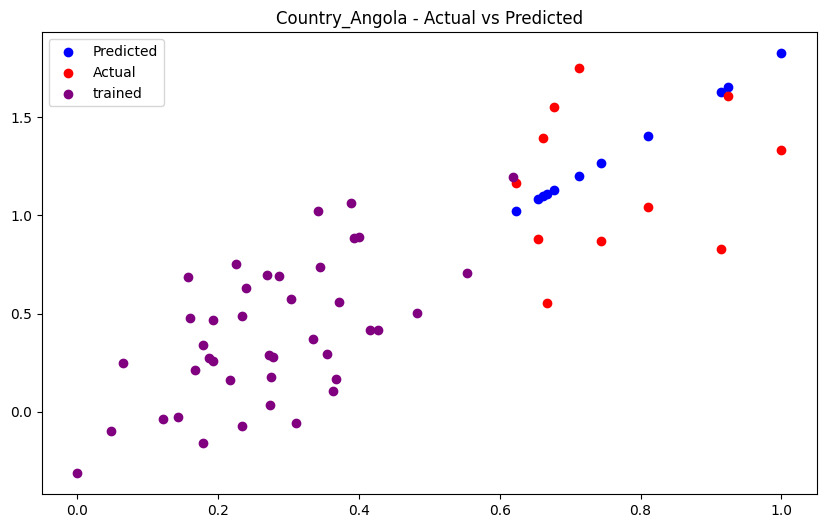

Epoch 1/50
9/9 [==============================] - 6s 159ms/step - loss: 0.2607 - val_loss: 0.6946
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2341 - val_loss: 0.6117
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2094 - val_loss: 0.5194
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1844 - val_loss: 0.4134
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1535 - val_loss: 0.3063
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1320 - val_loss: 0.1858
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1117 - val_loss: 0.1071
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1042 - val_loss: 0.0735
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1021 - val_loss: 0.0579
Epoch 10/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0977 - val_loss: 0.0572
Epoch 11/50
9/9 [===========

1/1 [==============================] - 1s 913ms/step
Country_Anguilla MSE: 0.1910281879850997
r^2:  -3.330476266398632


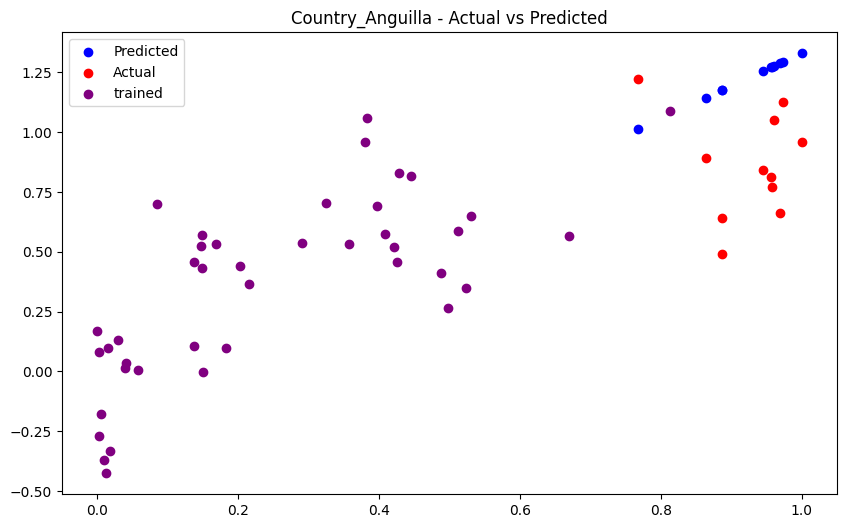

Epoch 1/50
9/9 [==============================] - 6s 219ms/step - loss: 0.2595 - val_loss: 0.6873
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2377 - val_loss: 0.6207
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2148 - val_loss: 0.5394
Epoch 4/50
9/9 [==============================] - 0s 23ms/step - loss: 0.1898 - val_loss: 0.4425
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1688 - val_loss: 0.3335
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1457 - val_loss: 0.2402
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1266 - val_loss: 0.1630
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1239 - val_loss: 0.1006
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1188 - val_loss: 0.0819
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1193 - val_loss: 0.0720
Epoch 11/50
9/9 [===========

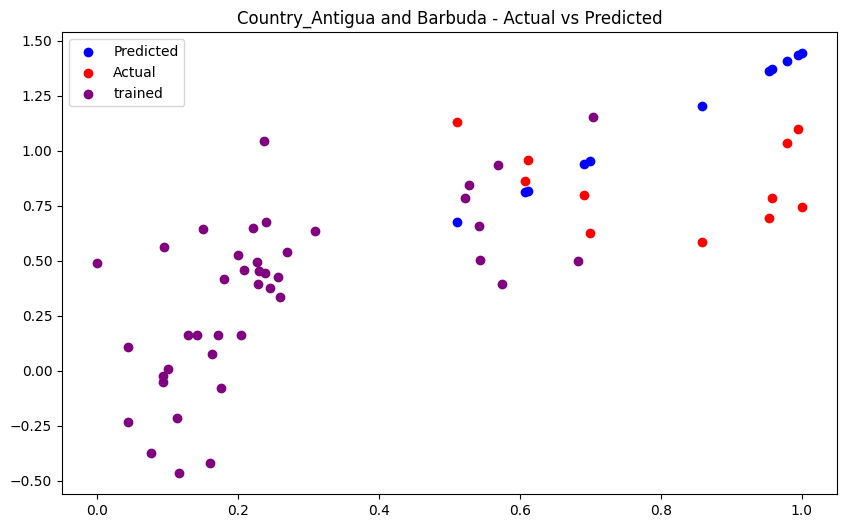

Epoch 1/50
9/9 [==============================] - 6s 142ms/step - loss: 0.1432 - val_loss: 0.6210
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 0.1259 - val_loss: 0.5430
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1111 - val_loss: 0.4568
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0972 - val_loss: 0.3721
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0867 - val_loss: 0.2997
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0827 - val_loss: 0.2403
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0823 - val_loss: 0.2031
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0830 - val_loss: 0.2143
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0824 - val_loss: 0.2064
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0821 - val_loss: 0.2335
Epoch 11/50
9/9 [===========

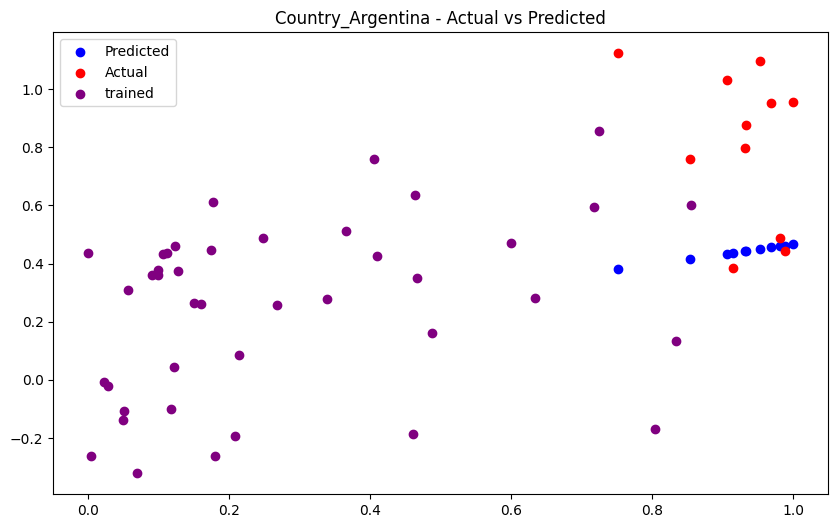

Epoch 1/50
9/9 [==============================] - 6s 146ms/step - loss: 0.3354 - val_loss: 1.1214
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2992 - val_loss: 1.0116
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2550 - val_loss: 0.8867
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.2135 - val_loss: 0.7331
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1696 - val_loss: 0.5695
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1300 - val_loss: 0.4201
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1143 - val_loss: 0.3200
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1091 - val_loss: 0.2836
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1075 - val_loss: 0.2890
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1065 - val_loss: 0.2730
Epoch 11/50
9/9 [===========

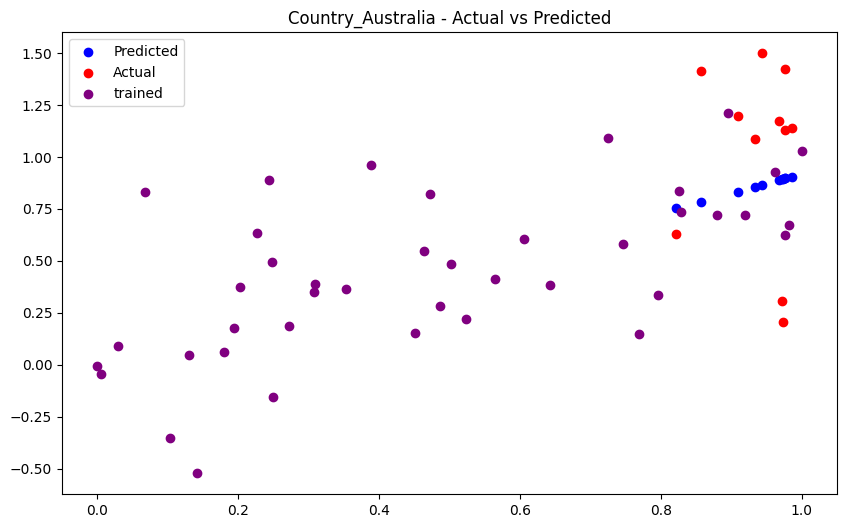

Epoch 1/50
9/9 [==============================] - 5s 138ms/step - loss: 0.9190 - val_loss: 3.8141
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.8711 - val_loss: 3.6635
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.8257 - val_loss: 3.4831
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.7693 - val_loss: 3.2863
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.7063 - val_loss: 3.0694
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.6476 - val_loss: 2.7775
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.5710 - val_loss: 2.4928
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.5109 - val_loss: 2.2214
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4694 - val_loss: 1.8859
Epoch 10/50
9/9 [==============================] - 0s 20ms/step - loss: 0.4346 - val_loss: 1.7130
Epoch 11/50
9/9 [===========

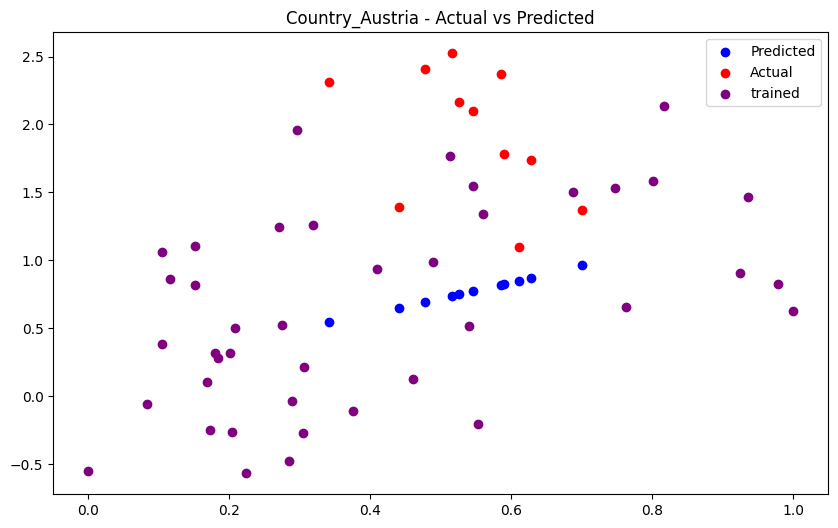

Epoch 1/50
9/9 [==============================] - 6s 157ms/step - loss: 0.2422 - val_loss: 0.9938
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2175 - val_loss: 0.9008
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1938 - val_loss: 0.7932
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1698 - val_loss: 0.6945
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1543 - val_loss: 0.5999
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1424 - val_loss: 0.5333
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1376 - val_loss: 0.4911
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1358 - val_loss: 0.4625
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1341 - val_loss: 0.4893
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1311 - val_loss: 0.4803
Epoch 11/50
9/9 [===========

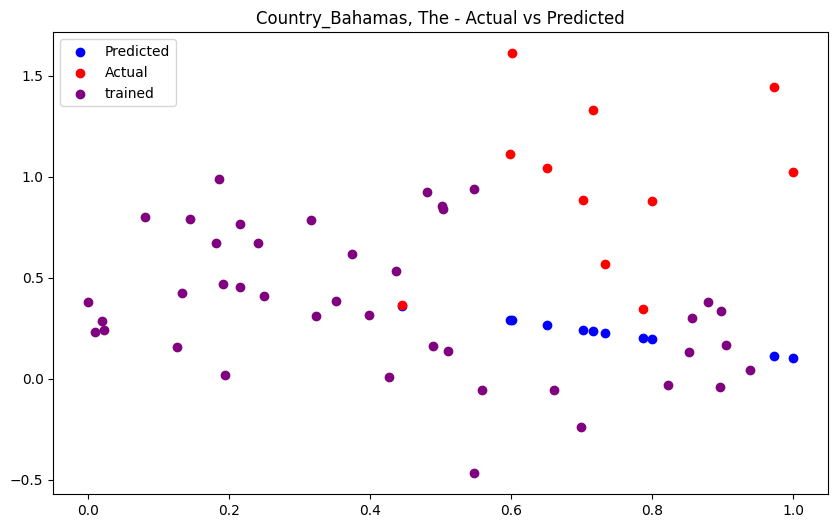

Epoch 1/50
9/9 [==============================] - 6s 139ms/step - loss: 0.1256 - val_loss: 0.7126
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1185 - val_loss: 0.6637
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1142 - val_loss: 0.6017
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1095 - val_loss: 0.5454
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1046 - val_loss: 0.4906
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1016 - val_loss: 0.4114
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0982 - val_loss: 0.3553
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0969 - val_loss: 0.3290
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0947 - val_loss: 0.2769
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0915 - val_loss: 0.2237
Epoch 11/50
9/9 [===========

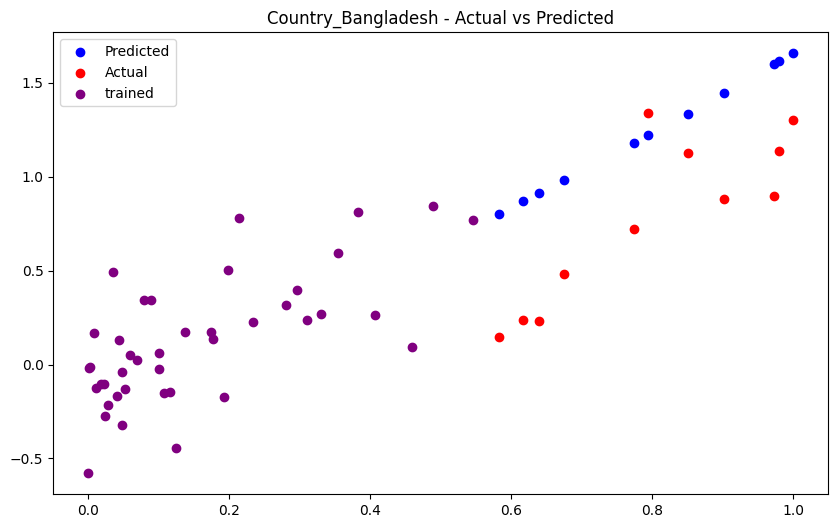

Epoch 1/50
9/9 [==============================] - 5s 137ms/step - loss: 0.2353 - val_loss: 1.1469
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2086 - val_loss: 1.0324
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1855 - val_loss: 0.9011
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1589 - val_loss: 0.7728
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1414 - val_loss: 0.6777
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1330 - val_loss: 0.5940
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1266 - val_loss: 0.5594
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1225 - val_loss: 0.5296
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1198 - val_loss: 0.4810
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1206 - val_loss: 0.4257
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 7s 226ms/step - loss: 0.2848 - val_loss: 1.3488
Epoch 2/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2521 - val_loss: 1.2324
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2209 - val_loss: 1.0948
Epoch 4/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1847 - val_loss: 0.9464
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1525 - val_loss: 0.7651
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1184 - val_loss: 0.5847
Epoch 7/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0948 - val_loss: 0.4415
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0880 - val_loss: 0.3584
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0870 - val_loss: 0.3262
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0846 - val_loss: 0.3415
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 145ms/step - loss: 0.3532 - val_loss: 1.0195
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3196 - val_loss: 0.9106
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2822 - val_loss: 0.7834
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2414 - val_loss: 0.6341
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1962 - val_loss: 0.4740
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1619 - val_loss: 0.3205
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1291 - val_loss: 0.1974
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1125 - val_loss: 0.0982
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1036 - val_loss: 0.0547
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1020 - val_loss: 0.0464
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 7s 332ms/step - loss: 0.2551 - val_loss: 1.2806
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2415 - val_loss: 1.1908
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2262 - val_loss: 1.0988
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2102 - val_loss: 1.0144
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1997 - val_loss: 0.9127
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1877 - val_loss: 0.8002
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1748 - val_loss: 0.6978
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1656 - val_loss: 0.5734
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1578 - val_loss: 0.4709
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1539 - val_loss: 0.3763
Epoch 11/50
9/9 [===========

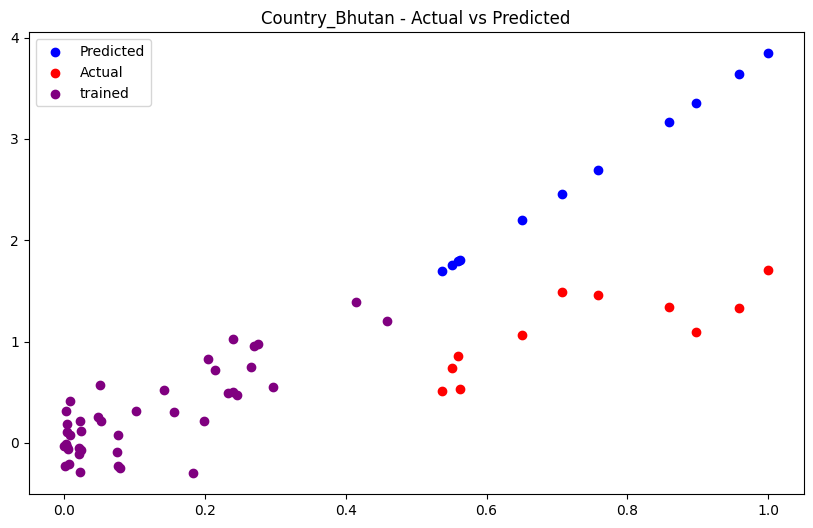

Epoch 1/50
9/9 [==============================] - 5s 137ms/step - loss: 0.2617 - val_loss: 0.8455
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2299 - val_loss: 0.7283
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1950 - val_loss: 0.5940
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1599 - val_loss: 0.4405
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1274 - val_loss: 0.2931
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1043 - val_loss: 0.1844
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0968 - val_loss: 0.1400
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0973 - val_loss: 0.1170
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0989 - val_loss: 0.1052
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0985 - val_loss: 0.1048
Epoch 11/50
9/9 [===========

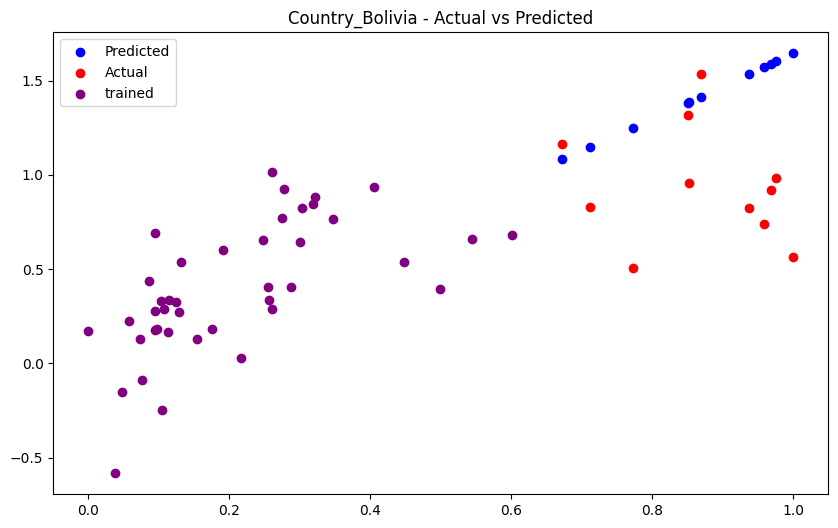

Epoch 1/50
9/9 [==============================] - 5s 144ms/step - loss: 0.3271 - val_loss: 0.7557
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3185 - val_loss: 0.7315
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3107 - val_loss: 0.6997
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3030 - val_loss: 0.6573
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2957 - val_loss: 0.6129
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2888 - val_loss: 0.5907
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2868 - val_loss: 0.5713
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2855 - val_loss: 0.5481
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2839 - val_loss: 0.5413
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2879 - val_loss: 0.5083
Epoch 11/50
9/9 [===========

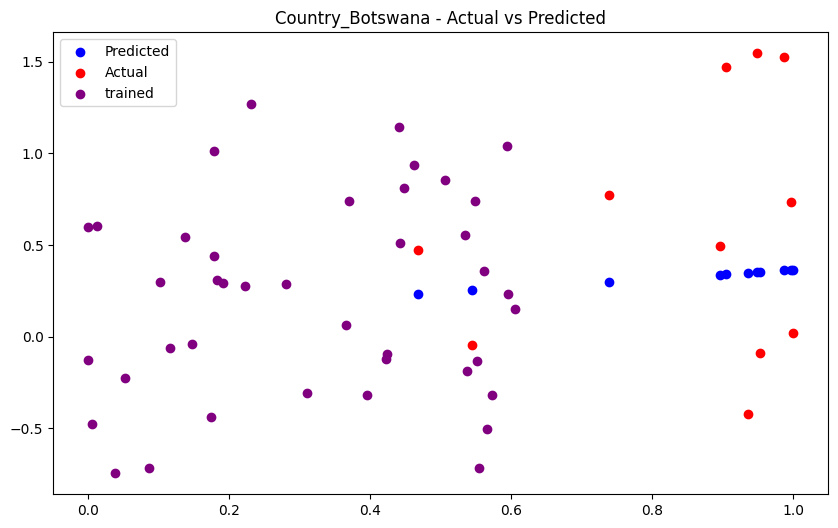

Epoch 1/50
9/9 [==============================] - 6s 200ms/step - loss: 0.3462 - val_loss: 1.4482
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3077 - val_loss: 1.3217
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2717 - val_loss: 1.1655
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2262 - val_loss: 0.9857
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.1818 - val_loss: 0.7710
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1390 - val_loss: 0.5799
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.1107 - val_loss: 0.4270
Epoch 8/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0961 - val_loss: 0.2933
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0886 - val_loss: 0.2401
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0857 - val_loss: 0.2447
Epoch 11/50
9/9 [===========

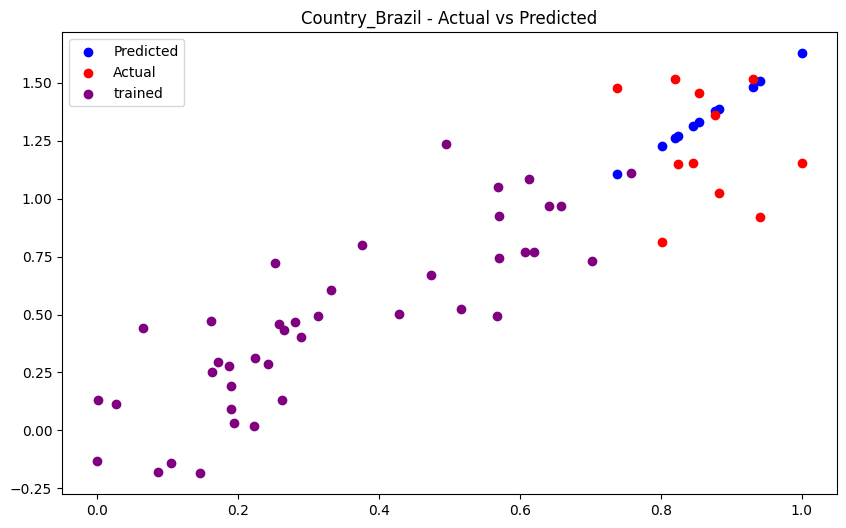

Epoch 1/50
9/9 [==============================] - 6s 163ms/step - loss: 0.2698 - val_loss: 0.7913
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2457 - val_loss: 0.7269
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.2229 - val_loss: 0.6538
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1995 - val_loss: 0.5692
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1756 - val_loss: 0.4766
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1484 - val_loss: 0.3773
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1262 - val_loss: 0.2923
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1132 - val_loss: 0.2166
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1078 - val_loss: 0.1687
Epoch 10/50
9/9 [==============================] - 0s 9ms/step - loss: 0.1056 - val_loss: 0.1616
Epoch 11/50
9/9 [============

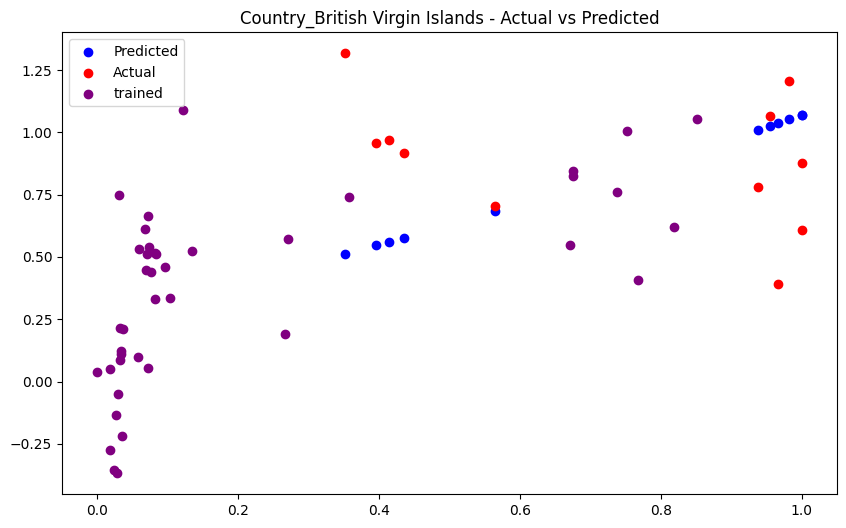

Epoch 1/50
9/9 [==============================] - 6s 123ms/step - loss: 0.5291 - val_loss: 2.5863
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5153 - val_loss: 2.5240
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5078 - val_loss: 2.4451
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4913 - val_loss: 2.3755
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4840 - val_loss: 2.2798
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.4745 - val_loss: 2.2406
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4717 - val_loss: 2.1568
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.4633 - val_loss: 2.1126
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 0.4580 - val_loss: 2.1027
Epoch 10/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4540 - val_loss: 2.0623
Epoch 11/50
9/9 [============

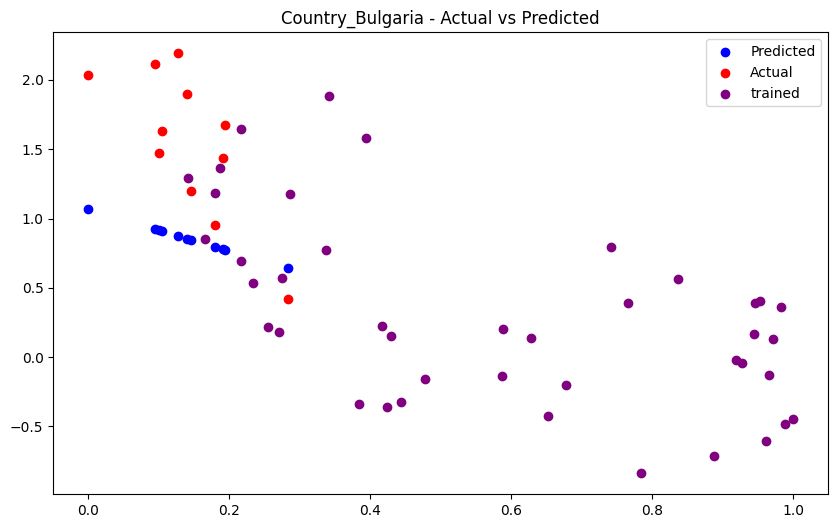

Epoch 1/50
9/9 [==============================] - 5s 129ms/step - loss: 0.4419 - val_loss: 1.0631
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4047 - val_loss: 0.9533
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3663 - val_loss: 0.8197
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3180 - val_loss: 0.6633
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2681 - val_loss: 0.4798
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2168 - val_loss: 0.2888
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1754 - val_loss: 0.1365
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1482 - val_loss: 0.0625
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1408 - val_loss: 0.0369
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1404 - val_loss: 0.0333
Epoch 11/50
9/9 [===========

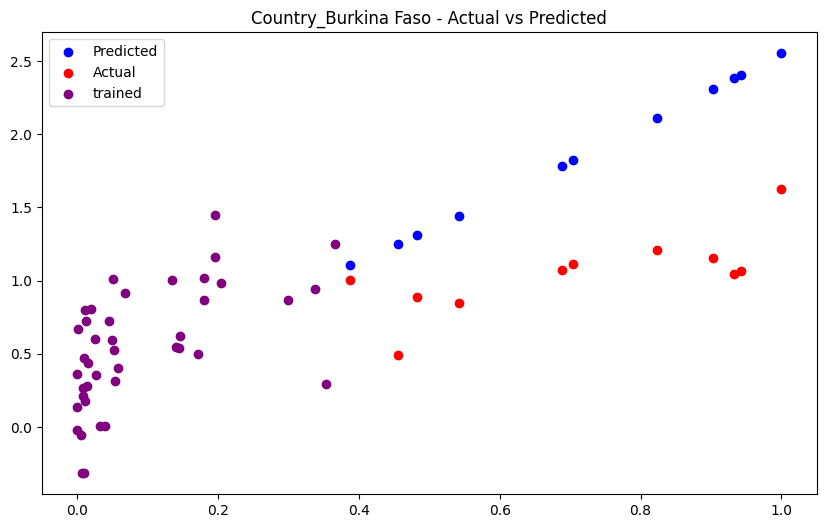

Epoch 1/50
9/9 [==============================] - 5s 126ms/step - loss: 0.8990 - val_loss: 1.9688
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.8422 - val_loss: 1.8059
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.7763 - val_loss: 1.6053
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7017 - val_loss: 1.3690
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6140 - val_loss: 1.1042
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5201 - val_loss: 0.7992
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4330 - val_loss: 0.5075
Epoch 8/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3601 - val_loss: 0.2723
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.3302 - val_loss: 0.1517
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.3188 - val_loss: 0.1114
Epoch 11/50
9/9 [===========

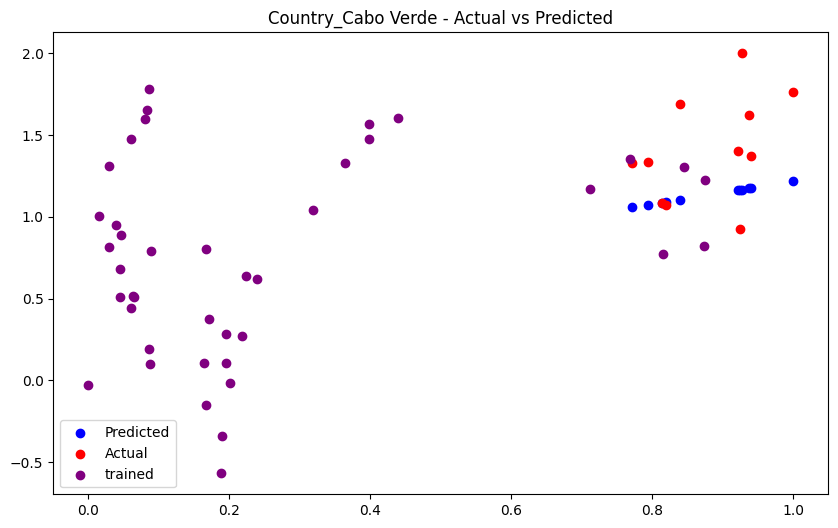

Epoch 1/50
9/9 [==============================] - 5s 135ms/step - loss: 0.2973 - val_loss: 1.0621
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2728 - val_loss: 0.9666
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2467 - val_loss: 0.8620
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2205 - val_loss: 0.7577
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.1941 - val_loss: 0.6258
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1645 - val_loss: 0.4814
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1414 - val_loss: 0.3394
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1295 - val_loss: 0.2280
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1238 - val_loss: 0.1897
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1241 - val_loss: 0.1798
Epoch 11/50
9/9 [===========

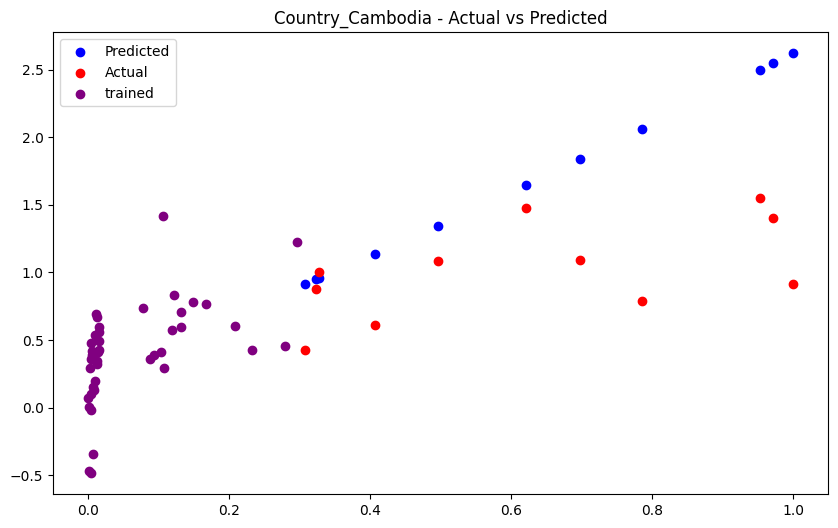

Epoch 1/50
9/9 [==============================] - 7s 398ms/step - loss: 0.2649 - val_loss: 1.0932
Epoch 2/50
9/9 [==============================] - 0s 20ms/step - loss: 0.2386 - val_loss: 0.9710
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 0.2076 - val_loss: 0.8508
Epoch 4/50
9/9 [==============================] - 0s 22ms/step - loss: 0.1804 - val_loss: 0.7028
Epoch 5/50
9/9 [==============================] - 0s 20ms/step - loss: 0.1513 - val_loss: 0.5544
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1318 - val_loss: 0.4000
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.1221 - val_loss: 0.2943
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1197 - val_loss: 0.2805
Epoch 9/50
9/9 [==============================] - 0s 25ms/step - loss: 0.1184 - val_loss: 0.2851
Epoch 10/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1174 - val_loss: 0.2868
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 140ms/step - loss: 1.1500 - val_loss: 2.3257
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 1.1023 - val_loss: 2.2164
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 1.0621 - val_loss: 2.0628
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.9973 - val_loss: 1.8730
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.9359 - val_loss: 1.6260
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.8603 - val_loss: 1.3864
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.7960 - val_loss: 1.1293
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.7277 - val_loss: 0.9437
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6903 - val_loss: 0.8177
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6858 - val_loss: 0.6881
Epoch 11/50
9/9 [===========

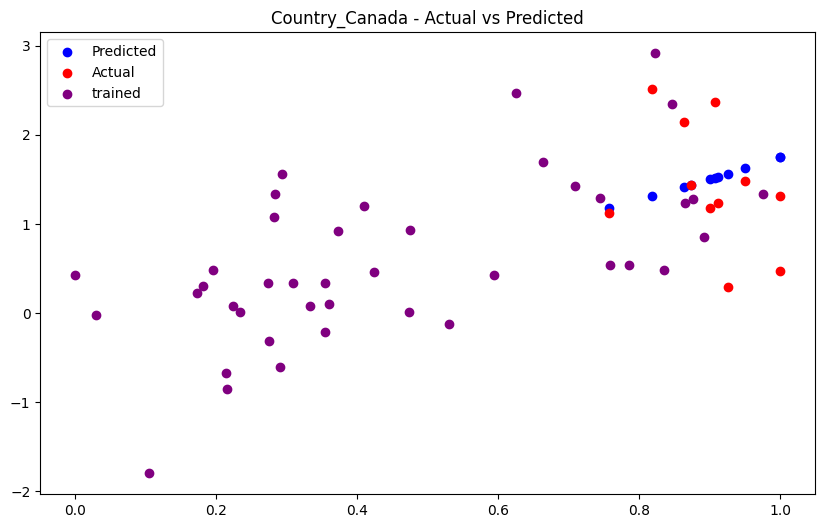

Epoch 1/50
9/9 [==============================] - 6s 130ms/step - loss: 0.5485 - val_loss: 1.0602
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4951 - val_loss: 0.9326
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4352 - val_loss: 0.7868
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3697 - val_loss: 0.6073
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2979 - val_loss: 0.4109
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2198 - val_loss: 0.2197
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1540 - val_loss: 0.0887
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1153 - val_loss: 0.0567
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1162 - val_loss: 0.0717
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1170 - val_loss: 0.0671
Epoch 11/50
9/9 [===========

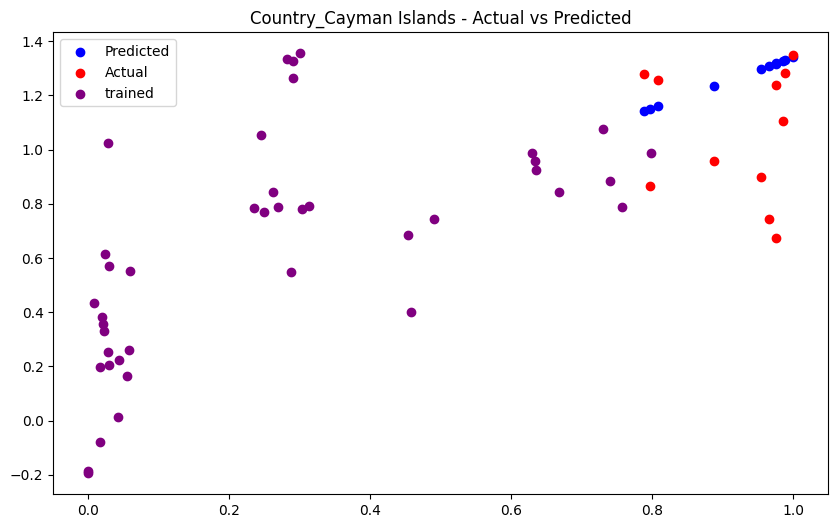

Epoch 1/50
9/9 [==============================] - 5s 130ms/step - loss: 0.2984 - val_loss: 0.9865
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2626 - val_loss: 0.8964
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2305 - val_loss: 0.7915
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1935 - val_loss: 0.6734
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1607 - val_loss: 0.5395
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1342 - val_loss: 0.4152
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1146 - val_loss: 0.3494
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1148 - val_loss: 0.2740
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1115 - val_loss: 0.2733
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1115 - val_loss: 0.2648
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 127ms/step - loss: 0.3181 - val_loss: 1.1087
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2900 - val_loss: 0.9977
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2632 - val_loss: 0.8709
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2364 - val_loss: 0.7244
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2063 - val_loss: 0.5600
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1779 - val_loss: 0.3997
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1621 - val_loss: 0.2657
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1573 - val_loss: 0.2017
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1558 - val_loss: 0.1635
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1589 - val_loss: 0.1098
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 196ms/step - loss: 0.1117 - val_loss: 0.4592
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0962 - val_loss: 0.3932
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0873 - val_loss: 0.3267
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0814 - val_loss: 0.2761
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0777 - val_loss: 0.2702
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0772 - val_loss: 0.2363
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0756 - val_loss: 0.2161
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0761 - val_loss: 0.1926
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0761 - val_loss: 0.1994
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0757 - val_loss: 0.1988
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 131ms/step - loss: 0.2010 - val_loss: 1.0408
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1791 - val_loss: 0.9418
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1580 - val_loss: 0.8406
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1405 - val_loss: 0.7113
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1220 - val_loss: 0.5785
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1070 - val_loss: 0.4652
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1025 - val_loss: 0.4232
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1013 - val_loss: 0.4019
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0998 - val_loss: 0.3780
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0977 - val_loss: 0.3731
Epoch 11/50
9/9 [===========

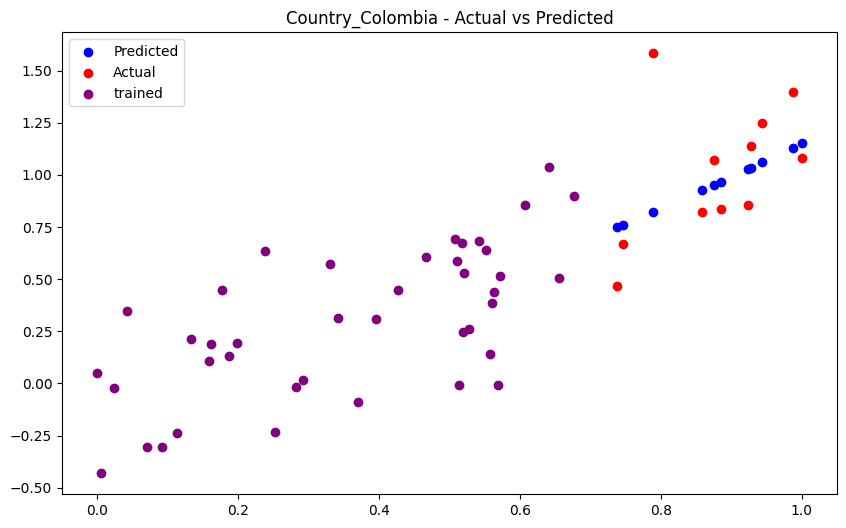

Epoch 1/50
9/9 [==============================] - 5s 128ms/step - loss: 0.0633 - val_loss: 0.1436
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0553 - val_loss: 0.1243
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0501 - val_loss: 0.1087
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0455 - val_loss: 0.0955
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0438 - val_loss: 0.0844
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0429 - val_loss: 0.0806
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0437 - val_loss: 0.0817
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0436 - val_loss: 0.0782
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0429 - val_loss: 0.0790
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0428 - val_loss: 0.0782
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 133ms/step - loss: 0.4502 - val_loss: 1.4565
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4063 - val_loss: 1.3588
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3575 - val_loss: 1.2452
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3034 - val_loss: 1.1081
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2432 - val_loss: 0.9568
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1975 - val_loss: 0.7959
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1733 - val_loss: 0.6954
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1659 - val_loss: 0.6605
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1642 - val_loss: 0.6608
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1611 - val_loss: 0.6210
Epoch 11/50
9/9 [===========

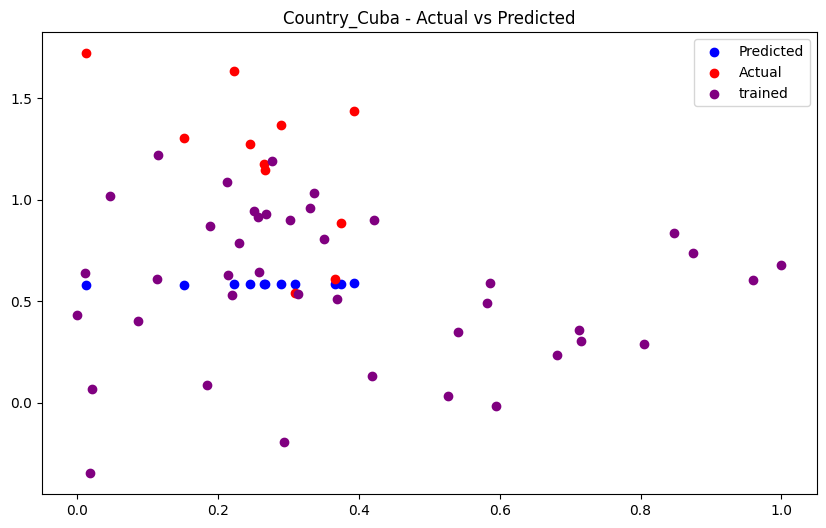

Epoch 1/50
9/9 [==============================] - 5s 141ms/step - loss: 0.4256 - val_loss: 1.8609
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4028 - val_loss: 1.7622
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3844 - val_loss: 1.6460
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3652 - val_loss: 1.5409
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3507 - val_loss: 1.3999
Epoch 6/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3309 - val_loss: 1.2915
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.3178 - val_loss: 1.1509
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3096 - val_loss: 1.0595
Epoch 9/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3002 - val_loss: 0.9958
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2909 - val_loss: 0.9905
Epoch 11/50
9/9 [===========

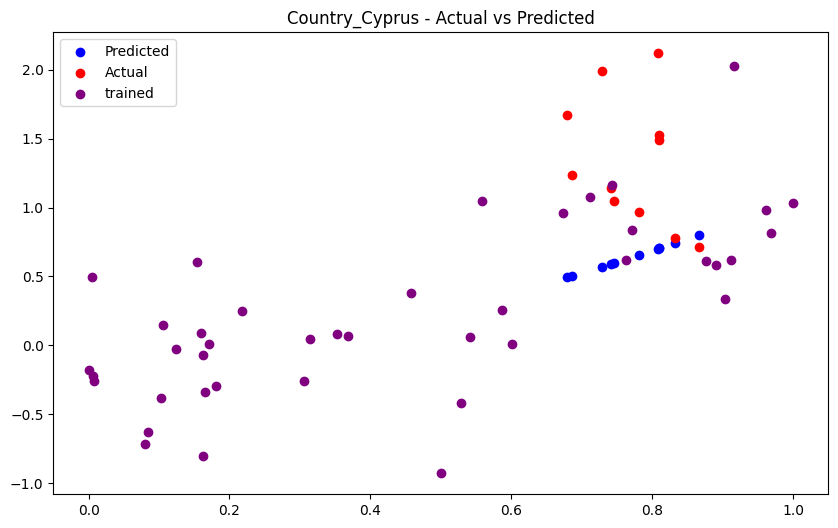

Epoch 1/50
9/9 [==============================] - 5s 165ms/step - loss: 1.1323 - val_loss: 3.2124
Epoch 2/50
9/9 [==============================] - 0s 20ms/step - loss: 1.0906 - val_loss: 3.1172
Epoch 3/50
9/9 [==============================] - 0s 23ms/step - loss: 1.0531 - val_loss: 3.0069
Epoch 4/50
9/9 [==============================] - 0s 22ms/step - loss: 1.0047 - val_loss: 2.8781
Epoch 5/50
9/9 [==============================] - 0s 21ms/step - loss: 0.9584 - val_loss: 2.7124
Epoch 6/50
9/9 [==============================] - 0s 23ms/step - loss: 0.8973 - val_loss: 2.5446
Epoch 7/50
9/9 [==============================] - 0s 21ms/step - loss: 0.8556 - val_loss: 2.3767
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.8318 - val_loss: 2.2229
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 0.8151 - val_loss: 2.1108
Epoch 10/50
9/9 [==============================] - 0s 19ms/step - loss: 0.8158 - val_loss: 2.1217
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 128ms/step - loss: 0.4181 - val_loss: 1.6698
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3755 - val_loss: 1.5663
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3317 - val_loss: 1.4473
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2840 - val_loss: 1.3124
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2484 - val_loss: 1.1565
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2184 - val_loss: 1.0376
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2050 - val_loss: 1.0039
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1995 - val_loss: 0.9320
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2007 - val_loss: 0.8839
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2015 - val_loss: 0.8853
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 129ms/step - loss: 0.2528 - val_loss: 0.5907
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2313 - val_loss: 0.5280
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2085 - val_loss: 0.4581
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1831 - val_loss: 0.3812
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1570 - val_loss: 0.2944
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1337 - val_loss: 0.2139
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1170 - val_loss: 0.1489
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1053 - val_loss: 0.1051
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1012 - val_loss: 0.0798
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0993 - val_loss: 0.0814
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 132ms/step - loss: 0.4698 - val_loss: 1.0965
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4259 - val_loss: 0.9720
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3731 - val_loss: 0.8372
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3164 - val_loss: 0.6675
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2543 - val_loss: 0.4675
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1948 - val_loss: 0.2887
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1471 - val_loss: 0.1486
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1222 - val_loss: 0.0771
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1157 - val_loss: 0.0604
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1120 - val_loss: 0.0578
Epoch 11/50
9/9 [===========

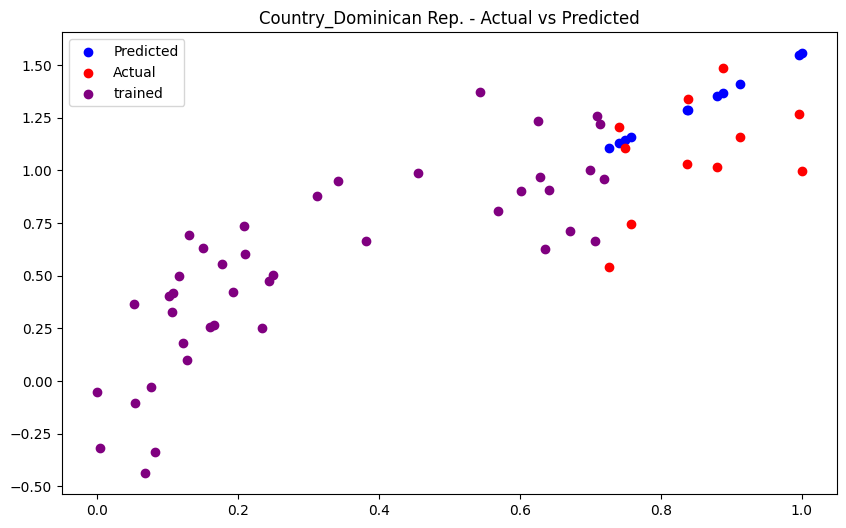

Epoch 1/50
9/9 [==============================] - 5s 123ms/step - loss: 0.4051 - val_loss: 1.1479
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3691 - val_loss: 1.0373
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3275 - val_loss: 0.9114
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2897 - val_loss: 0.7645
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2418 - val_loss: 0.6172
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2056 - val_loss: 0.4557
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1683 - val_loss: 0.3106
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1576 - val_loss: 0.2146
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1486 - val_loss: 0.1836
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1460 - val_loss: 0.1675
Epoch 11/50
9/9 [===========

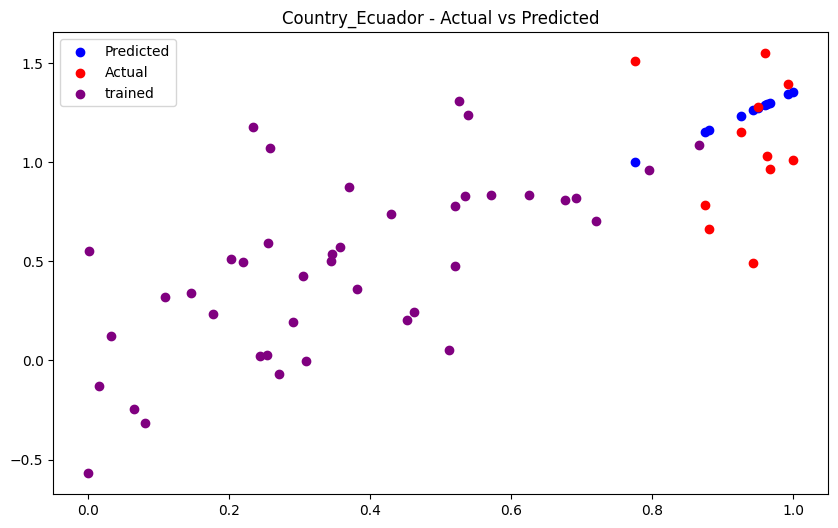

Epoch 1/50
9/9 [==============================] - 5s 126ms/step - loss: 0.2171 - val_loss: 0.8079
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1872 - val_loss: 0.7106
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1550 - val_loss: 0.5934
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1220 - val_loss: 0.4619
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0891 - val_loss: 0.3423
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0703 - val_loss: 0.2398
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0668 - val_loss: 0.1776
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0672 - val_loss: 0.1825
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0670 - val_loss: 0.1990
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0663 - val_loss: 0.2116
Epoch 11/50
9/9 [===========

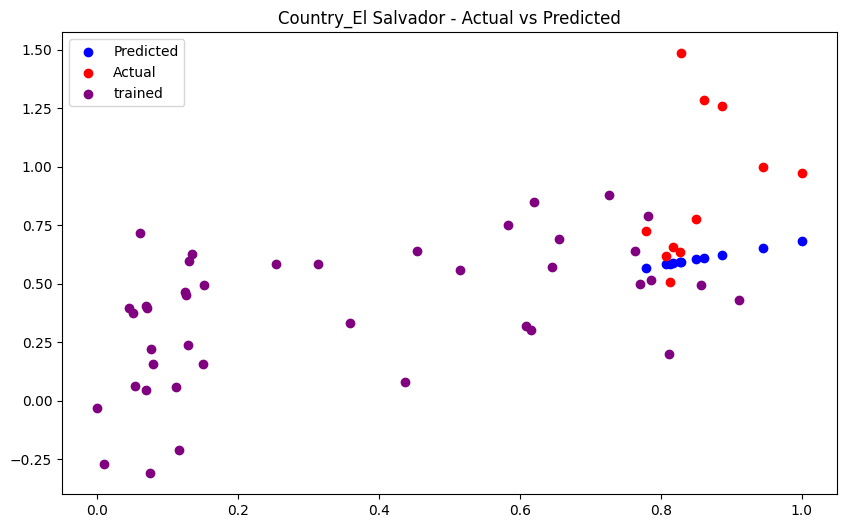

Epoch 1/50
9/9 [==============================] - 5s 130ms/step - loss: 0.2270 - val_loss: 1.1320
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2024 - val_loss: 1.0343
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1755 - val_loss: 0.9239
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1492 - val_loss: 0.8075
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1283 - val_loss: 0.6791
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1082 - val_loss: 0.5567
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0942 - val_loss: 0.4656
Epoch 8/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0855 - val_loss: 0.4137
Epoch 9/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0805 - val_loss: 0.3837
Epoch 10/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0778 - val_loss: 0.3317
Epoch 11/50
9/9 [===========

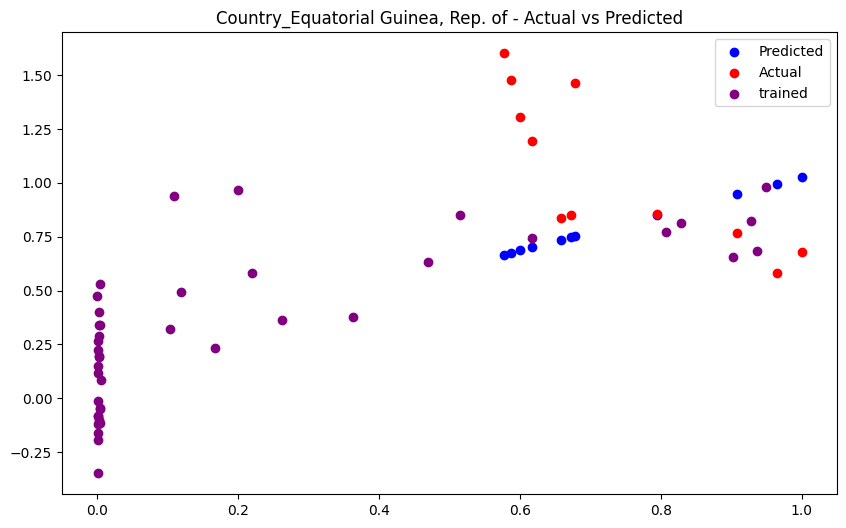

Epoch 1/50
9/9 [==============================] - 6s 198ms/step - loss: 1.3634 - val_loss: 4.2264
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 1.3089 - val_loss: 4.0687
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 1.2458 - val_loss: 3.8902
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 1.1737 - val_loss: 3.6821
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 1.1036 - val_loss: 3.4326
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 1.0299 - val_loss: 3.1773
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.9751 - val_loss: 2.9173
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.9512 - val_loss: 2.7313
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.9340 - val_loss: 2.6720
Epoch 10/50
9/9 [==============================] - 0s 18ms/step - loss: 0.9289 - val_loss: 2.7623
Epoch 11/50
9/9 [===========

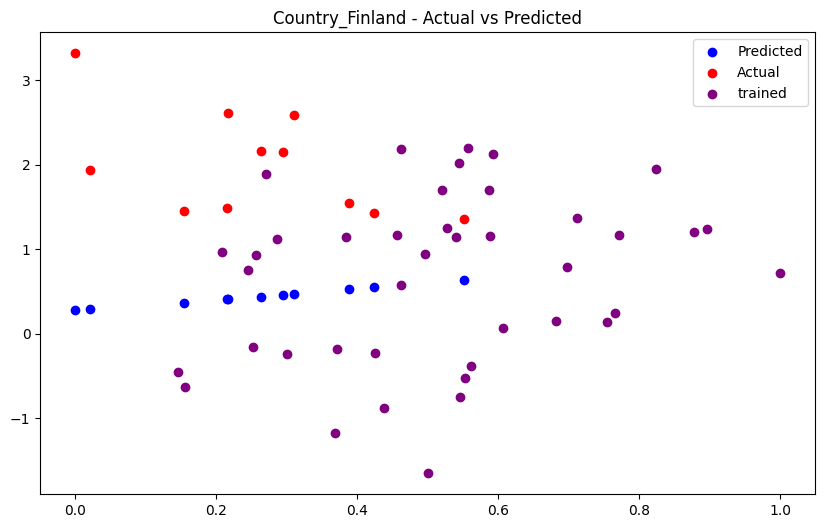

Epoch 1/50
9/9 [==============================] - 6s 131ms/step - loss: 0.1887 - val_loss: 0.4923
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1590 - val_loss: 0.4201
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1281 - val_loss: 0.3384
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0985 - val_loss: 0.2476
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0759 - val_loss: 0.1603
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0596 - val_loss: 0.1111
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0594 - val_loss: 0.0974
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0586 - val_loss: 0.1010
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0572 - val_loss: 0.1006
Epoch 10/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0557 - val_loss: 0.1055
Epoch 11/50
9/9 [===========

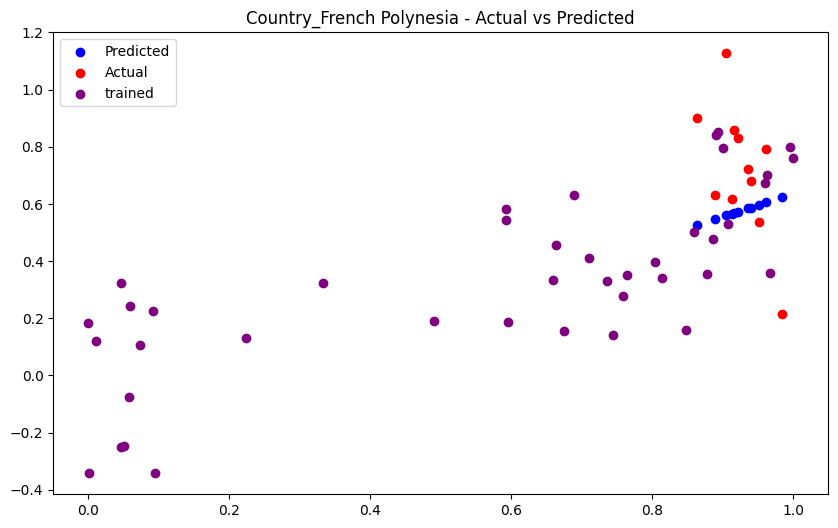

Epoch 1/50
9/9 [==============================] - 5s 141ms/step - loss: 0.2318 - val_loss: 1.1499
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2091 - val_loss: 1.0573
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1856 - val_loss: 0.9564
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1701 - val_loss: 0.8500
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1547 - val_loss: 0.7504
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1509 - val_loss: 0.6610
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1492 - val_loss: 0.6680
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1497 - val_loss: 0.6460
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1486 - val_loss: 0.6663
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1480 - val_loss: 0.6838
Epoch 11/50
9/9 [===========

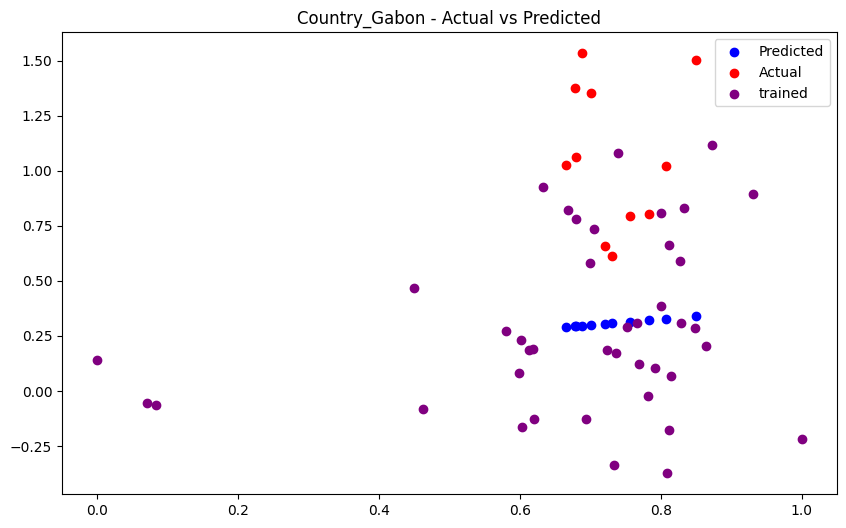

Epoch 1/50
9/9 [==============================] - 5s 141ms/step - loss: 0.9924 - val_loss: 3.3802
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.9429 - val_loss: 3.2469
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.8920 - val_loss: 3.0935
Epoch 4/50
9/9 [==============================] - 0s 21ms/step - loss: 0.8351 - val_loss: 2.9367
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.7848 - val_loss: 2.7714
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.7513 - val_loss: 2.5864
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.7113 - val_loss: 2.4544
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.6907 - val_loss: 2.3462
Epoch 9/50
9/9 [==============================] - 0s 20ms/step - loss: 0.6780 - val_loss: 2.2022
Epoch 10/50
9/9 [==============================] - 0s 19ms/step - loss: 0.6716 - val_loss: 2.0822
Epoch 11/50
9/9 [===========

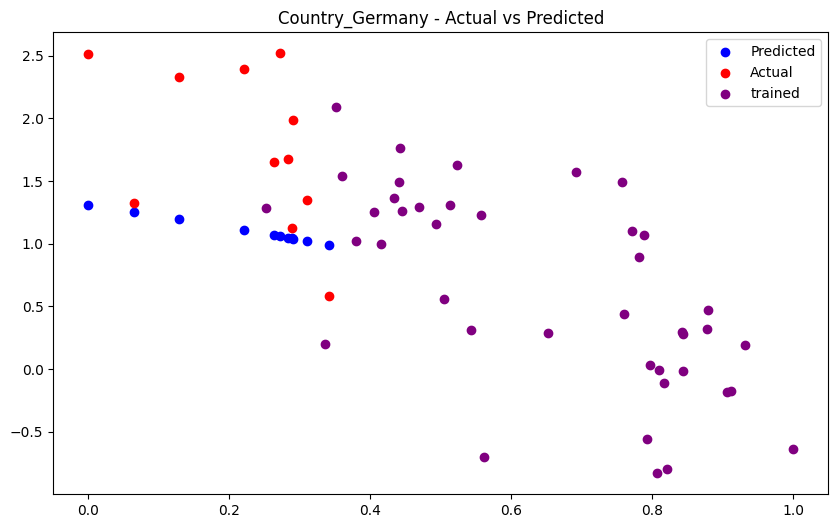

Epoch 1/50
9/9 [==============================] - 6s 189ms/step - loss: 0.3757 - val_loss: 1.1563
Epoch 2/50
9/9 [==============================] - 0s 25ms/step - loss: 0.3410 - val_loss: 1.0398
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3014 - val_loss: 0.8997
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2565 - val_loss: 0.7377
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2089 - val_loss: 0.5584
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1708 - val_loss: 0.3510
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.1321 - val_loss: 0.1976
Epoch 8/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1153 - val_loss: 0.1148
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1111 - val_loss: 0.0738
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1096 - val_loss: 0.0746
Epoch 11/50
9/9 [===========

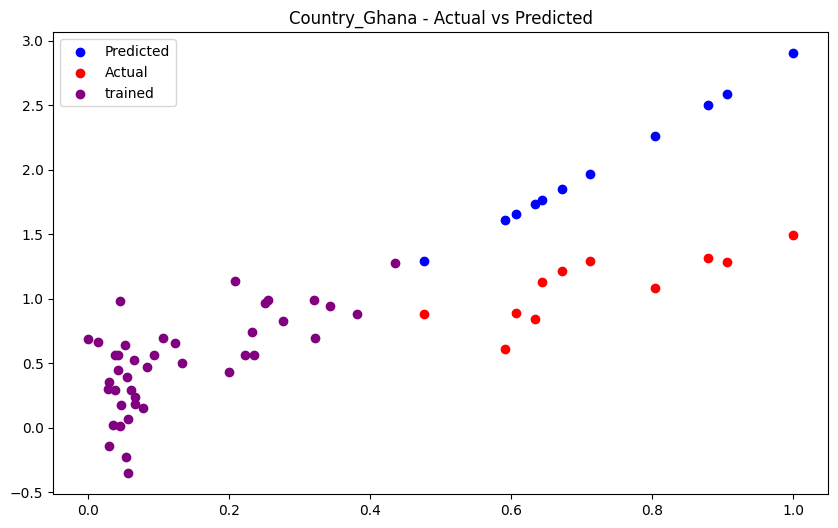

Epoch 1/50
9/9 [==============================] - 6s 149ms/step - loss: 0.6438 - val_loss: 2.0108
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.6062 - val_loss: 1.8912
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.5703 - val_loss: 1.7487
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.5275 - val_loss: 1.5707
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4807 - val_loss: 1.3613
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4231 - val_loss: 1.1112
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3741 - val_loss: 0.8364
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3284 - val_loss: 0.6602
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3060 - val_loss: 0.5228
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2873 - val_loss: 0.3850
Epoch 11/50
9/9 [===========

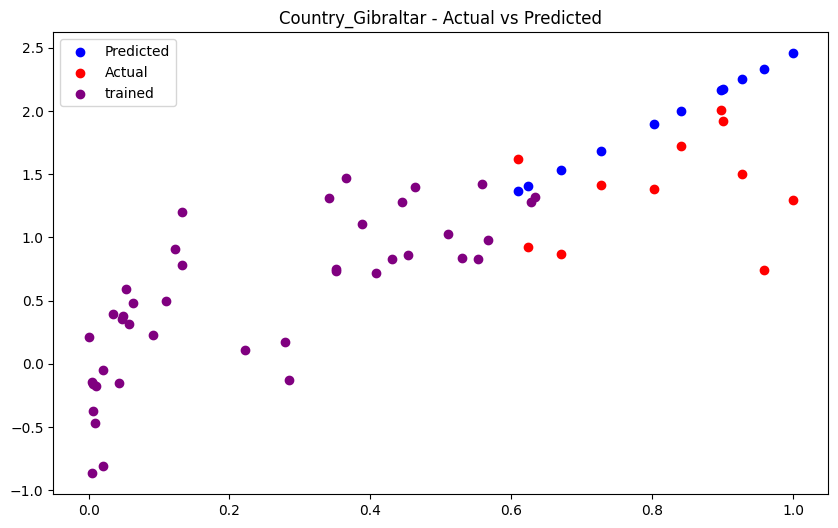

Epoch 1/50
9/9 [==============================] - 5s 137ms/step - loss: 0.3184 - val_loss: 1.6078
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3074 - val_loss: 1.5549
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2983 - val_loss: 1.4931
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2896 - val_loss: 1.4325
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2828 - val_loss: 1.3945
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2782 - val_loss: 1.3570
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2734 - val_loss: 1.3414
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2706 - val_loss: 1.3381
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2674 - val_loss: 1.3191
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2619 - val_loss: 1.3123
Epoch 11/50
9/9 [===========

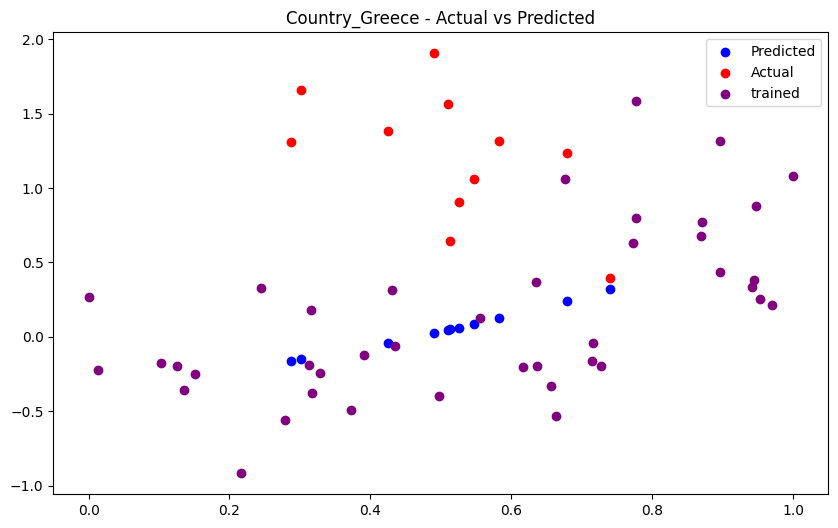

Epoch 1/50
9/9 [==============================] - 5s 137ms/step - loss: 1.2758 - val_loss: 2.6657
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 1.2621 - val_loss: 2.6107
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 1.2487 - val_loss: 2.5583
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 1.2381 - val_loss: 2.4443
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 1.2196 - val_loss: 2.3178
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 1.1970 - val_loss: 2.1715
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 1.1715 - val_loss: 2.0310
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 1.1414 - val_loss: 1.8544
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 1.1119 - val_loss: 1.6511
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 1.0710 - val_loss: 1.4616
Epoch 11/50
9/9 [===========

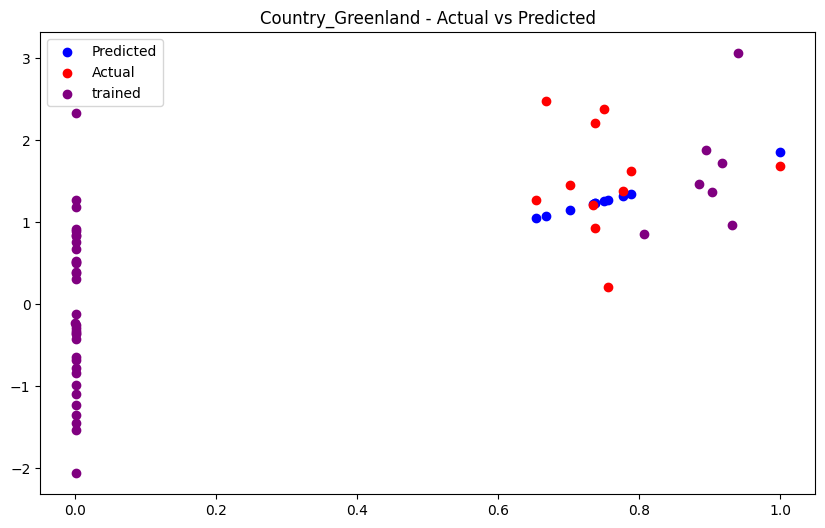

Epoch 1/50
9/9 [==============================] - 5s 125ms/step - loss: 0.2658 - val_loss: 0.6528
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2426 - val_loss: 0.5911
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2227 - val_loss: 0.5151
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1991 - val_loss: 0.4312
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1766 - val_loss: 0.3310
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1500 - val_loss: 0.2400
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1348 - val_loss: 0.1673
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1264 - val_loss: 0.1272
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1241 - val_loss: 0.1079
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1197 - val_loss: 0.1099
Epoch 11/50
9/9 [===========

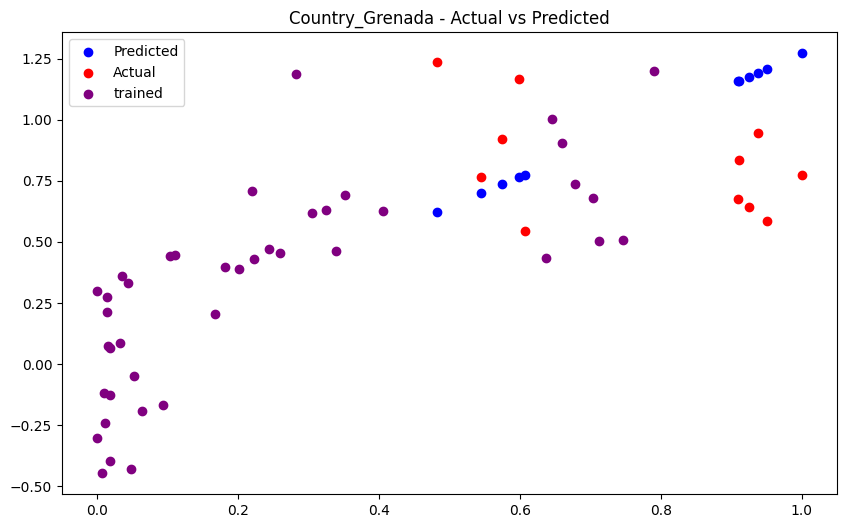

Epoch 1/50
9/9 [==============================] - 5s 130ms/step - loss: 0.2508 - val_loss: 0.6355
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2153 - val_loss: 0.5502
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1833 - val_loss: 0.4569
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1514 - val_loss: 0.3660
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1249 - val_loss: 0.2762
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1046 - val_loss: 0.1978
Epoch 7/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0973 - val_loss: 0.1400
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0932 - val_loss: 0.1233
Epoch 9/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0910 - val_loss: 0.1389
Epoch 10/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0867 - val_loss: 0.1377
Epoch 11/50
9/9 [===========

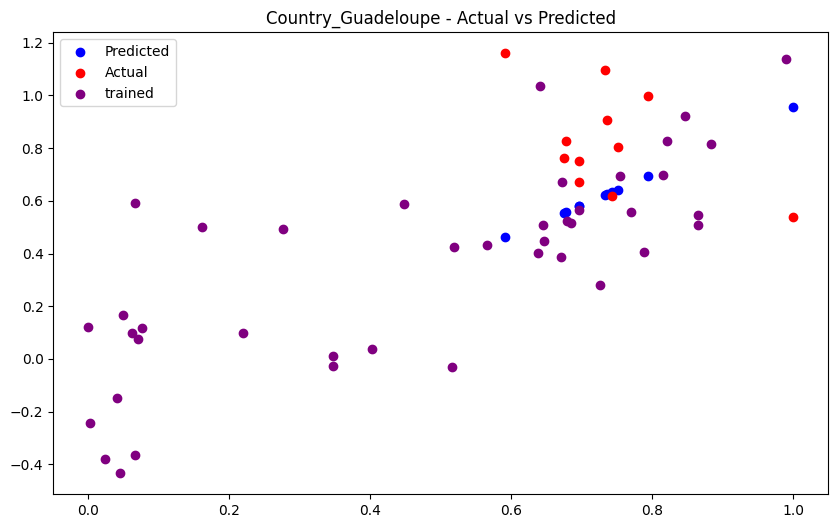

Epoch 1/50
9/9 [==============================] - 6s 139ms/step - loss: 0.2179 - val_loss: 1.1277
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1924 - val_loss: 1.0193
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1657 - val_loss: 0.8959
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1380 - val_loss: 0.7715
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1145 - val_loss: 0.6187
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0916 - val_loss: 0.4748
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0767 - val_loss: 0.3595
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0744 - val_loss: 0.2874
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0733 - val_loss: 0.2647
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0719 - val_loss: 0.2865
Epoch 11/50
9/9 [===========

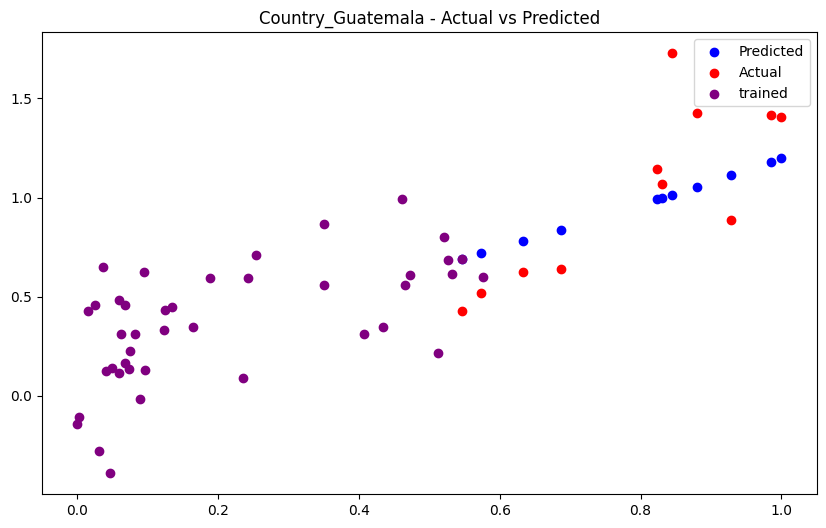

Epoch 1/50
9/9 [==============================] - 5s 133ms/step - loss: 0.4669 - val_loss: 1.3108
Epoch 2/50
9/9 [==============================] - 0s 19ms/step - loss: 0.4210 - val_loss: 1.1799
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3744 - val_loss: 1.0264
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3204 - val_loss: 0.8436
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2590 - val_loss: 0.6306
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1908 - val_loss: 0.4095
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1398 - val_loss: 0.2078
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1139 - val_loss: 0.0841
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1058 - val_loss: 0.0507
Epoch 10/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1003 - val_loss: 0.0507
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 127ms/step - loss: 0.6868 - val_loss: 1.6710
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6244 - val_loss: 1.5316
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5576 - val_loss: 1.3602
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4777 - val_loss: 1.1618
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3844 - val_loss: 0.9296
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2848 - val_loss: 0.6629
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1844 - val_loss: 0.4060
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1163 - val_loss: 0.2066
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0808 - val_loss: 0.1259
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0850 - val_loss: 0.1076
Epoch 11/50
9/9 [===========

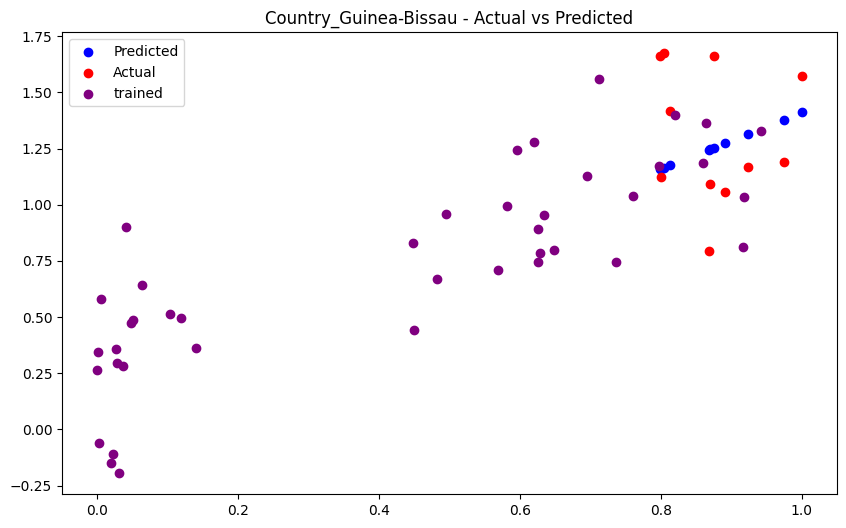

Epoch 1/50
9/9 [==============================] - 5s 168ms/step - loss: 0.4196 - val_loss: 1.2279
Epoch 2/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3954 - val_loss: 1.1443
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3695 - val_loss: 1.0453
Epoch 4/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3463 - val_loss: 0.9416
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3228 - val_loss: 0.8294
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3004 - val_loss: 0.6831
Epoch 7/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2736 - val_loss: 0.5812
Epoch 8/50
9/9 [==============================] - 0s 20ms/step - loss: 0.2600 - val_loss: 0.4782
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2514 - val_loss: 0.4238
Epoch 10/50
9/9 [==============================] - 0s 20ms/step - loss: 0.2473 - val_loss: 0.3415
Epoch 11/50
9/9 [===========

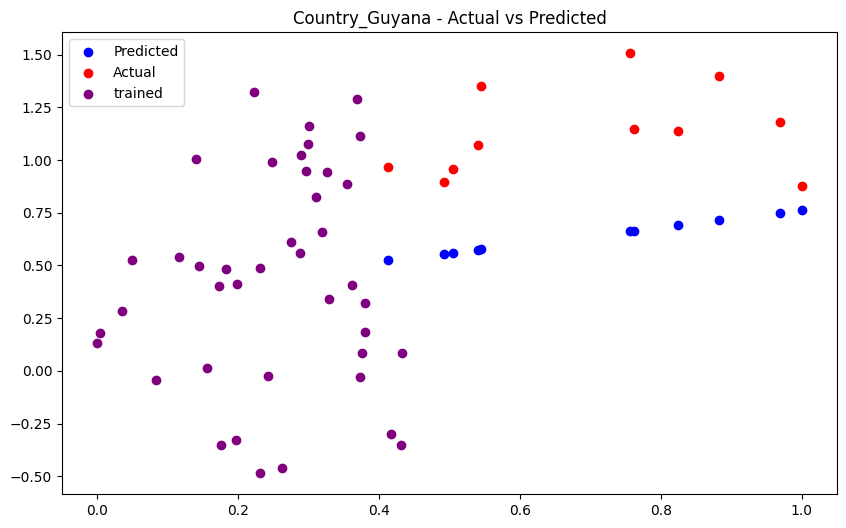

Epoch 1/50
9/9 [==============================] - 6s 147ms/step - loss: 0.5439 - val_loss: 1.2698
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4982 - val_loss: 1.1492
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4464 - val_loss: 1.0023
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3947 - val_loss: 0.8208
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3248 - val_loss: 0.6276
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2564 - val_loss: 0.4132
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2060 - val_loss: 0.2285
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1566 - val_loss: 0.1212
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1455 - val_loss: 0.0834
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1489 - val_loss: 0.0797
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 139ms/step - loss: 0.2573 - val_loss: 1.0965
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2278 - val_loss: 0.9922
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1992 - val_loss: 0.8768
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1706 - val_loss: 0.7317
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1337 - val_loss: 0.5829
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1031 - val_loss: 0.4307
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0839 - val_loss: 0.2910
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0773 - val_loss: 0.2096
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0792 - val_loss: 0.1942
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0760 - val_loss: 0.2172
Epoch 11/50
9/9 [===========

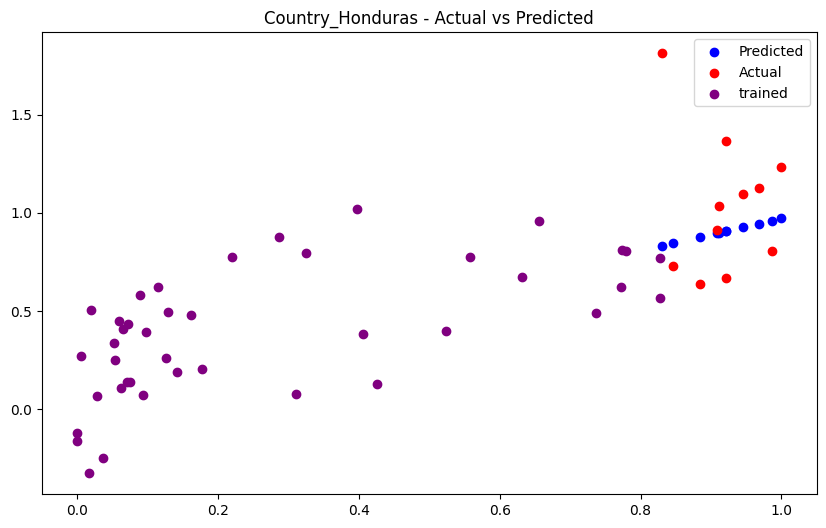

Epoch 1/50
9/9 [==============================] - 5s 139ms/step - loss: 0.7635 - val_loss: 3.3284
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.7369 - val_loss: 3.2423
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.7204 - val_loss: 3.1640
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6993 - val_loss: 3.0789
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.6781 - val_loss: 2.9810
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.6593 - val_loss: 2.8435
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6363 - val_loss: 2.7201
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6179 - val_loss: 2.6225
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6150 - val_loss: 2.4979
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.5980 - val_loss: 2.4509
Epoch 11/50
9/9 [===========

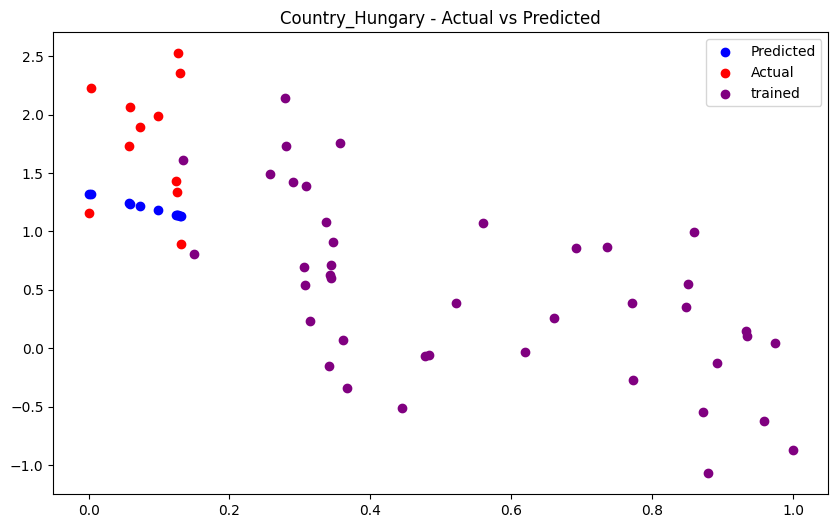

Epoch 1/50
9/9 [==============================] - 5s 138ms/step - loss: 0.4351 - val_loss: 1.1452
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4121 - val_loss: 1.0748
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3963 - val_loss: 0.9835
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3798 - val_loss: 0.8923
Epoch 5/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3600 - val_loss: 0.8035
Epoch 6/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3448 - val_loss: 0.7038
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3311 - val_loss: 0.6511
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3236 - val_loss: 0.5497
Epoch 9/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3150 - val_loss: 0.4743
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3071 - val_loss: 0.4464
Epoch 11/50
9/9 [===========

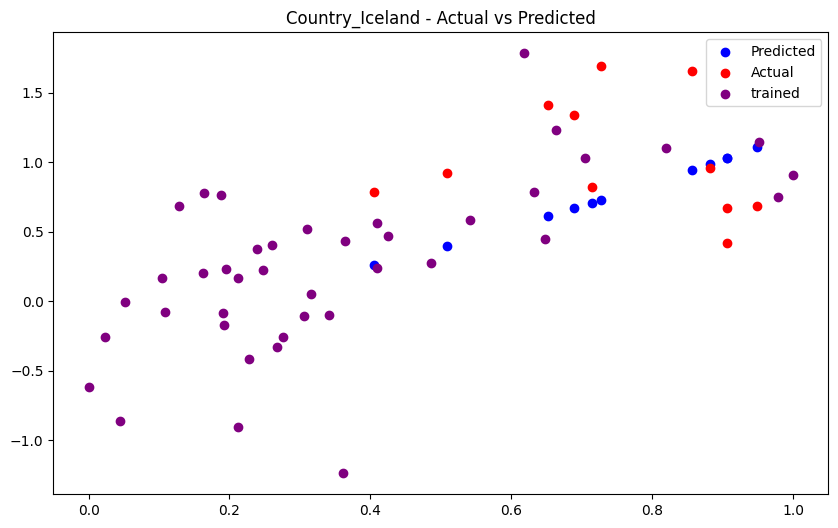

Epoch 1/50
9/9 [==============================] - 10s 639ms/step - loss: 0.1859 - val_loss: 0.4595
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1703 - val_loss: 0.3946
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1513 - val_loss: 0.3260
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1338 - val_loss: 0.2467
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1175 - val_loss: 0.1755
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1036 - val_loss: 0.1099
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1009 - val_loss: 0.0600
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0965 - val_loss: 0.0426
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0941 - val_loss: 0.0391
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0906 - val_loss: 0.0365
Epoch 11/50
9/9 [==========

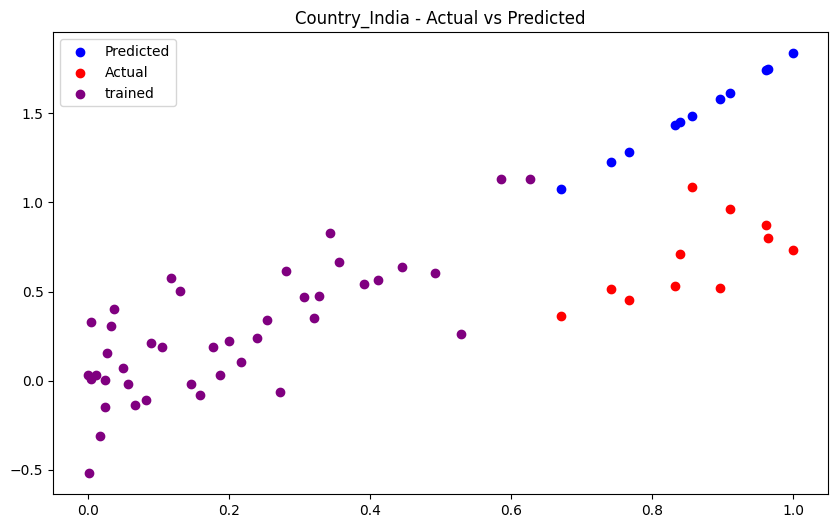

Epoch 1/50
9/9 [==============================] - 5s 144ms/step - loss: 0.1466 - val_loss: 0.8885
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1269 - val_loss: 0.8023
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1052 - val_loss: 0.7006
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0831 - val_loss: 0.5870
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0695 - val_loss: 0.4617
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.3738
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0502 - val_loss: 0.2960
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0499 - val_loss: 0.2567
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0480 - val_loss: 0.2703
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0465 - val_loss: 0.2743
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 135ms/step - loss: 0.8115 - val_loss: 2.9408
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.7886 - val_loss: 2.8369
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.7643 - val_loss: 2.7161
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.7418 - val_loss: 2.5500
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.7101 - val_loss: 2.3525
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6785 - val_loss: 2.2034
Epoch 7/50
9/9 [==============================] - 0s 25ms/step - loss: 0.6508 - val_loss: 1.9990
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6212 - val_loss: 1.7035
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.5871 - val_loss: 1.4245
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5614 - val_loss: 1.1501
Epoch 11/50
9/9 [===========

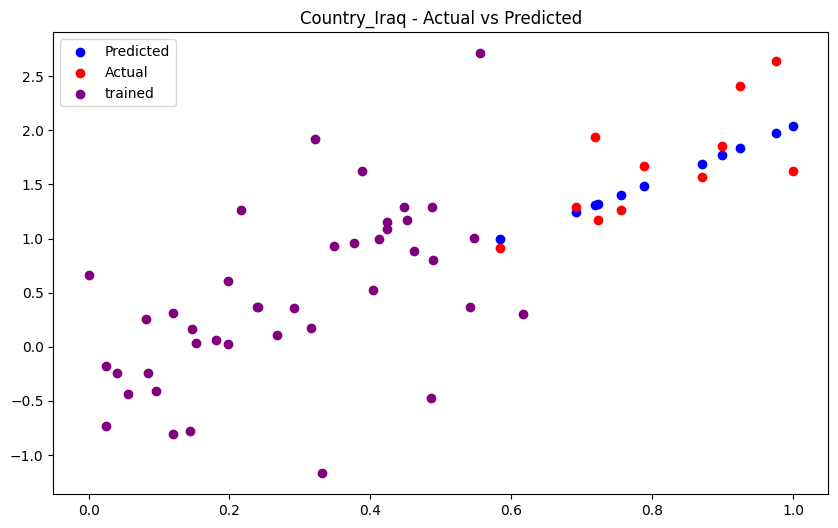

Epoch 1/50
9/9 [==============================] - 5s 131ms/step - loss: 0.4450 - val_loss: 0.8475
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4052 - val_loss: 0.7717
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3747 - val_loss: 0.6885
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3366 - val_loss: 0.6183
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3061 - val_loss: 0.5232
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2747 - val_loss: 0.4311
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2434 - val_loss: 0.3516
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2297 - val_loss: 0.2710
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2163 - val_loss: 0.2269
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2170 - val_loss: 0.1947
Epoch 11/50
9/9 [===========

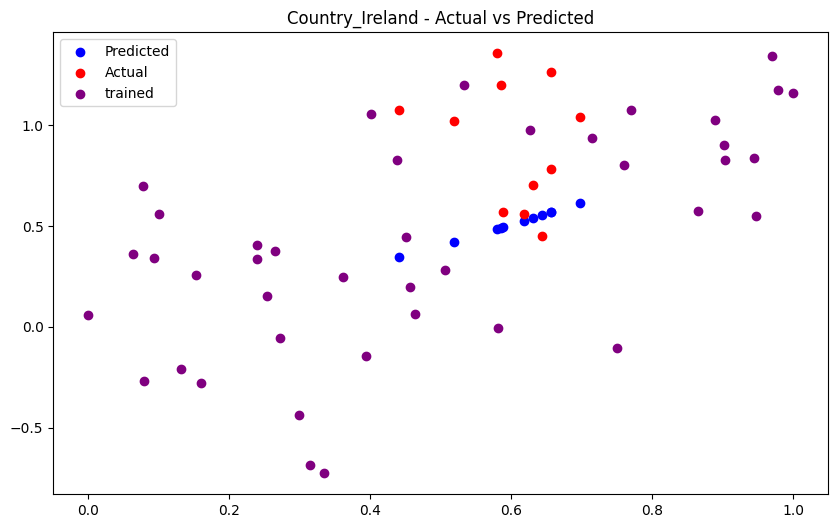

Epoch 1/50
9/9 [==============================] - 6s 181ms/step - loss: 0.5164 - val_loss: 1.4094
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4657 - val_loss: 1.3126
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4145 - val_loss: 1.1988
Epoch 4/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3558 - val_loss: 1.0604
Epoch 5/50
9/9 [==============================] - 0s 21ms/step - loss: 0.2927 - val_loss: 0.8990
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2358 - val_loss: 0.7174
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1868 - val_loss: 0.5800
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1712 - val_loss: 0.4978
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1644 - val_loss: 0.4960
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1651 - val_loss: 0.4711
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 144ms/step - loss: 0.3437 - val_loss: 0.8854
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3230 - val_loss: 0.8235
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3033 - val_loss: 0.7582
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2837 - val_loss: 0.6804
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2663 - val_loss: 0.6176
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2486 - val_loss: 0.5459
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2322 - val_loss: 0.4730
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2259 - val_loss: 0.4094
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2180 - val_loss: 0.4025
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2140 - val_loss: 0.4145
Epoch 11/50
9/9 [===========

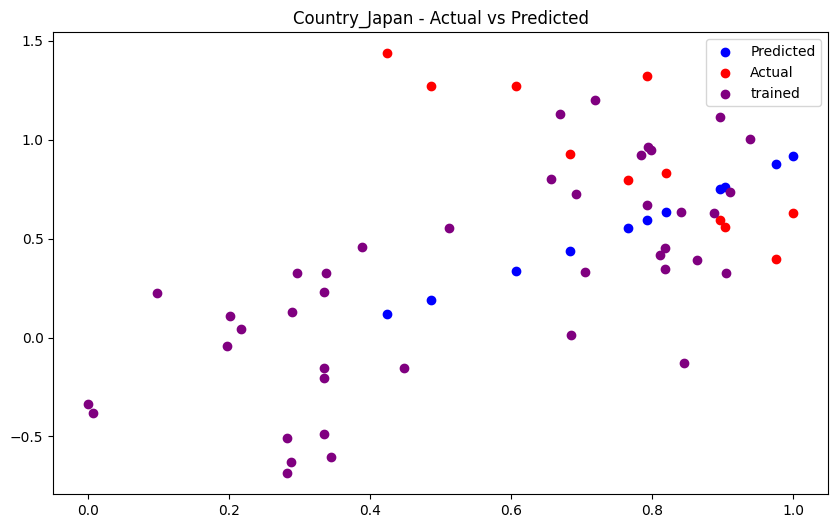

Epoch 1/50
9/9 [==============================] - 5s 136ms/step - loss: 0.4816 - val_loss: 1.7880
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4724 - val_loss: 1.6890
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4627 - val_loss: 1.5808
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4513 - val_loss: 1.4704
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4435 - val_loss: 1.3662
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4335 - val_loss: 1.2793
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4262 - val_loss: 1.1556
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4203 - val_loss: 1.1060
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4212 - val_loss: 0.9613
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4113 - val_loss: 0.9380
Epoch 11/50
9/9 [===========

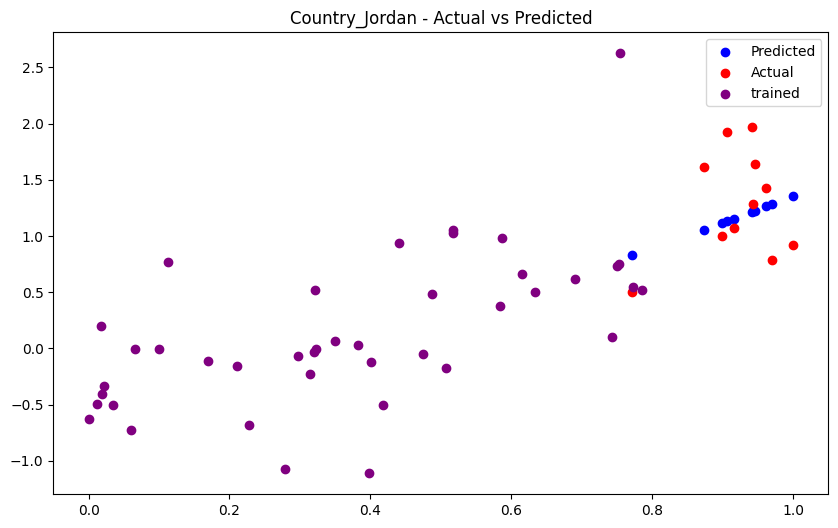

Epoch 1/50
9/9 [==============================] - 5s 141ms/step - loss: 0.2610 - val_loss: 1.3779
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2352 - val_loss: 1.2592
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2080 - val_loss: 1.1231
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1795 - val_loss: 0.9695
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1558 - val_loss: 0.8149
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1320 - val_loss: 0.6565
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1204 - val_loss: 0.4814
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1070 - val_loss: 0.4041
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1043 - val_loss: 0.3589
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1017 - val_loss: 0.3040
Epoch 11/50
9/9 [===========

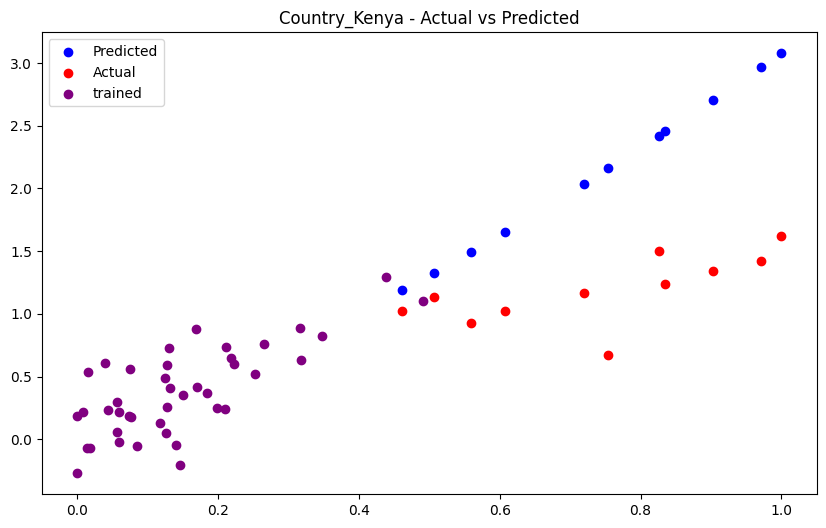

Epoch 1/50
9/9 [==============================] - 5s 137ms/step - loss: 0.1555 - val_loss: 0.9917
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1416 - val_loss: 0.9091
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1325 - val_loss: 0.8143
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1211 - val_loss: 0.7364
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1130 - val_loss: 0.6906
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1088 - val_loss: 0.6268
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1051 - val_loss: 0.5519
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1027 - val_loss: 0.5116
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1002 - val_loss: 0.4858
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0993 - val_loss: 0.4518
Epoch 11/50
9/9 [===========

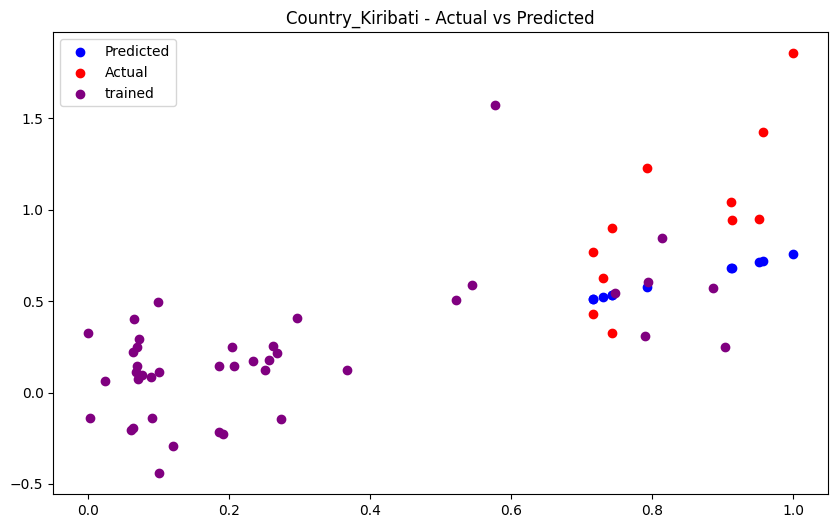

Epoch 1/50
9/9 [==============================] - 6s 144ms/step - loss: 0.9658 - val_loss: 3.3774
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.9221 - val_loss: 3.1763
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.8712 - val_loss: 2.9588
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.8188 - val_loss: 2.7048
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.7565 - val_loss: 2.4129
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6984 - val_loss: 2.0831
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6342 - val_loss: 1.7438
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.5810 - val_loss: 1.4206
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5393 - val_loss: 1.1048
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4981 - val_loss: 0.8211
Epoch 11/50
9/9 [===========

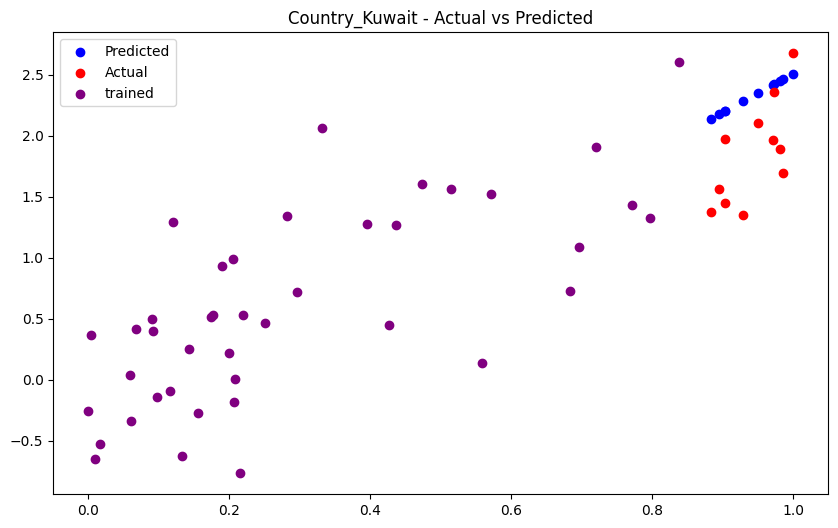

Epoch 1/50
9/9 [==============================] - 5s 121ms/step - loss: 0.4753 - val_loss: 2.0090
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.4613 - val_loss: 1.9171
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4507 - val_loss: 1.8272
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4393 - val_loss: 1.7455
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4315 - val_loss: 1.6288
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4188 - val_loss: 1.5231
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.4079 - val_loss: 1.4047
Epoch 8/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3981 - val_loss: 1.2627
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3851 - val_loss: 1.1421
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3748 - val_loss: 1.0490
Epoch 11/50
9/9 [===========

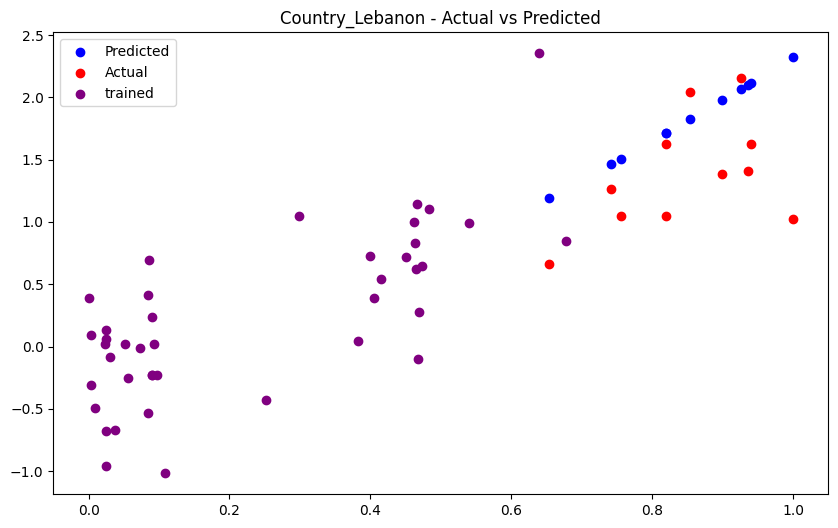

Epoch 1/50
9/9 [==============================] - 6s 205ms/step - loss: 0.4803 - val_loss: 1.5651
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4387 - val_loss: 1.4396
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3966 - val_loss: 1.2898
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3492 - val_loss: 1.1174
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3015 - val_loss: 0.9353
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2620 - val_loss: 0.7437
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2348 - val_loss: 0.6083
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2226 - val_loss: 0.5613
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2178 - val_loss: 0.5779
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2116 - val_loss: 0.5469
Epoch 11/50
9/9 [===========

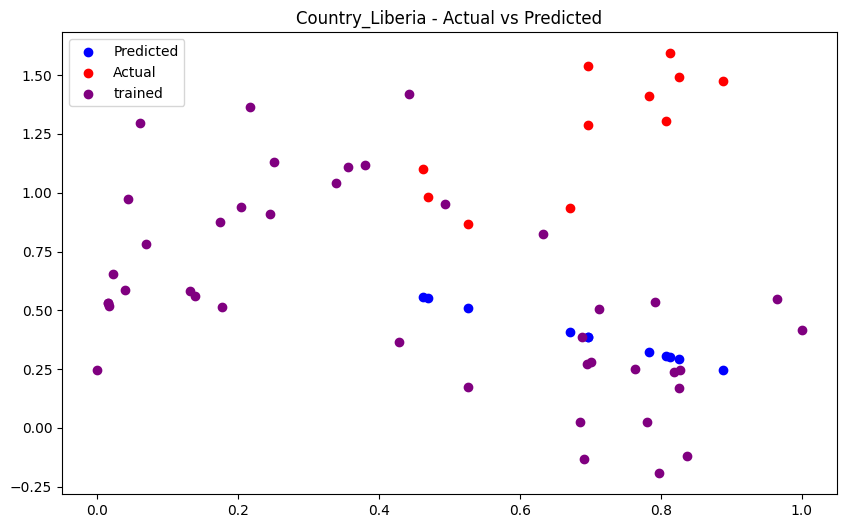

Epoch 1/50
9/9 [==============================] - 6s 135ms/step - loss: 0.4049 - val_loss: 1.3774
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3742 - val_loss: 1.2488
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3381 - val_loss: 1.1310
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3067 - val_loss: 0.9779
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2777 - val_loss: 0.8210
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2540 - val_loss: 0.6762
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2342 - val_loss: 0.5639
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2230 - val_loss: 0.4934
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2181 - val_loss: 0.4527
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2114 - val_loss: 0.4417
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 120ms/step - loss: 0.3581 - val_loss: 1.0145
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3235 - val_loss: 0.9136
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2827 - val_loss: 0.7942
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2398 - val_loss: 0.6556
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1970 - val_loss: 0.5103
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1617 - val_loss: 0.3508
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1320 - val_loss: 0.2375
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1252 - val_loss: 0.1842
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1239 - val_loss: 0.1609
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1245 - val_loss: 0.1601
Epoch 11/50
9/9 [===========

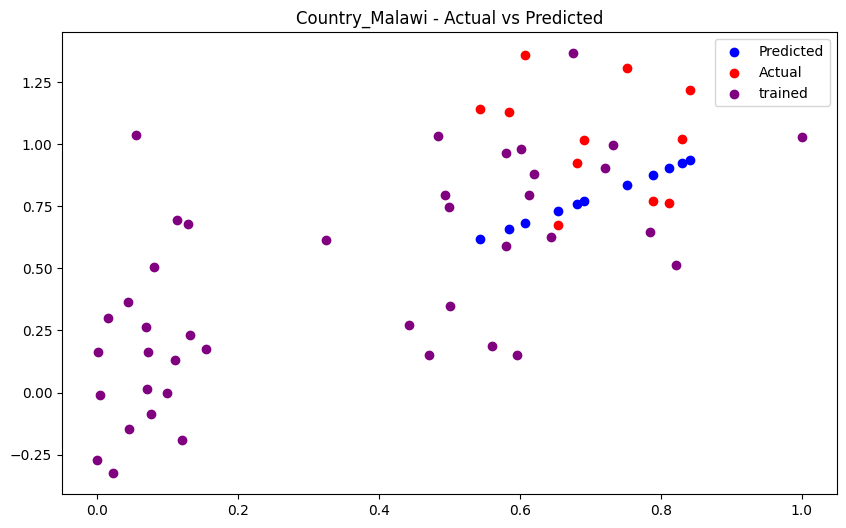

Epoch 1/50
9/9 [==============================] - 5s 127ms/step - loss: 0.2903 - val_loss: 1.7791
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2554 - val_loss: 1.6213
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2184 - val_loss: 1.4495
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1823 - val_loss: 1.2461
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1414 - val_loss: 0.9996
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1067 - val_loss: 0.7475
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0819 - val_loss: 0.5308
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0712 - val_loss: 0.4007
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0688 - val_loss: 0.3541
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0665 - val_loss: 0.3579
Epoch 11/50
9/9 [===========

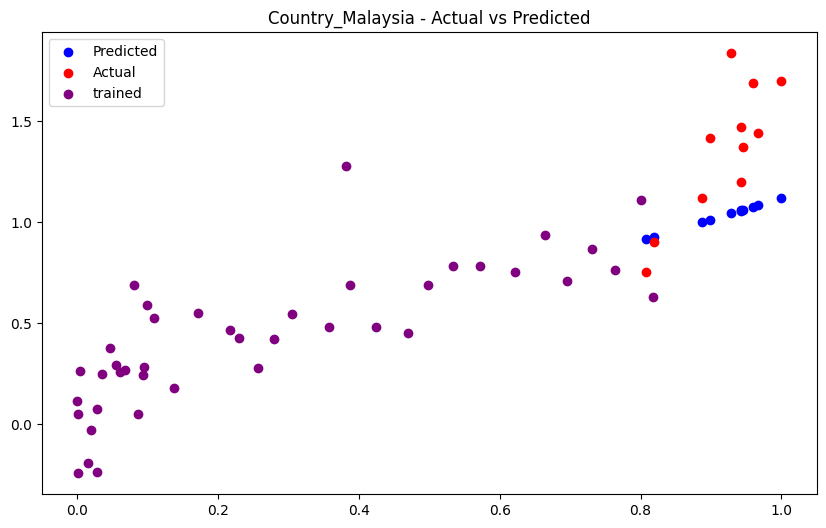

Epoch 1/50
9/9 [==============================] - 5s 135ms/step - loss: 0.1738 - val_loss: 0.9128
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1530 - val_loss: 0.8225
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1315 - val_loss: 0.7243
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1141 - val_loss: 0.6059
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0958 - val_loss: 0.5076
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0839 - val_loss: 0.3964
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0752 - val_loss: 0.3041
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0718 - val_loss: 0.2675
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0707 - val_loss: 0.2374
Epoch 10/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0713 - val_loss: 0.2136
Epoch 11/50
9/9 [===========

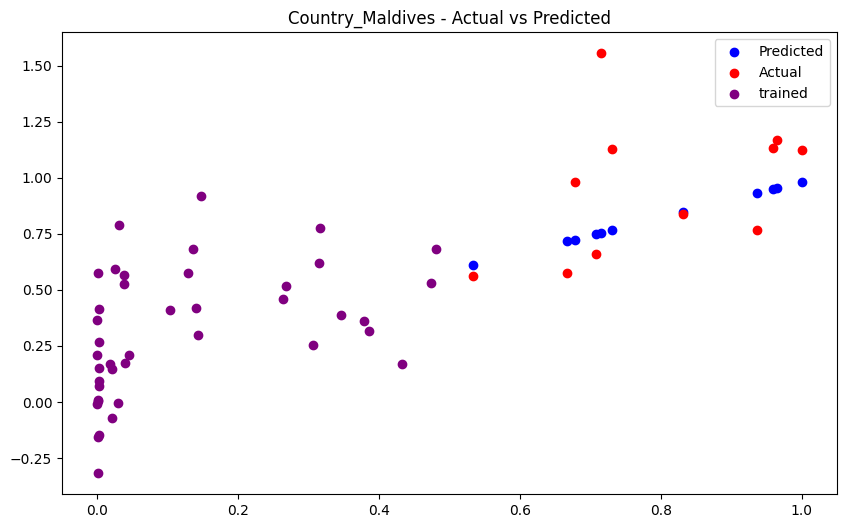

Epoch 1/50
9/9 [==============================] - 5s 141ms/step - loss: 0.6109 - val_loss: 1.1094
Epoch 2/50
9/9 [==============================] - 0s 19ms/step - loss: 0.5711 - val_loss: 1.0026
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.5258 - val_loss: 0.8729
Epoch 4/50
9/9 [==============================] - 0s 20ms/step - loss: 0.4706 - val_loss: 0.7355
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4127 - val_loss: 0.5618
Epoch 6/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3547 - val_loss: 0.3814
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2928 - val_loss: 0.2429
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2550 - val_loss: 0.1518
Epoch 9/50
9/9 [==============================] - 0s 21ms/step - loss: 0.2256 - val_loss: 0.0985
Epoch 10/50
9/9 [==============================] - 0s 20ms/step - loss: 0.2153 - val_loss: 0.0599
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 182ms/step - loss: 0.6338 - val_loss: 2.0799
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.5785 - val_loss: 1.9310
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.5154 - val_loss: 1.7565
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4539 - val_loss: 1.5563
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3894 - val_loss: 1.3741
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3360 - val_loss: 1.1522
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2845 - val_loss: 0.9866
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2621 - val_loss: 0.8209
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2569 - val_loss: 0.7659
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2424 - val_loss: 0.8134
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 131ms/step - loss: 0.2475 - val_loss: 0.5533
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2128 - val_loss: 0.4821
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1838 - val_loss: 0.3935
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1496 - val_loss: 0.2981
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1211 - val_loss: 0.2115
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0981 - val_loss: 0.1371
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0849 - val_loss: 0.0934
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0815 - val_loss: 0.0837
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0779 - val_loss: 0.0756
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0758 - val_loss: 0.0736
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 140ms/step - loss: 0.1733 - val_loss: 1.0174
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1557 - val_loss: 0.9242
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1373 - val_loss: 0.8190
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1191 - val_loss: 0.6912
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1025 - val_loss: 0.5527
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0891 - val_loss: 0.4392
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0812 - val_loss: 0.3376
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0799 - val_loss: 0.2610
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0818 - val_loss: 0.2384
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0795 - val_loss: 0.2811
Epoch 11/50
9/9 [===========

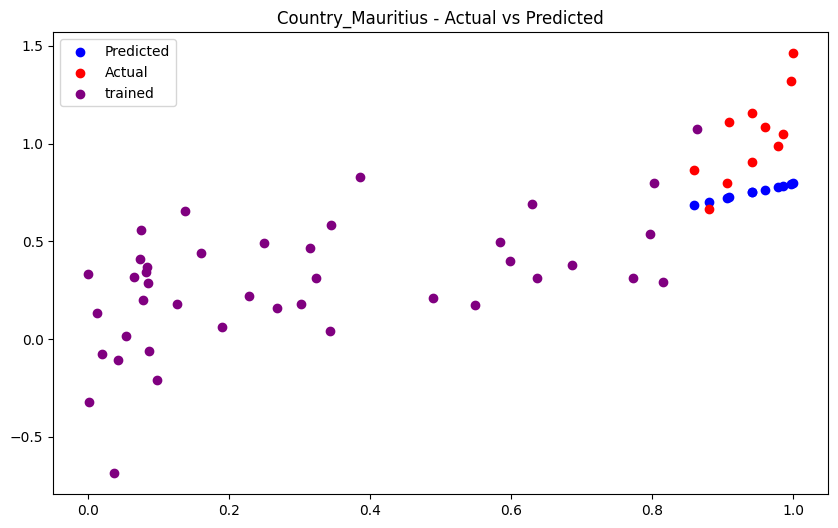

Epoch 1/50
9/9 [==============================] - 5s 123ms/step - loss: 0.2325 - val_loss: 1.4356
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2086 - val_loss: 1.3146
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1781 - val_loss: 1.1903
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1585 - val_loss: 1.0325
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1334 - val_loss: 0.8918
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1142 - val_loss: 0.7373
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1040 - val_loss: 0.5964
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1004 - val_loss: 0.5475
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1005 - val_loss: 0.4970
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0969 - val_loss: 0.5425
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 167ms/step - loss: 1.2418 - val_loss: 3.1038
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 1.1780 - val_loss: 2.9382
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 1.1138 - val_loss: 2.7297
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 1.0320 - val_loss: 2.4657
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.9291 - val_loss: 2.1399
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.8260 - val_loss: 1.7501
Epoch 7/50
9/9 [==============================] - 0s 19ms/step - loss: 0.7052 - val_loss: 1.3124
Epoch 8/50
9/9 [==============================] - 0s 19ms/step - loss: 0.6179 - val_loss: 0.8761
Epoch 9/50
9/9 [==============================] - 0s 18ms/step - loss: 0.5318 - val_loss: 0.6119
Epoch 10/50
9/9 [==============================] - 0s 20ms/step - loss: 0.5114 - val_loss: 0.5189
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 10s 137ms/step - loss: 0.8865 - val_loss: 2.4242
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.8411 - val_loss: 2.2653
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 0.7873 - val_loss: 2.0697
Epoch 4/50
9/9 [==============================] - 0s 20ms/step - loss: 0.7207 - val_loss: 1.8273
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.6440 - val_loss: 1.5260
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.5712 - val_loss: 1.1743
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4835 - val_loss: 0.8489
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4180 - val_loss: 0.5853
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3886 - val_loss: 0.3793
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3735 - val_loss: 0.2920
Epoch 11/50
9/9 [==========

Epoch 1/50
9/9 [==============================] - 6s 136ms/step - loss: 0.4140 - val_loss: 0.8706
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3850 - val_loss: 0.8018
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3514 - val_loss: 0.7331
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3183 - val_loss: 0.6495
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2827 - val_loss: 0.5593
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2481 - val_loss: 0.4847
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2199 - val_loss: 0.4410
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2050 - val_loss: 0.4220
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1962 - val_loss: 0.4218
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1964 - val_loss: 0.4317
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 143ms/step - loss: 0.1769 - val_loss: 0.4066
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1679 - val_loss: 0.3700
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1600 - val_loss: 0.3284
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1534 - val_loss: 0.2801
Epoch 5/50
9/9 [==============================] - 0s 20ms/step - loss: 0.1458 - val_loss: 0.2408
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1407 - val_loss: 0.2061
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1365 - val_loss: 0.1719
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1338 - val_loss: 0.1382
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1323 - val_loss: 0.1228
Epoch 10/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1312 - val_loss: 0.1129
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 7s 156ms/step - loss: 0.9996 - val_loss: 3.0267
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.9472 - val_loss: 2.8942
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.8863 - val_loss: 2.7398
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.8164 - val_loss: 2.5411
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.7474 - val_loss: 2.3103
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6727 - val_loss: 2.0837
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.6063 - val_loss: 1.8492
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5560 - val_loss: 1.5953
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.5290 - val_loss: 1.3906
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5242 - val_loss: 1.3565
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 6s 127ms/step - loss: 0.5542 - val_loss: 1.8637
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.5050 - val_loss: 1.7069
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4562 - val_loss: 1.5193
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3929 - val_loss: 1.3060
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3298 - val_loss: 1.0400
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2630 - val_loss: 0.7520
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2067 - val_loss: 0.4510
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1616 - val_loss: 0.2595
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1511 - val_loss: 0.1730
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1526 - val_loss: 0.1429
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 5s 143ms/step - loss: 0.1948 - val_loss: 0.6819
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1768 - val_loss: 0.6155
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1642 - val_loss: 0.5421
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1534 - val_loss: 0.4730
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1441 - val_loss: 0.4201
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1381 - val_loss: 0.3825
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1379 - val_loss: 0.3383
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1368 - val_loss: 0.3147
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1373 - val_loss: 0.3170
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1372 - val_loss: 0.3291
Epoch 11/50
9/9 [===========

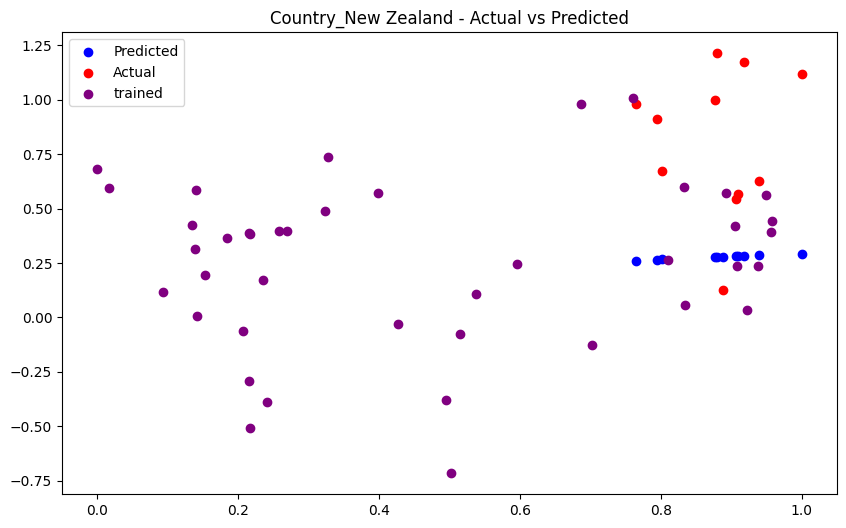

Epoch 1/50
9/9 [==============================] - 6s 136ms/step - loss: 0.2750 - val_loss: 1.0301
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2459 - val_loss: 0.9340
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2137 - val_loss: 0.8161
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1779 - val_loss: 0.6706
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1435 - val_loss: 0.5062
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1143 - val_loss: 0.3707
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0947 - val_loss: 0.2621
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0883 - val_loss: 0.2026
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0856 - val_loss: 0.1994
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0855 - val_loss: 0.2054
Epoch 11/50
9/9 [===========

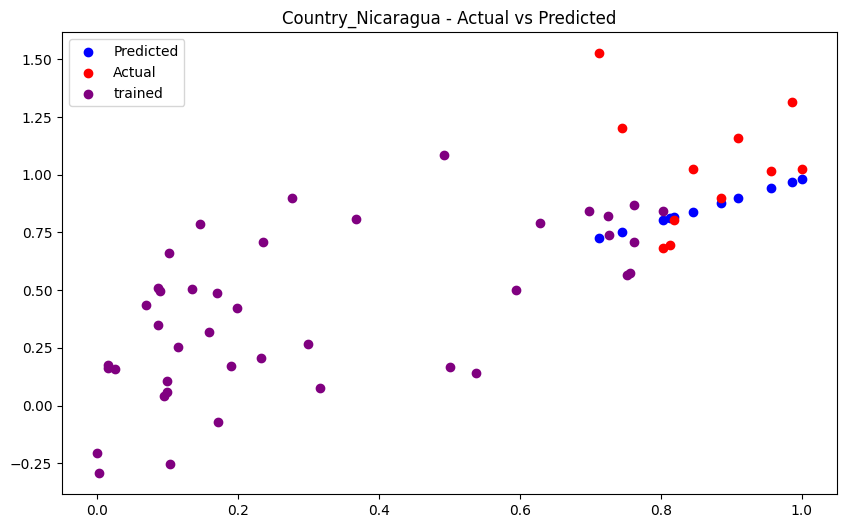

Epoch 1/50
9/9 [==============================] - 6s 121ms/step - loss: 0.3947 - val_loss: 0.8094
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3642 - val_loss: 0.7151
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3275 - val_loss: 0.6139
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2930 - val_loss: 0.4893
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2518 - val_loss: 0.3562
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2206 - val_loss: 0.2223
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1930 - val_loss: 0.1229
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1806 - val_loss: 0.0680
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1763 - val_loss: 0.0475
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1767 - val_loss: 0.0530
Epoch 11/50
9/9 [===========

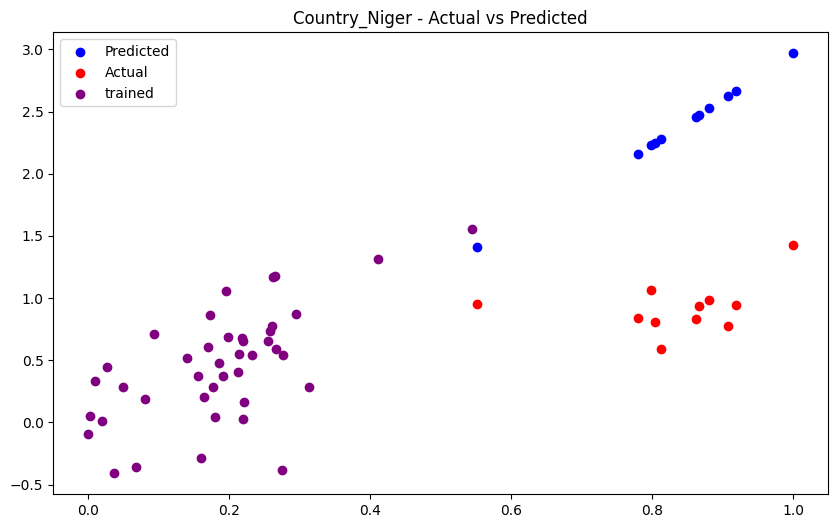

Epoch 1/50
9/9 [==============================] - 6s 147ms/step - loss: 0.4028 - val_loss: 1.1185
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3627 - val_loss: 1.0051
Epoch 3/50
9/9 [==============================] - 0s 21ms/step - loss: 0.3183 - val_loss: 0.8779
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2721 - val_loss: 0.7398
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2256 - val_loss: 0.5787
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1859 - val_loss: 0.4126
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1541 - val_loss: 0.2721
Epoch 8/50
9/9 [==============================] - 0s 20ms/step - loss: 0.1516 - val_loss: 0.1836
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1555 - val_loss: 0.1751
Epoch 10/50
9/9 [==============================] - 0s 20ms/step - loss: 0.1517 - val_loss: 0.2109
Epoch 11/50
9/9 [===========

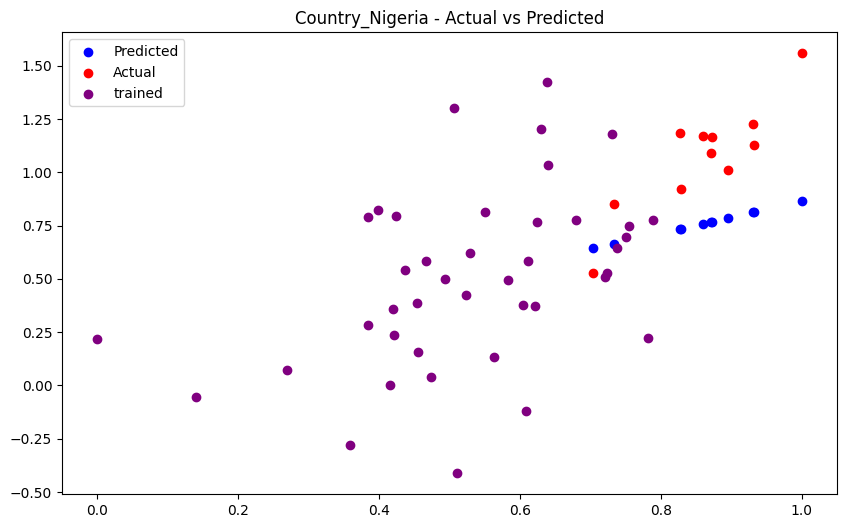

Epoch 1/50
9/9 [==============================] - 7s 153ms/step - loss: 0.9487 - val_loss: 2.5670
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.9065 - val_loss: 2.4245
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.8638 - val_loss: 2.2684
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.8152 - val_loss: 2.1072
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.7717 - val_loss: 1.8810
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.7147 - val_loss: 1.7043
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6822 - val_loss: 1.5275
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6512 - val_loss: 1.3866
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6333 - val_loss: 1.2440
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6152 - val_loss: 1.1685
Epoch 11/50
9/9 [===========

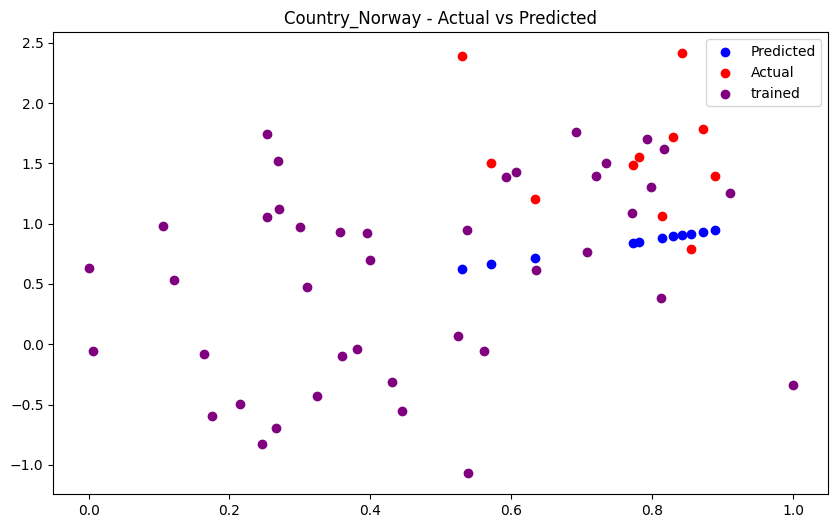

Epoch 1/50
9/9 [==============================] - 6s 131ms/step - loss: 0.2593 - val_loss: 0.8629
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2489 - val_loss: 0.8080
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2400 - val_loss: 0.7500
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2327 - val_loss: 0.6748
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2227 - val_loss: 0.5977
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2123 - val_loss: 0.5148
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2076 - val_loss: 0.4191
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2017 - val_loss: 0.3478
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1979 - val_loss: 0.2767
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1951 - val_loss: 0.2545
Epoch 11/50
9/9 [===========

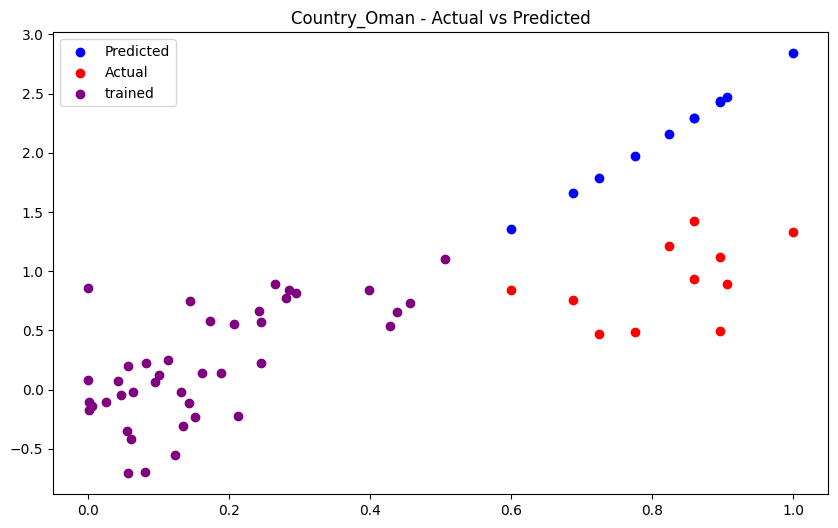

Epoch 1/50
9/9 [==============================] - 6s 132ms/step - loss: 0.2860 - val_loss: 0.7093
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2715 - val_loss: 0.6415
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2575 - val_loss: 0.5826
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2433 - val_loss: 0.5122
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2349 - val_loss: 0.4413
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2234 - val_loss: 0.3924
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2170 - val_loss: 0.3625
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2142 - val_loss: 0.3021
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2057 - val_loss: 0.2857
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2030 - val_loss: 0.2293
Epoch 11/50
9/9 [===========

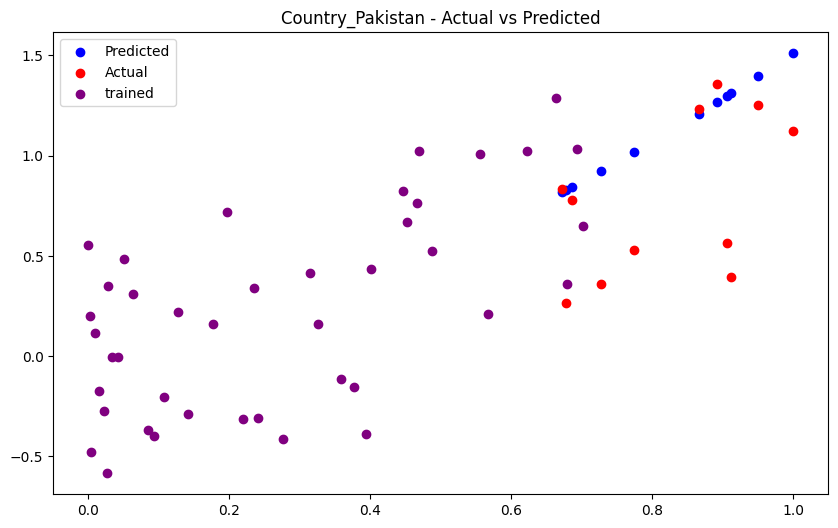

Epoch 1/50
9/9 [==============================] - 6s 139ms/step - loss: 0.2619 - val_loss: 1.1830
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2363 - val_loss: 1.0706
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.2105 - val_loss: 0.9401
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1825 - val_loss: 0.7898
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1550 - val_loss: 0.6265
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1353 - val_loss: 0.4751
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1208 - val_loss: 0.3529
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1153 - val_loss: 0.2991
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1127 - val_loss: 0.2592
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1117 - val_loss: 0.2011
Epoch 11/50
9/9 [===========

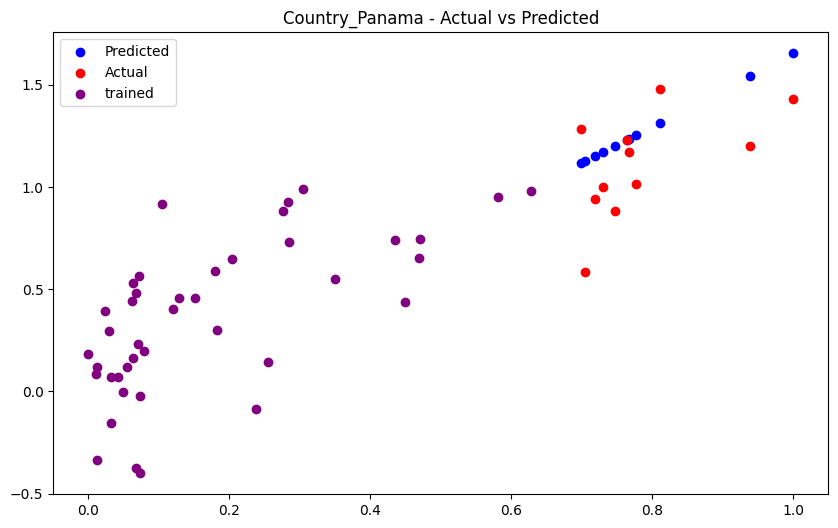

Epoch 1/50
9/9 [==============================] - 11s 147ms/step - loss: 0.1676 - val_loss: 0.5113
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1461 - val_loss: 0.4529
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1263 - val_loss: 0.3890
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1069 - val_loss: 0.3234
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0897 - val_loss: 0.2574
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0760 - val_loss: 0.1964
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0683 - val_loss: 0.1485
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0667 - val_loss: 0.1250
Epoch 9/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0693 - val_loss: 0.1098
Epoch 10/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0701 - val_loss: 0.1098
Epoch 11/50
9/9 [==========

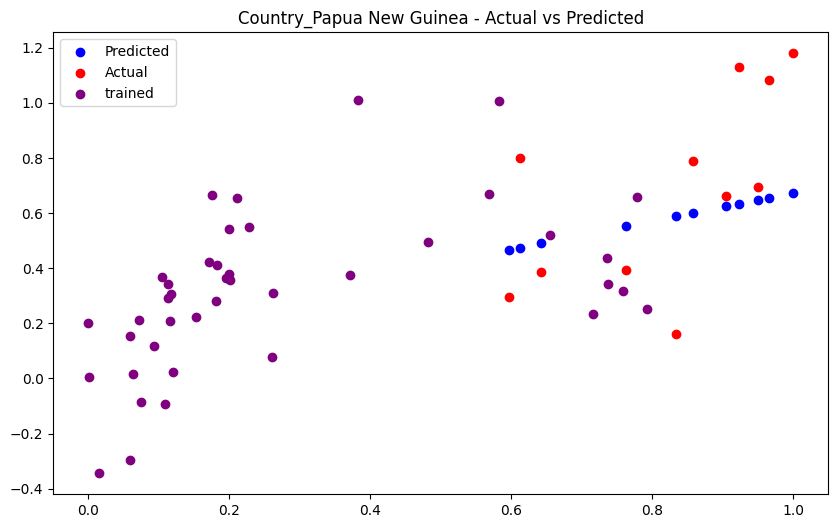

Epoch 1/50
9/9 [==============================] - 7s 153ms/step - loss: 0.2354 - val_loss: 0.8695
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2178 - val_loss: 0.7956
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2004 - val_loss: 0.7136
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1806 - val_loss: 0.6276
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1656 - val_loss: 0.5425
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1520 - val_loss: 0.4495
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1431 - val_loss: 0.3729
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1405 - val_loss: 0.3230
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1378 - val_loss: 0.2994
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1374 - val_loss: 0.2914
Epoch 11/50
9/9 [===========

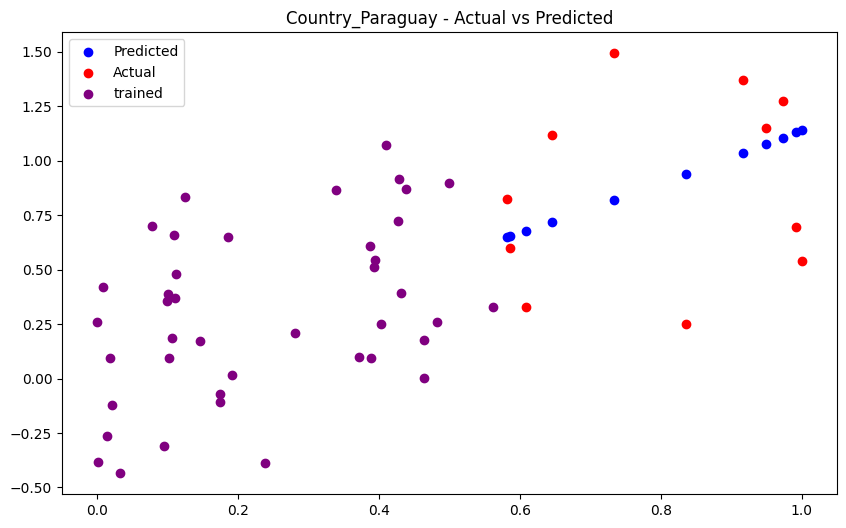

Epoch 1/50
9/9 [==============================] - 6s 137ms/step - loss: 0.3334 - val_loss: 1.1455
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3053 - val_loss: 1.0433
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2743 - val_loss: 0.9242
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2410 - val_loss: 0.7805
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2053 - val_loss: 0.6160
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1757 - val_loss: 0.4535
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1545 - val_loss: 0.3598
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1463 - val_loss: 0.2609
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1401 - val_loss: 0.2003
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1409 - val_loss: 0.1830
Epoch 11/50
9/9 [===========

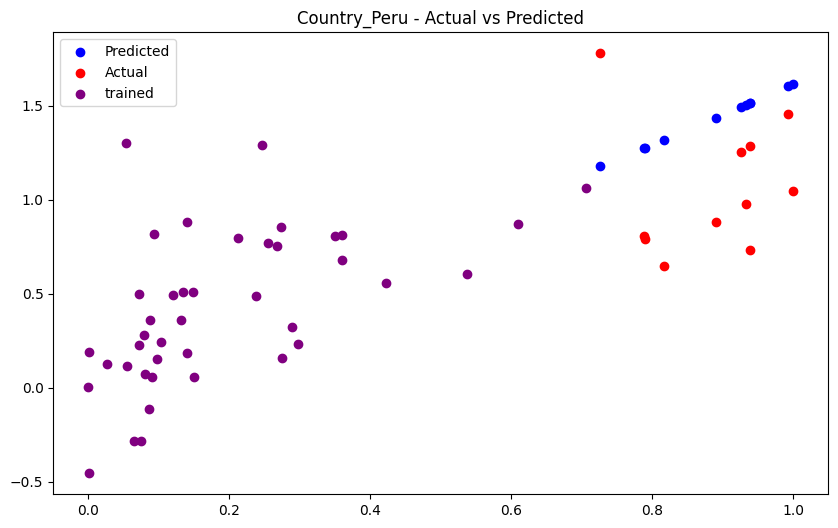

Epoch 1/50
9/9 [==============================] - 5s 119ms/step - loss: 0.2977 - val_loss: 1.4273
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2631 - val_loss: 1.3015
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2260 - val_loss: 1.1375
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1866 - val_loss: 0.9402
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1446 - val_loss: 0.7216
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1086 - val_loss: 0.5021
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0865 - val_loss: 0.3334
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0741 - val_loss: 0.2226
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0734 - val_loss: 0.1804
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0712 - val_loss: 0.1723
Epoch 11/50
9/9 [===========

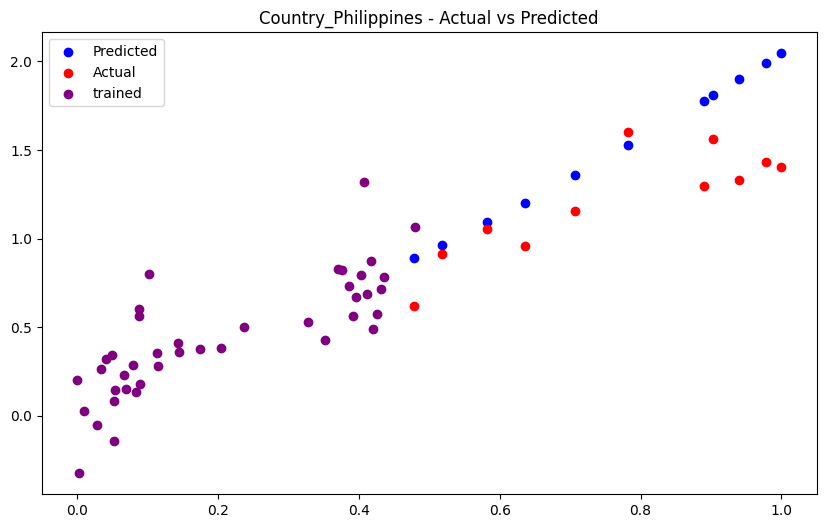

Epoch 1/50
9/9 [==============================] - 5s 174ms/step - loss: 0.6907 - val_loss: 1.9835
Epoch 2/50
9/9 [==============================] - 0s 23ms/step - loss: 0.6392 - val_loss: 1.8502
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.5871 - val_loss: 1.6922
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.5228 - val_loss: 1.5155
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4490 - val_loss: 1.3105
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3865 - val_loss: 1.0691
Epoch 7/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3341 - val_loss: 0.8834
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2969 - val_loss: 0.7284
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2848 - val_loss: 0.6362
Epoch 10/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2765 - val_loss: 0.5967
Epoch 11/50
9/9 [===========

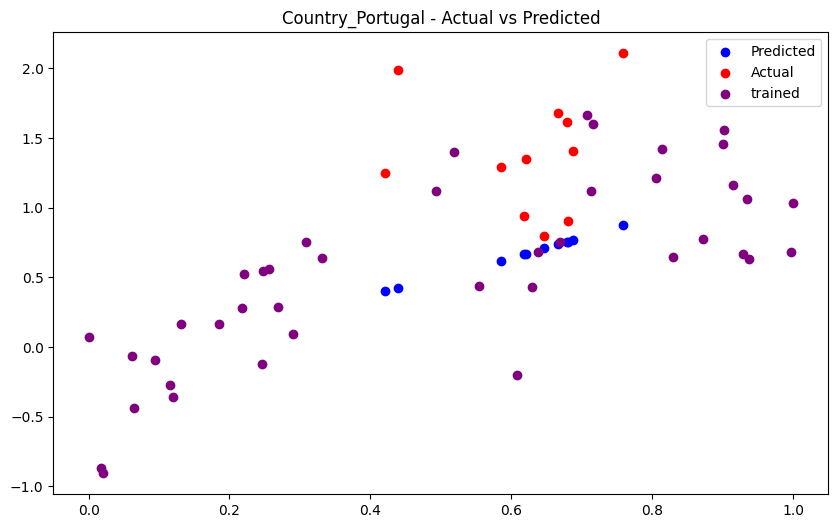

Epoch 1/50
9/9 [==============================] - 7s 149ms/step - loss: 0.3363 - val_loss: 0.8517
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3096 - val_loss: 0.7828
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2823 - val_loss: 0.6965
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2489 - val_loss: 0.5966
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2162 - val_loss: 0.4806
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1891 - val_loss: 0.3715
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1664 - val_loss: 0.2773
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1529 - val_loss: 0.2277
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1500 - val_loss: 0.1941
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1498 - val_loss: 0.1812
Epoch 11/50
9/9 [===========

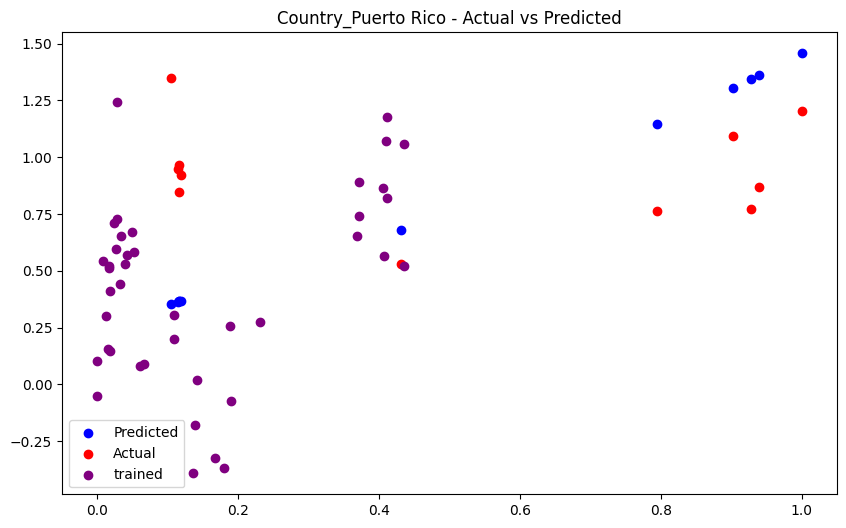

Epoch 1/50
9/9 [==============================] - 7s 123ms/step - loss: 0.6448 - val_loss: 2.7860
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6184 - val_loss: 2.6285
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.5922 - val_loss: 2.4617
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.5561 - val_loss: 2.2661
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.5257 - val_loss: 1.9782
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4874 - val_loss: 1.6896
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4511 - val_loss: 1.3580
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4123 - val_loss: 1.0389
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4066 - val_loss: 0.7183
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3858 - val_loss: 0.5996
Epoch 11/50
9/9 [===========

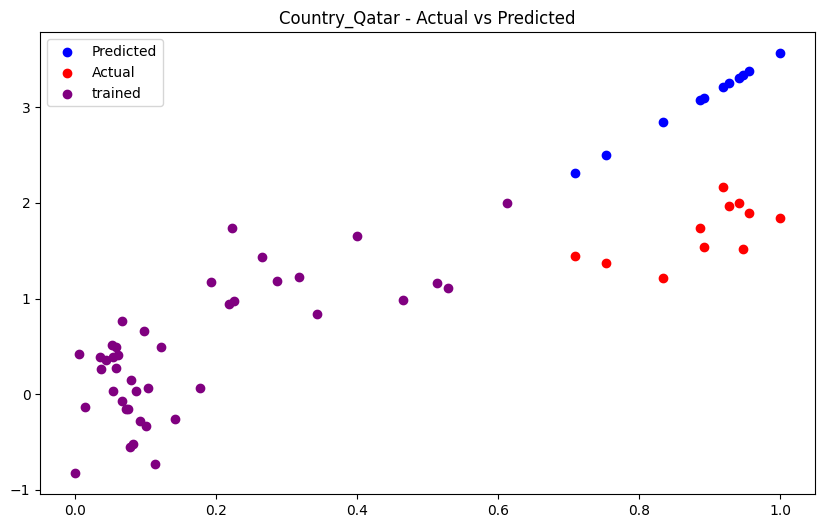

Epoch 1/50
9/9 [==============================] - 5s 123ms/step - loss: 0.6987 - val_loss: 2.9542
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.6817 - val_loss: 2.8740
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.6667 - val_loss: 2.7727
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6497 - val_loss: 2.6752
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 0.6332 - val_loss: 2.5947
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6232 - val_loss: 2.5139
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.6142 - val_loss: 2.4257
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6041 - val_loss: 2.3635
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.5965 - val_loss: 2.2978
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.5904 - val_loss: 2.2095
Epoch 11/50
9/9 [===========

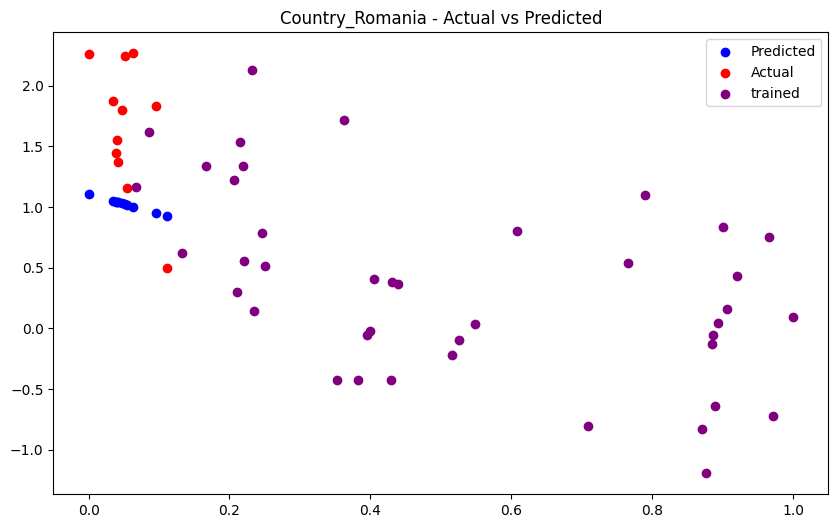

Epoch 1/50
9/9 [==============================] - 6s 130ms/step - loss: 0.6070 - val_loss: 1.3055
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.6044 - val_loss: 1.2909
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.6045 - val_loss: 1.2741
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6056 - val_loss: 1.2580
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6038 - val_loss: 1.2660
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6033 - val_loss: 1.2465
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6033 - val_loss: 1.2208
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.6024 - val_loss: 1.2167
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.6020 - val_loss: 1.2142
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.6021 - val_loss: 1.1961
Epoch 11/50
9/9 [===========

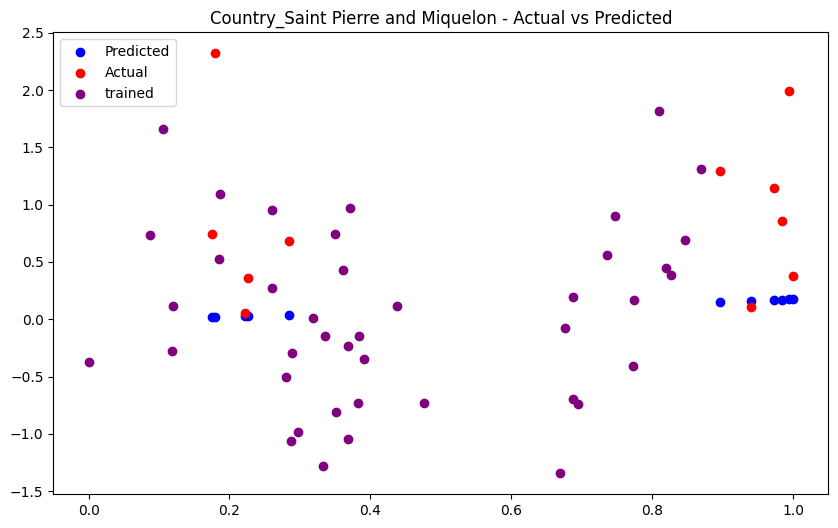

Epoch 1/50
9/9 [==============================] - 6s 123ms/step - loss: 0.2934 - val_loss: 1.2607
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2733 - val_loss: 1.1599
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2523 - val_loss: 1.0598
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2355 - val_loss: 0.9438
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2105 - val_loss: 0.8341
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1920 - val_loss: 0.6900
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1748 - val_loss: 0.5459
Epoch 8/50
9/9 [==============================] - 0s 20ms/step - loss: 0.1622 - val_loss: 0.4192
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1626 - val_loss: 0.3079
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1544 - val_loss: 0.2599
Epoch 11/50
9/9 [===========

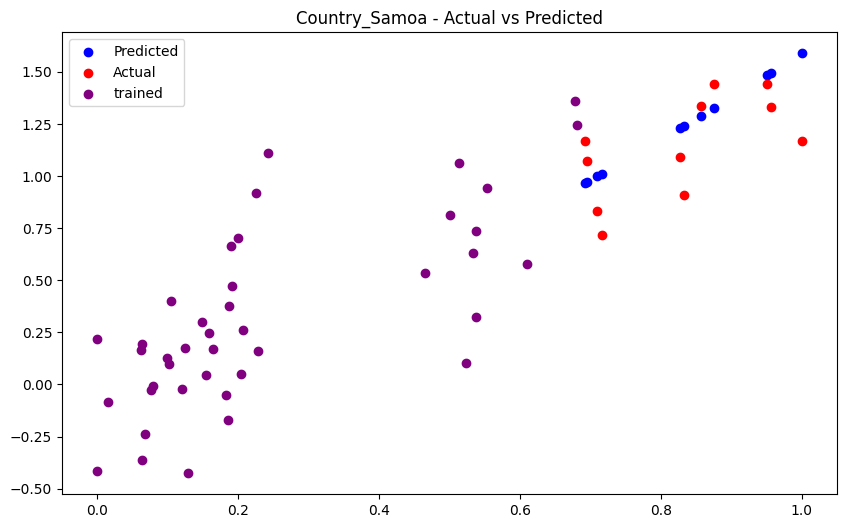

Epoch 1/50
9/9 [==============================] - 7s 133ms/step - loss: 0.5248 - val_loss: 2.3782
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4992 - val_loss: 2.2165
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 0.4832 - val_loss: 2.0469
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4559 - val_loss: 1.9047
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4378 - val_loss: 1.7384
Epoch 6/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4203 - val_loss: 1.5472
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4014 - val_loss: 1.3079
Epoch 8/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3843 - val_loss: 1.0676
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3712 - val_loss: 0.8621
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3643 - val_loss: 0.6777
Epoch 11/50
9/9 [===========

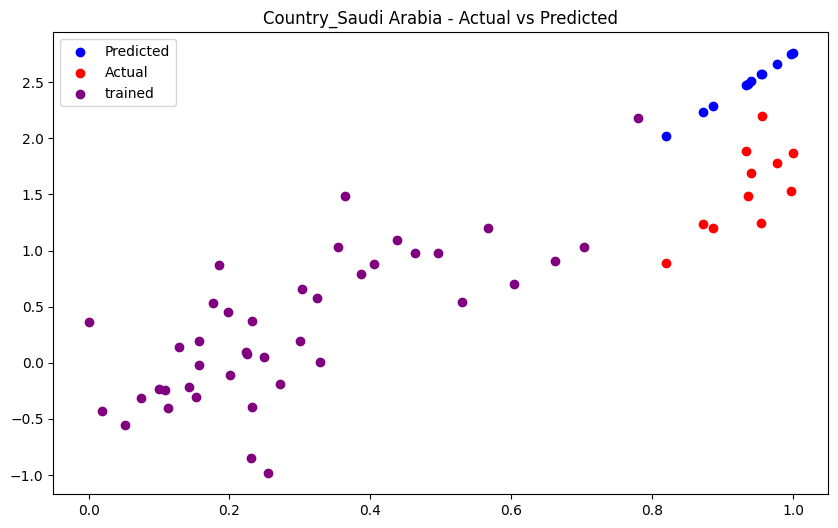

Epoch 1/50
9/9 [==============================] - 7s 191ms/step - loss: 0.8657 - val_loss: 1.7303
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.8096 - val_loss: 1.5944
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.7433 - val_loss: 1.4243
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.6666 - val_loss: 1.2082
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5677 - val_loss: 0.9457
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.4589 - val_loss: 0.6541
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.3495 - val_loss: 0.3452
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2398 - val_loss: 0.1209
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1763 - val_loss: 0.0532
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1716 - val_loss: 0.1009
Epoch 11/50
9/9 [===========

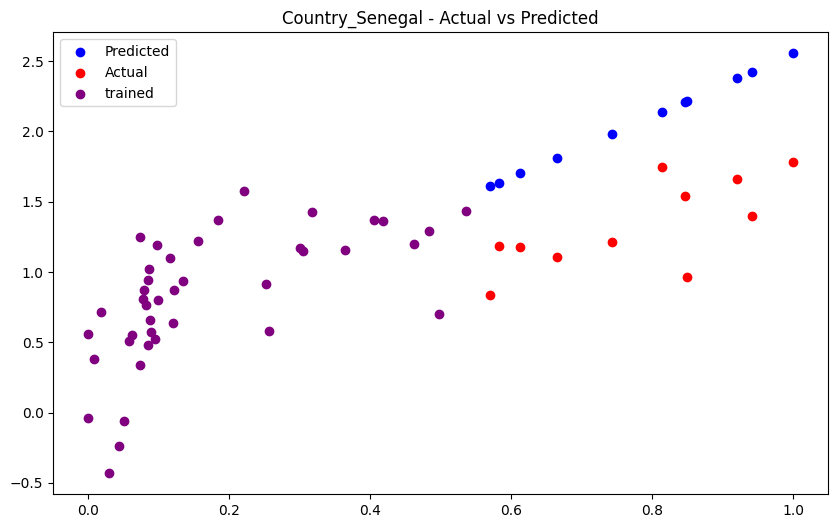

Epoch 1/50
9/9 [==============================] - 6s 133ms/step - loss: 0.2098 - val_loss: 1.0632
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1896 - val_loss: 0.9684
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1688 - val_loss: 0.8610
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1450 - val_loss: 0.7330
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1249 - val_loss: 0.6004
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1062 - val_loss: 0.4907
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0973 - val_loss: 0.3697
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0938 - val_loss: 0.2983
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0910 - val_loss: 0.2989
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0900 - val_loss: 0.2828
Epoch 11/50
9/9 [===========

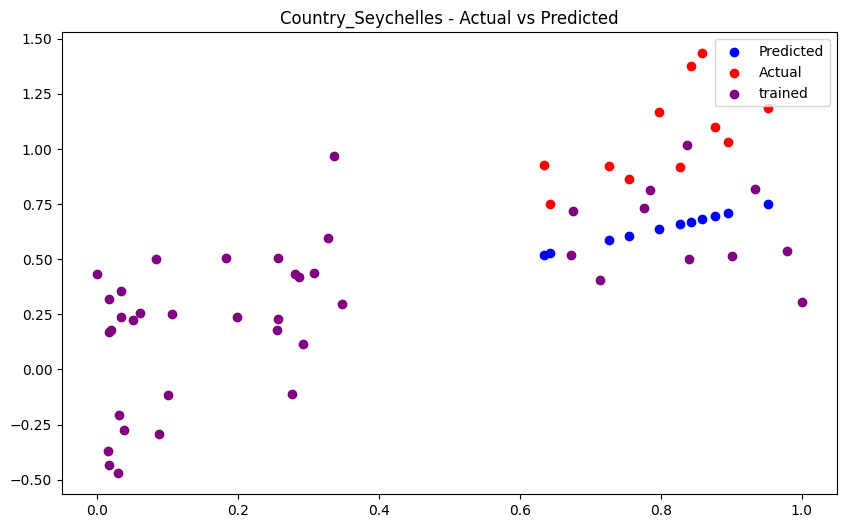

Epoch 1/50
9/9 [==============================] - 7s 123ms/step - loss: 0.4213 - val_loss: 1.5159
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3796 - val_loss: 1.3853
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3330 - val_loss: 1.2294
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2881 - val_loss: 1.0337
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2316 - val_loss: 0.8202
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1810 - val_loss: 0.6071
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1465 - val_loss: 0.4255
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1296 - val_loss: 0.2984
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1261 - val_loss: 0.2657
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1268 - val_loss: 0.2636
Epoch 11/50
9/9 [===========

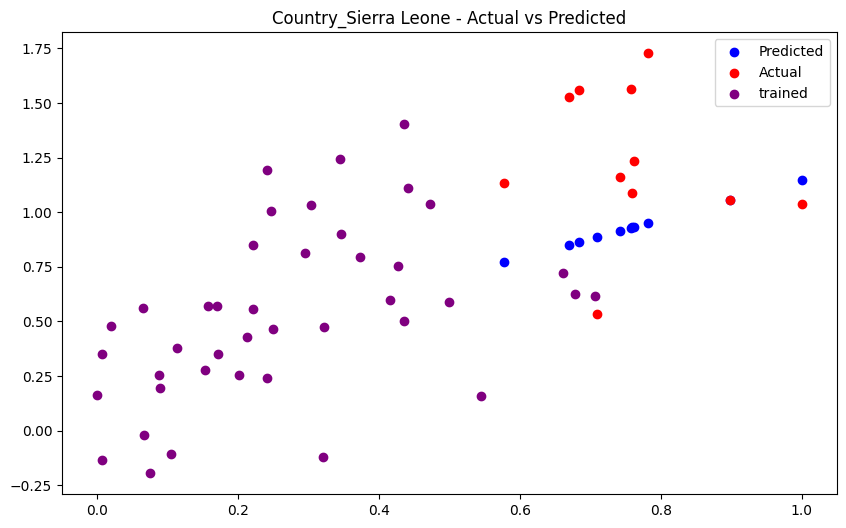

Epoch 1/50
9/9 [==============================] - 5s 134ms/step - loss: 0.1933 - val_loss: 1.0232
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1661 - val_loss: 0.9157
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1394 - val_loss: 0.8020
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1133 - val_loss: 0.6688
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0882 - val_loss: 0.5439
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0716 - val_loss: 0.4193
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0605 - val_loss: 0.3491
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0586 - val_loss: 0.3190
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0572 - val_loss: 0.3104
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0561 - val_loss: 0.2949
Epoch 11/50
9/9 [===========

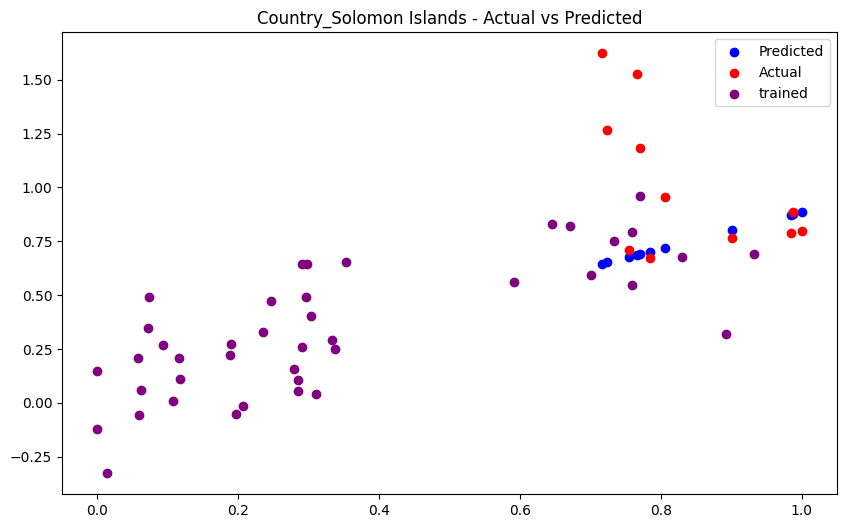

Epoch 1/50
9/9 [==============================] - 6s 131ms/step - loss: 0.3194 - val_loss: 1.6265
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2877 - val_loss: 1.5167
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2503 - val_loss: 1.3967
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2151 - val_loss: 1.2473
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1791 - val_loss: 1.0825
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1526 - val_loss: 0.9262
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1406 - val_loss: 0.8022
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1367 - val_loss: 0.7526
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1402 - val_loss: 0.7151
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1408 - val_loss: 0.7202
Epoch 11/50
9/9 [===========

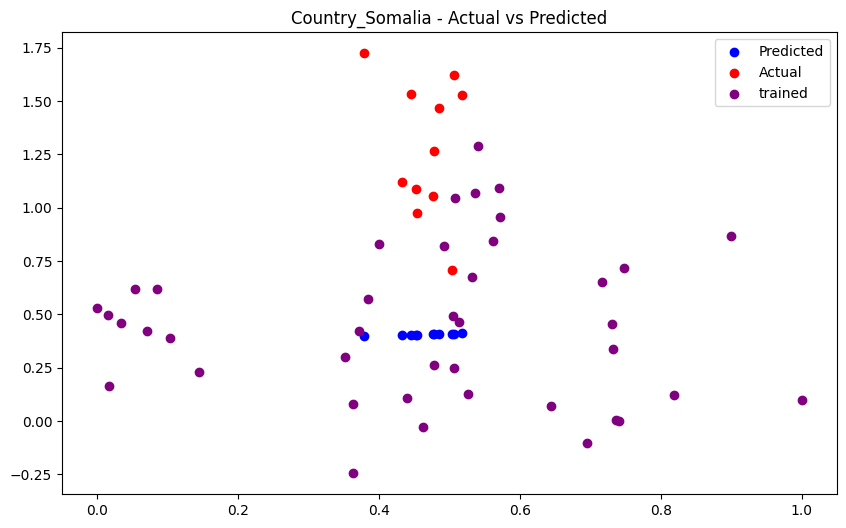

Epoch 1/50
9/9 [==============================] - 6s 139ms/step - loss: 0.2978 - val_loss: 1.0616
Epoch 2/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2653 - val_loss: 0.9599
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2323 - val_loss: 0.8385
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1950 - val_loss: 0.7004
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1585 - val_loss: 0.5510
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1353 - val_loss: 0.4277
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1210 - val_loss: 0.3561
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1167 - val_loss: 0.3357
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1148 - val_loss: 0.3049
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1131 - val_loss: 0.2925
Epoch 11/50
9/9 [===========

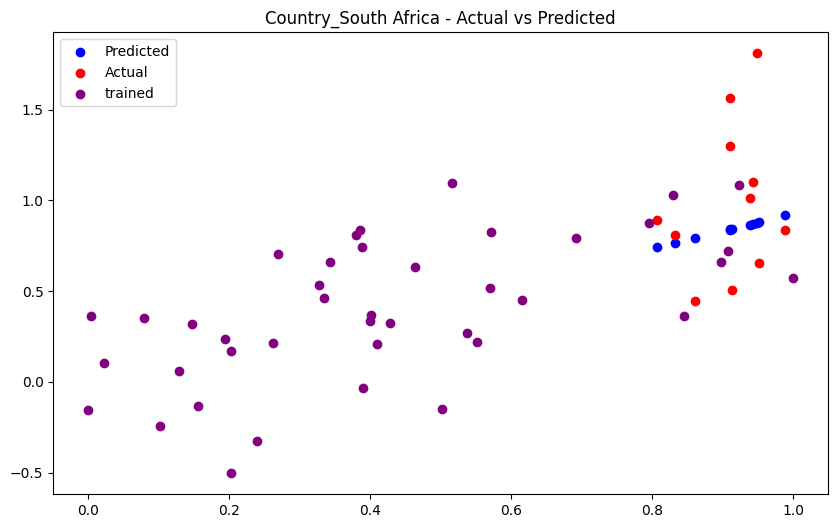

Epoch 1/50
9/9 [==============================] - 7s 167ms/step - loss: 0.2539 - val_loss: 1.0290
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2266 - val_loss: 0.9226
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1997 - val_loss: 0.7965
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1708 - val_loss: 0.6442
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1409 - val_loss: 0.4867
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1168 - val_loss: 0.3530
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1018 - val_loss: 0.2581
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0946 - val_loss: 0.1541
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0900 - val_loss: 0.1069
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0889 - val_loss: 0.0649
Epoch 11/50
9/9 [===========

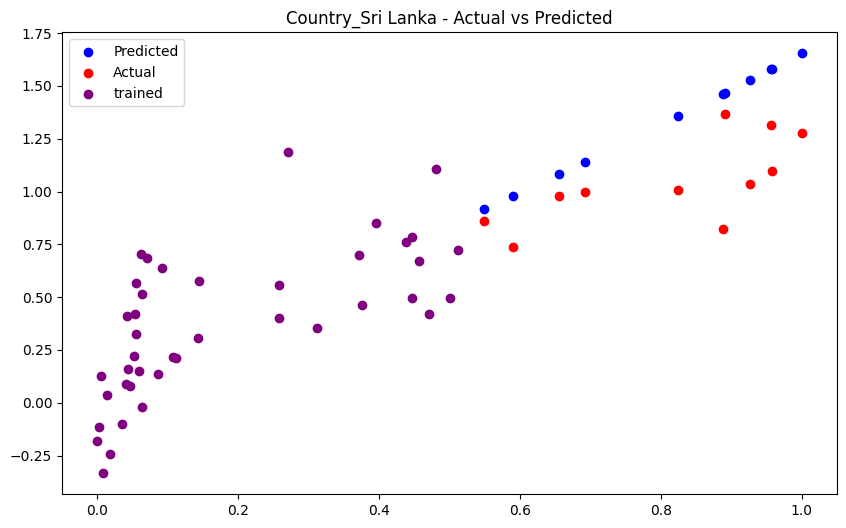

Epoch 1/50
9/9 [==============================] - 6s 126ms/step - loss: 0.2596 - val_loss: 0.6757
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2356 - val_loss: 0.6000
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2123 - val_loss: 0.5118
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1858 - val_loss: 0.4139
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1618 - val_loss: 0.3114
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1377 - val_loss: 0.2289
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1221 - val_loss: 0.1553
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1144 - val_loss: 0.1061
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1119 - val_loss: 0.0915
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1123 - val_loss: 0.1006
Epoch 11/50
9/9 [===========

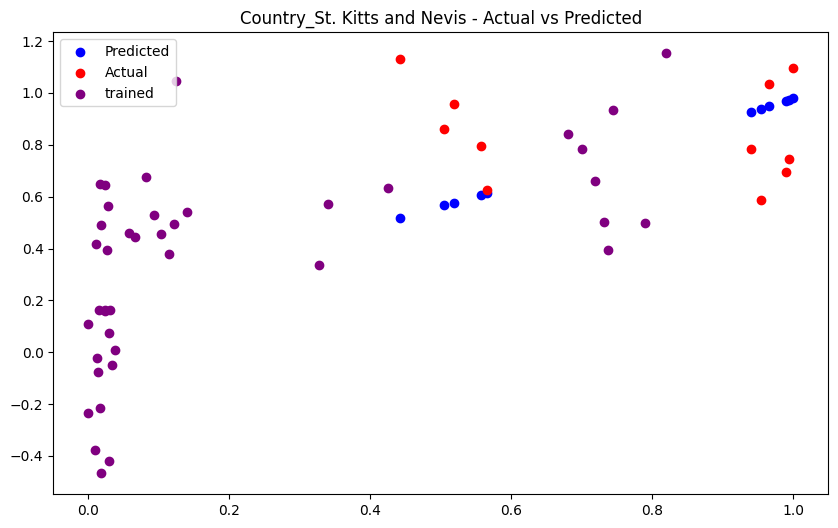

Epoch 1/50
9/9 [==============================] - 6s 135ms/step - loss: 0.2429 - val_loss: 0.5749
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2178 - val_loss: 0.4969
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1970 - val_loss: 0.4227
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1769 - val_loss: 0.3375
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1521 - val_loss: 0.2523
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1310 - val_loss: 0.1598
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1124 - val_loss: 0.0968
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1054 - val_loss: 0.0526
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1055 - val_loss: 0.0402
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1026 - val_loss: 0.0399
Epoch 11/50
9/9 [===========

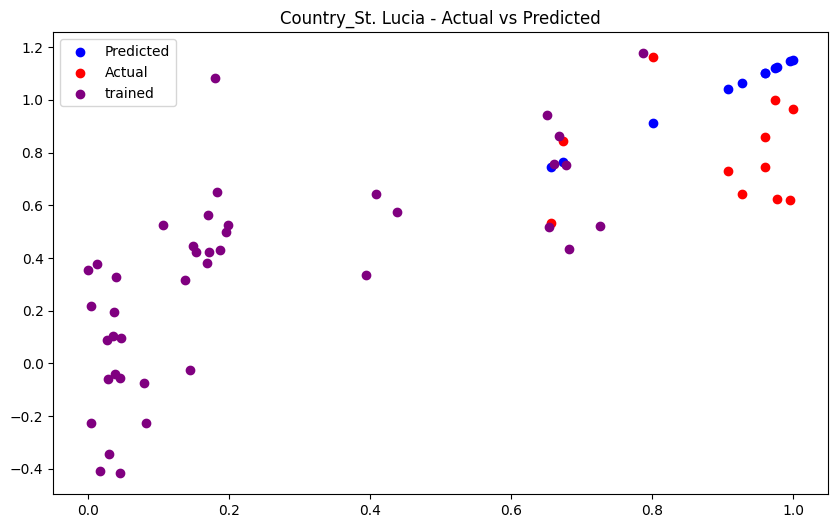

Epoch 1/50
9/9 [==============================] - 7s 171ms/step - loss: 0.2700 - val_loss: 0.6630
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2486 - val_loss: 0.6000
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2252 - val_loss: 0.5322
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2026 - val_loss: 0.4615
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1834 - val_loss: 0.3760
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1630 - val_loss: 0.2894
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1430 - val_loss: 0.2222
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1333 - val_loss: 0.1798
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1270 - val_loss: 0.1630
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1221 - val_loss: 0.1491
Epoch 11/50
9/9 [===========

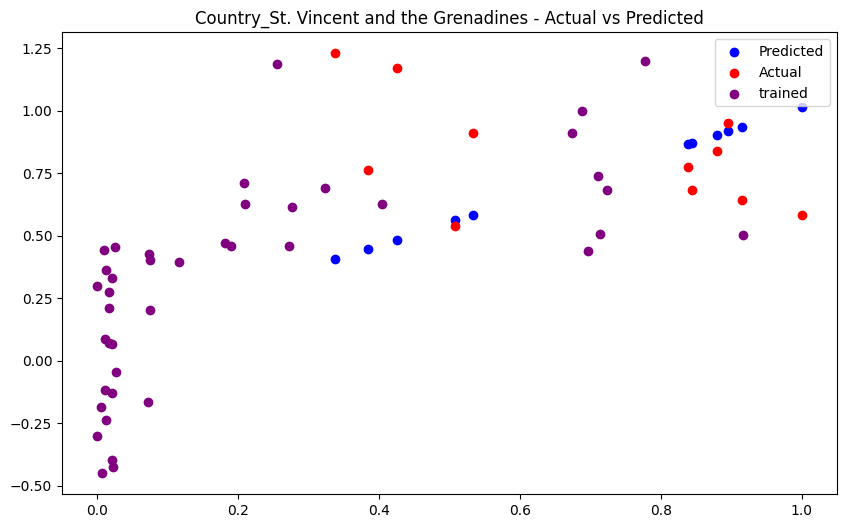

Epoch 1/50
9/9 [==============================] - 6s 128ms/step - loss: 0.4976 - val_loss: 1.7163
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4711 - val_loss: 1.6139
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4389 - val_loss: 1.4843
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.4105 - val_loss: 1.3271
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3755 - val_loss: 1.1704
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3434 - val_loss: 0.9982
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3139 - val_loss: 0.8474
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2952 - val_loss: 0.6988
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2881 - val_loss: 0.6158
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2833 - val_loss: 0.6175
Epoch 11/50
9/9 [===========

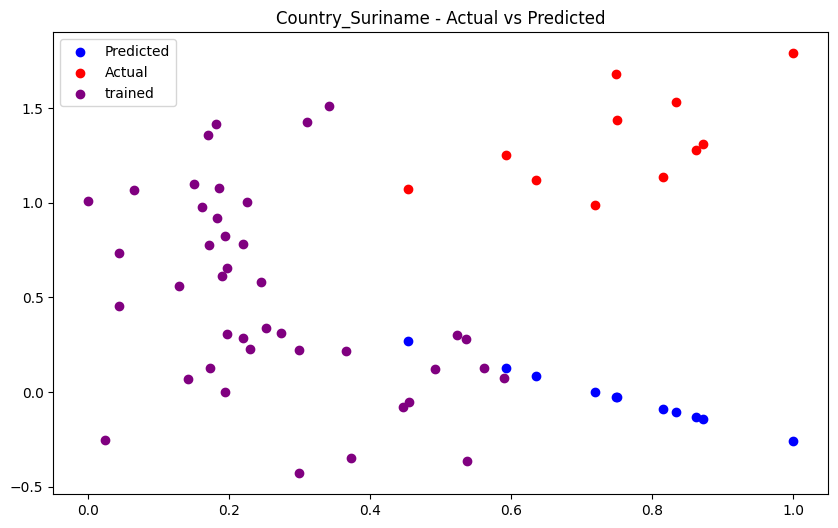

Epoch 1/50
9/9 [==============================] - 6s 132ms/step - loss: 1.2573 - val_loss: 3.4944
Epoch 2/50
9/9 [==============================] - 0s 17ms/step - loss: 1.2228 - val_loss: 3.4062
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 1.1818 - val_loss: 3.3048
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 1.1474 - val_loss: 3.1946
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 1.1081 - val_loss: 3.0641
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 1.0631 - val_loss: 2.9040
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 1.0118 - val_loss: 2.7224
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.9718 - val_loss: 2.5154
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.9539 - val_loss: 2.3226
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.9367 - val_loss: 2.2865
Epoch 11/50
9/9 [===========

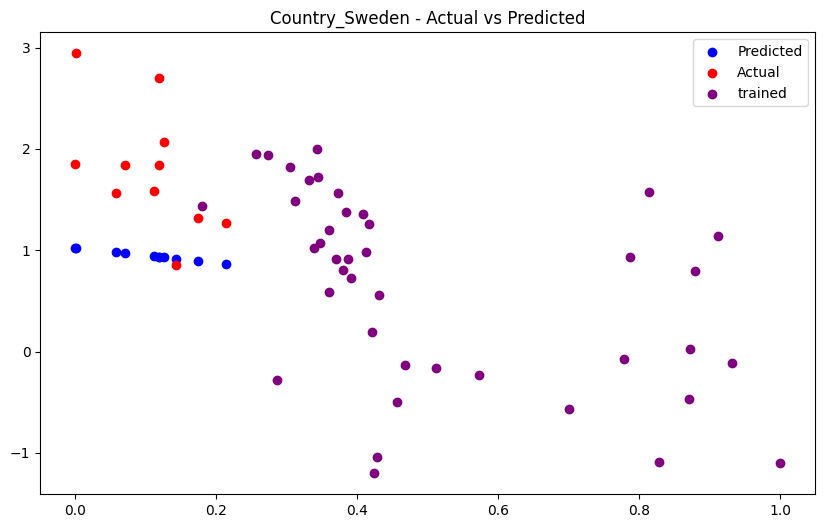

Epoch 1/50
9/9 [==============================] - 7s 175ms/step - loss: 0.2701 - val_loss: 1.2676
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2396 - val_loss: 1.1521
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2128 - val_loss: 1.0122
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1828 - val_loss: 0.8501
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1520 - val_loss: 0.6848
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1287 - val_loss: 0.4975
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1130 - val_loss: 0.3492
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1048 - val_loss: 0.2746
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1015 - val_loss: 0.2607
Epoch 10/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0967 - val_loss: 0.2471
Epoch 11/50
9/9 [===========

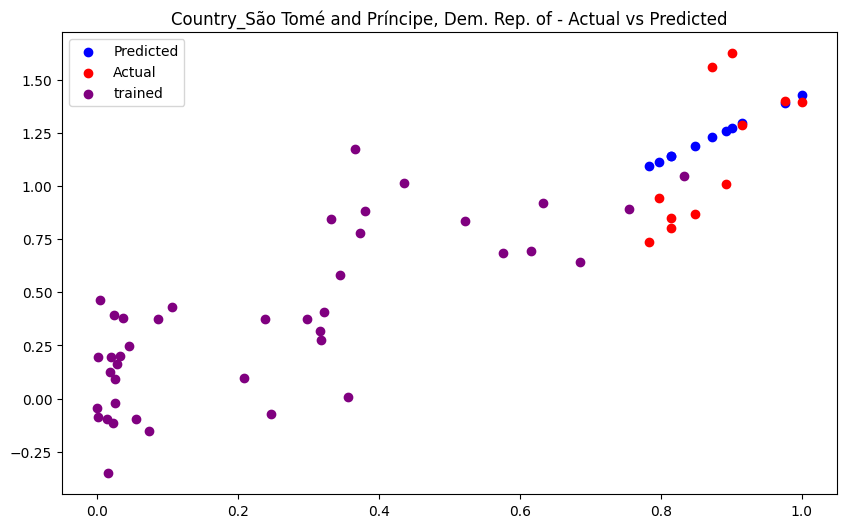

Epoch 1/50
9/9 [==============================] - 8s 223ms/step - loss: 0.3451 - val_loss: 1.4790
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3118 - val_loss: 1.3414
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2724 - val_loss: 1.1859
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2303 - val_loss: 0.9996
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1908 - val_loss: 0.7821
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1496 - val_loss: 0.5786
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1242 - val_loss: 0.4148
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1207 - val_loss: 0.3050
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1193 - val_loss: 0.3020
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1168 - val_loss: 0.3045
Epoch 11/50
9/9 [===========

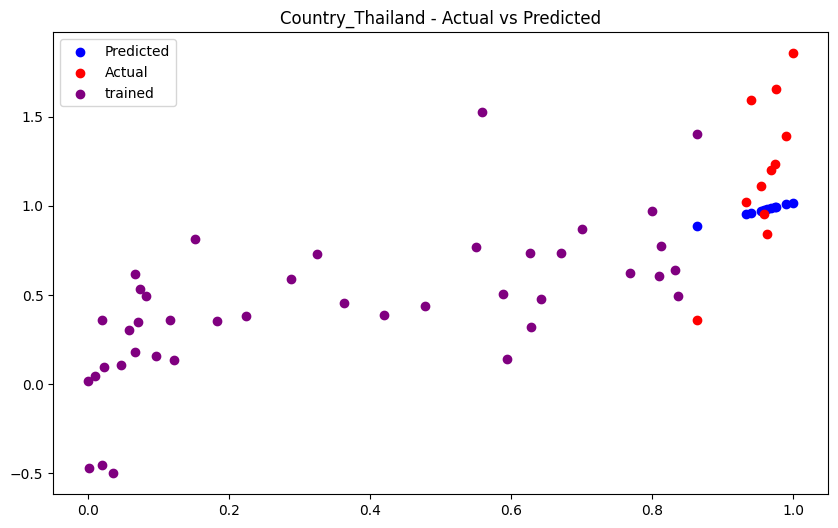

Epoch 1/50
9/9 [==============================] - 8s 176ms/step - loss: 0.3420 - val_loss: 1.0885
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3055 - val_loss: 0.9747
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2658 - val_loss: 0.8562
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2275 - val_loss: 0.7287
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1863 - val_loss: 0.5803
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1480 - val_loss: 0.4268
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1160 - val_loss: 0.2950
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1018 - val_loss: 0.1951
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0952 - val_loss: 0.1573
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0938 - val_loss: 0.1484
Epoch 11/50
9/9 [===========

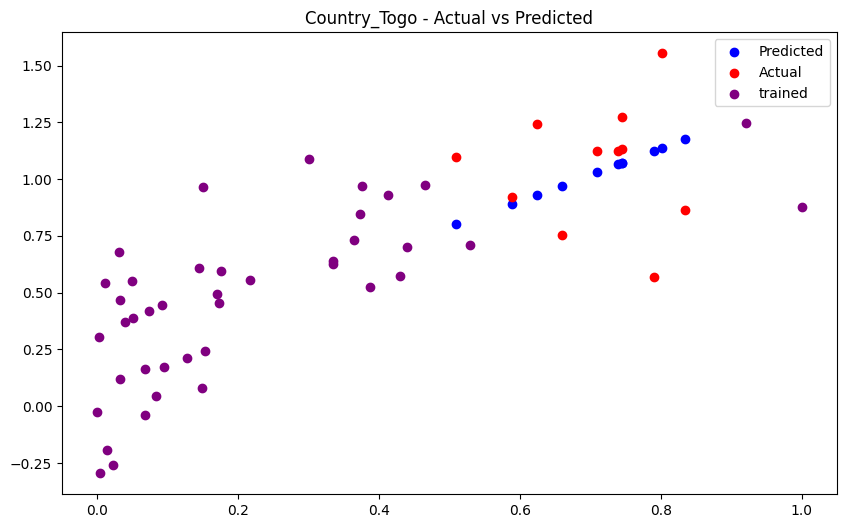

Epoch 1/50
9/9 [==============================] - 6s 125ms/step - loss: 0.1561 - val_loss: 1.0097
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1301 - val_loss: 0.9021
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1055 - val_loss: 0.7825
Epoch 4/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0802 - val_loss: 0.6509
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0639 - val_loss: 0.5121
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0513 - val_loss: 0.4261
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0494 - val_loss: 0.4003
Epoch 8/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0498 - val_loss: 0.4055
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0498 - val_loss: 0.3780
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0494 - val_loss: 0.3675
Epoch 11/50
9/9 [===========

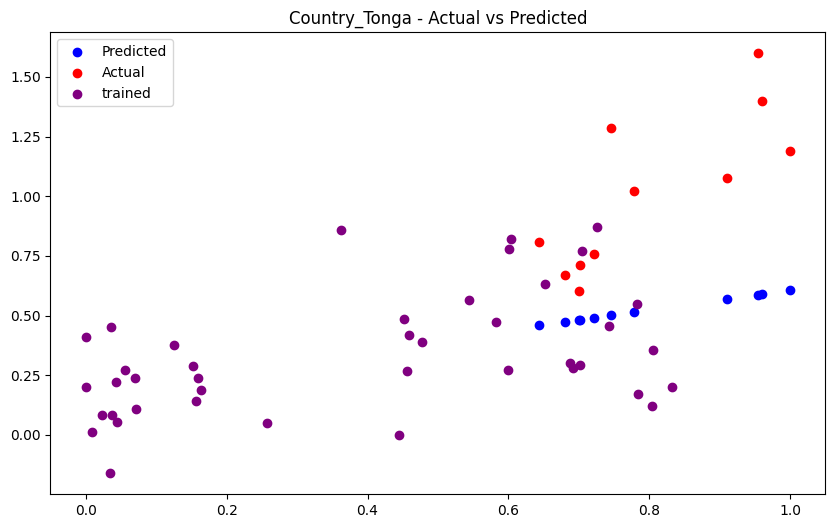

Epoch 1/50
9/9 [==============================] - 6s 131ms/step - loss: 0.2820 - val_loss: 0.8084
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2592 - val_loss: 0.7243
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2344 - val_loss: 0.6298
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2069 - val_loss: 0.5294
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1844 - val_loss: 0.4124
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1662 - val_loss: 0.3097
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1541 - val_loss: 0.2362
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1440 - val_loss: 0.2212
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1399 - val_loss: 0.1941
Epoch 10/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1357 - val_loss: 0.1709
Epoch 11/50
9/9 [===========

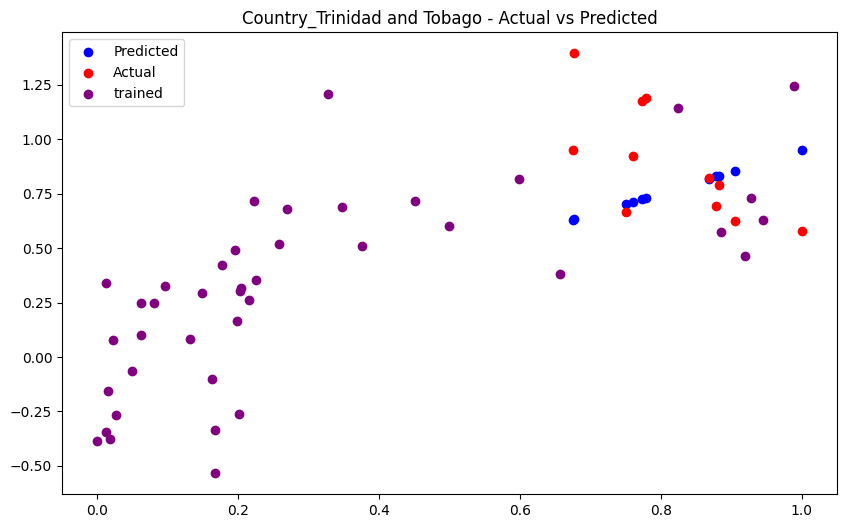

Epoch 1/50
9/9 [==============================] - 7s 221ms/step - loss: 0.8799 - val_loss: 2.6945
Epoch 2/50
9/9 [==============================] - 0s 21ms/step - loss: 0.8364 - val_loss: 2.5411
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.7821 - val_loss: 2.3649
Epoch 4/50
9/9 [==============================] - 0s 24ms/step - loss: 0.7200 - val_loss: 2.1361
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.6551 - val_loss: 1.8719
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.5794 - val_loss: 1.5398
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.5009 - val_loss: 1.2084
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4296 - val_loss: 0.8794
Epoch 9/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3696 - val_loss: 0.5807
Epoch 10/50
9/9 [==============================] - 0s 22ms/step - loss: 0.3383 - val_loss: 0.3984
Epoch 11/50
9/9 [===========

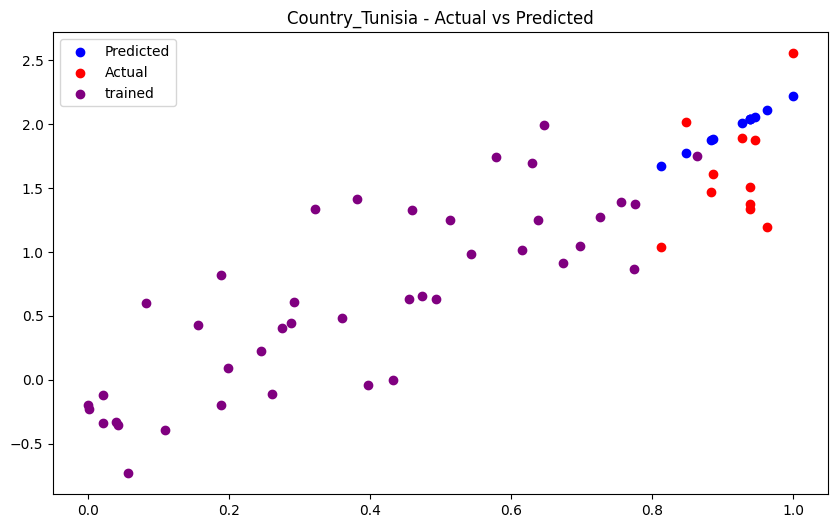

Epoch 1/50
9/9 [==============================] - 8s 178ms/step - loss: 0.4332 - val_loss: 1.2287
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3980 - val_loss: 1.1353
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3657 - val_loss: 1.0209
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3233 - val_loss: 0.8858
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2759 - val_loss: 0.7260
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2315 - val_loss: 0.5512
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1807 - val_loss: 0.3937
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1553 - val_loss: 0.2537
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1334 - val_loss: 0.2068
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1306 - val_loss: 0.1829
Epoch 11/50
9/9 [===========

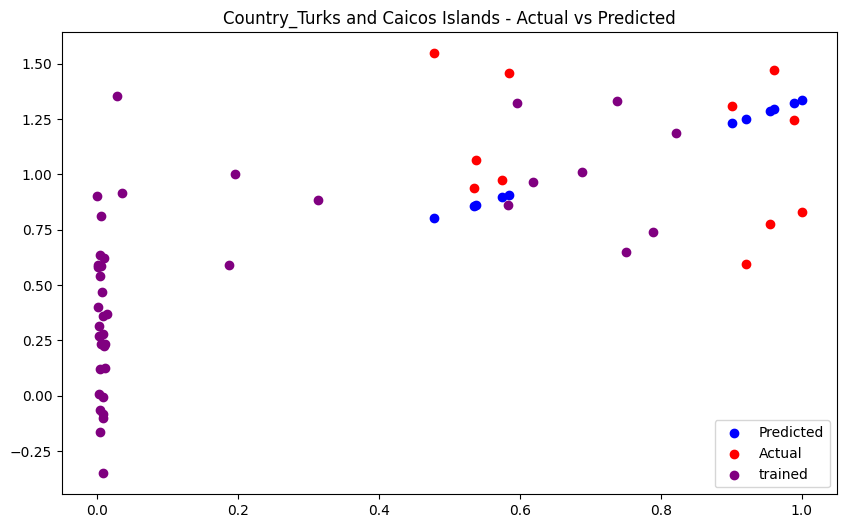

Epoch 1/50
9/9 [==============================] - 7s 180ms/step - loss: 0.2829 - val_loss: 1.5534
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2519 - val_loss: 1.4257
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2245 - val_loss: 1.2824
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1990 - val_loss: 1.1223
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1715 - val_loss: 0.9482
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1451 - val_loss: 0.7574
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1223 - val_loss: 0.5666
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1100 - val_loss: 0.4248
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1070 - val_loss: 0.2954
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1065 - val_loss: 0.2571
Epoch 11/50
9/9 [===========

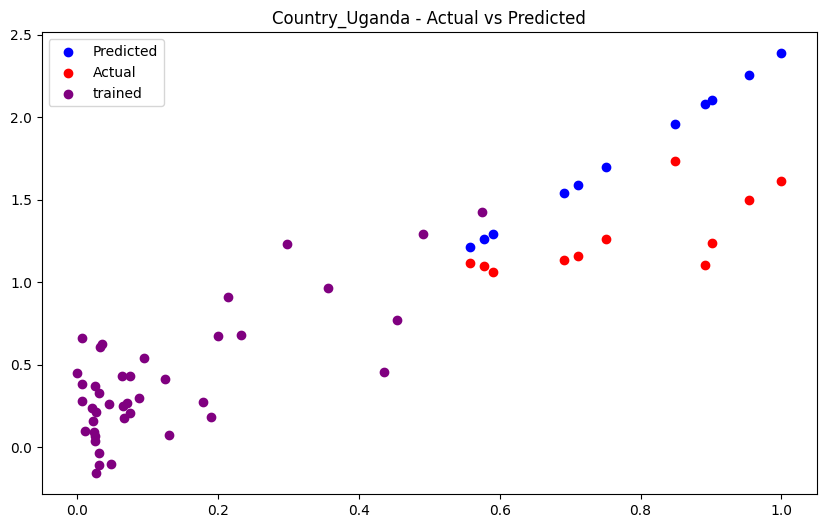

Epoch 1/50
9/9 [==============================] - 6s 126ms/step - loss: 0.4101 - val_loss: 1.5293
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3940 - val_loss: 1.4305
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3794 - val_loss: 1.3427
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3661 - val_loss: 1.2275
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3472 - val_loss: 1.0827
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3310 - val_loss: 0.9395
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3205 - val_loss: 0.7612
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3034 - val_loss: 0.6628
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2956 - val_loss: 0.5658
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2913 - val_loss: 0.4665
Epoch 11/50
9/9 [===========

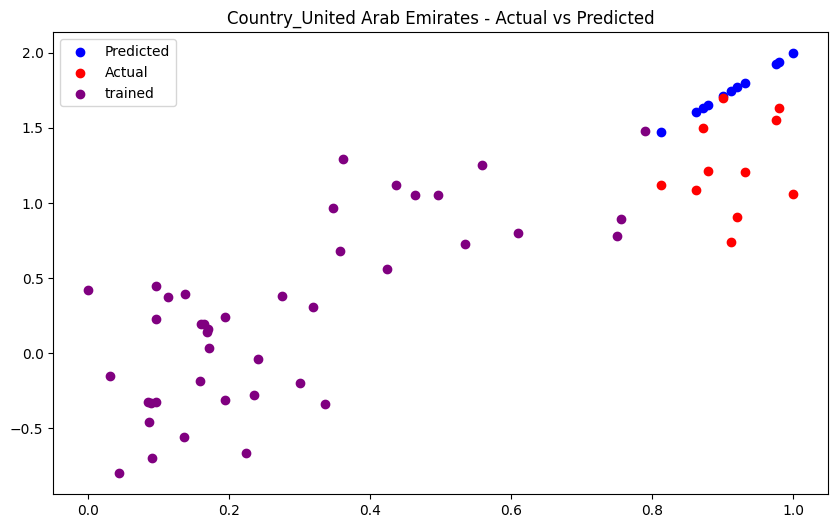

Epoch 1/50
9/9 [==============================] - 6s 143ms/step - loss: 0.4809 - val_loss: 1.1321
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4504 - val_loss: 1.0726
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.4232 - val_loss: 1.0168
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.3974 - val_loss: 0.9500
Epoch 5/50
9/9 [==============================] - 0s 19ms/step - loss: 0.3741 - val_loss: 0.8757
Epoch 6/50
9/9 [==============================] - 0s 20ms/step - loss: 0.3486 - val_loss: 0.8133
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3376 - val_loss: 0.7332
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3295 - val_loss: 0.6941
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3302 - val_loss: 0.6577
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.3329 - val_loss: 0.6656
Epoch 11/50
9/9 [===========

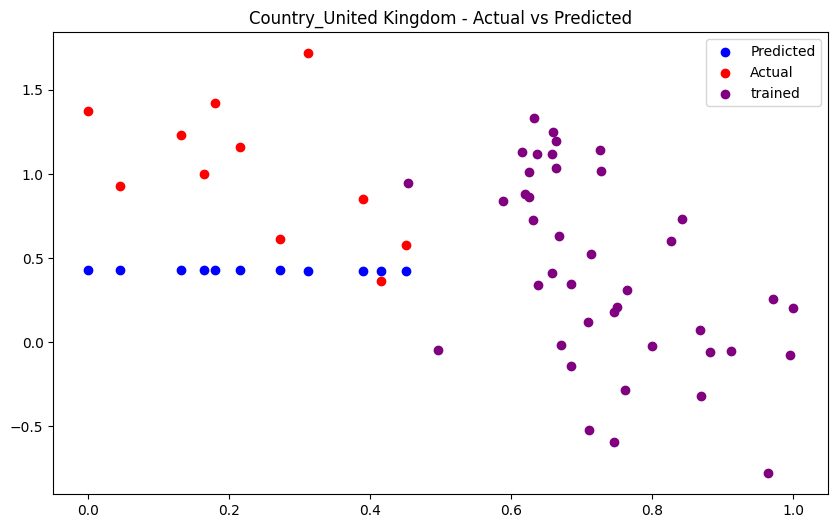

Epoch 1/50
9/9 [==============================] - 7s 183ms/step - loss: 0.3750 - val_loss: 1.5528
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3356 - val_loss: 1.4623
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3011 - val_loss: 1.3506
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2579 - val_loss: 1.2304
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.2190 - val_loss: 1.1190
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1866 - val_loss: 1.0029
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1746 - val_loss: 0.8825
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1673 - val_loss: 0.8077
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1605 - val_loss: 0.8321
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1557 - val_loss: 0.8558
Epoch 11/50
9/9 [===========

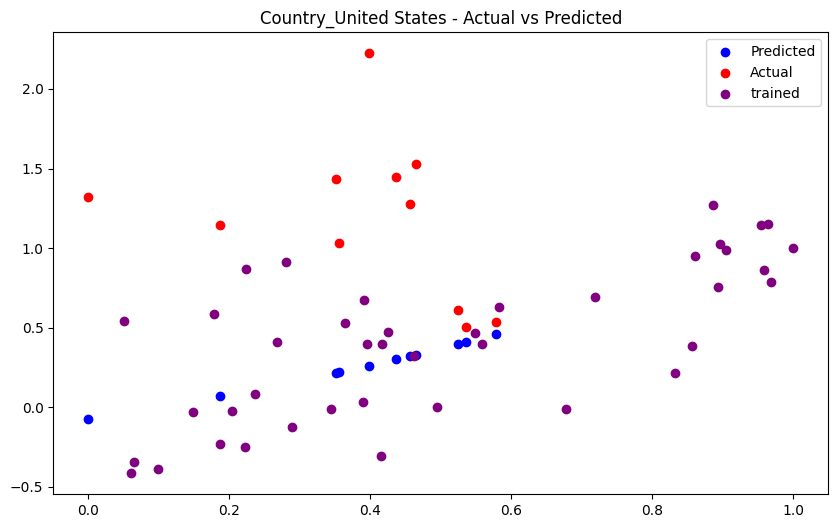

Epoch 1/50
9/9 [==============================] - 7s 218ms/step - loss: 0.2261 - val_loss: 0.7677
Epoch 2/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2047 - val_loss: 0.6953
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1843 - val_loss: 0.6321
Epoch 4/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1642 - val_loss: 0.5549
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1480 - val_loss: 0.4756
Epoch 6/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1327 - val_loss: 0.4104
Epoch 7/50
9/9 [==============================] - 0s 19ms/step - loss: 0.1283 - val_loss: 0.3669
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1280 - val_loss: 0.3393
Epoch 9/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1278 - val_loss: 0.3218
Epoch 10/50
9/9 [==============================] - 0s 21ms/step - loss: 0.1284 - val_loss: 0.3074
Epoch 11/50
9/9 [===========

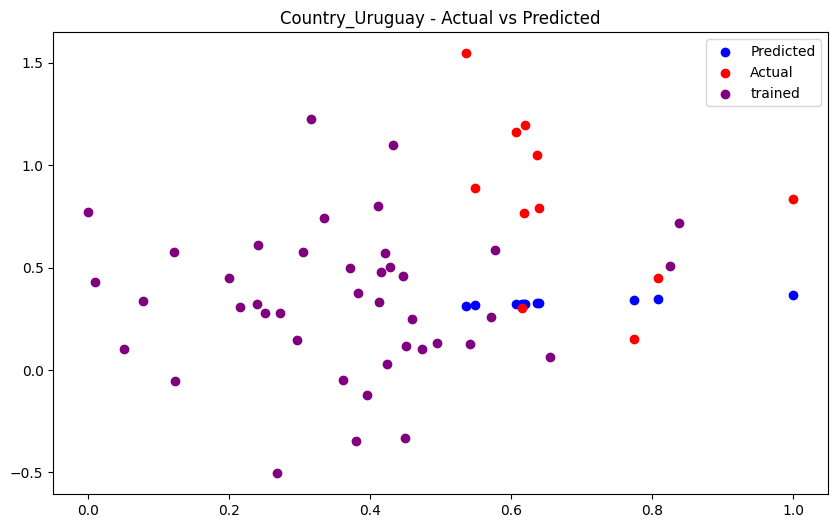

Epoch 1/50
9/9 [==============================] - 8s 212ms/step - loss: 0.1800 - val_loss: 0.6735
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1599 - val_loss: 0.5938
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1408 - val_loss: 0.5160
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1261 - val_loss: 0.4437
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1140 - val_loss: 0.3798
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1046 - val_loss: 0.3136
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0975 - val_loss: 0.2444
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0928 - val_loss: 0.1973
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0949 - val_loss: 0.1689
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0953 - val_loss: 0.1914
Epoch 11/50
9/9 [===========

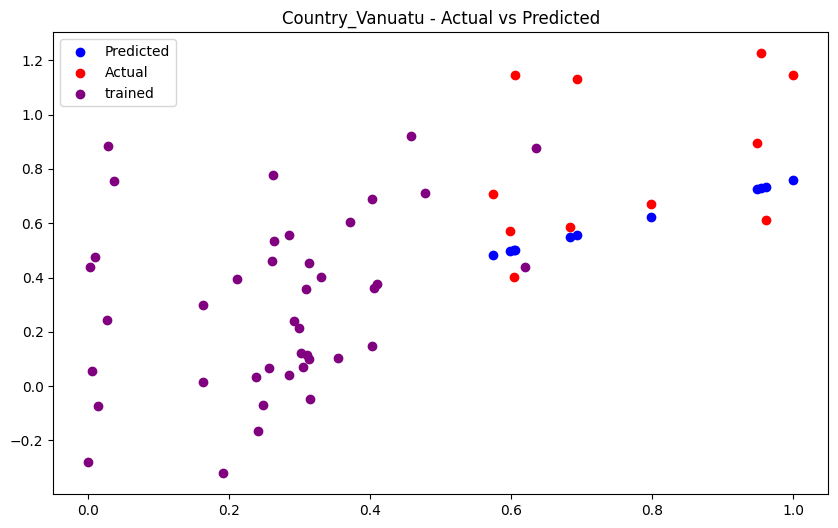

Epoch 1/50
9/9 [==============================] - 8s 177ms/step - loss: 0.2764 - val_loss: 1.1238
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2585 - val_loss: 1.0470
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2410 - val_loss: 0.9501
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2204 - val_loss: 0.8335
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2007 - val_loss: 0.6981
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1839 - val_loss: 0.5707
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1667 - val_loss: 0.4711
Epoch 8/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1598 - val_loss: 0.3770
Epoch 9/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1556 - val_loss: 0.3130
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1520 - val_loss: 0.2678
Epoch 11/50
9/9 [===========

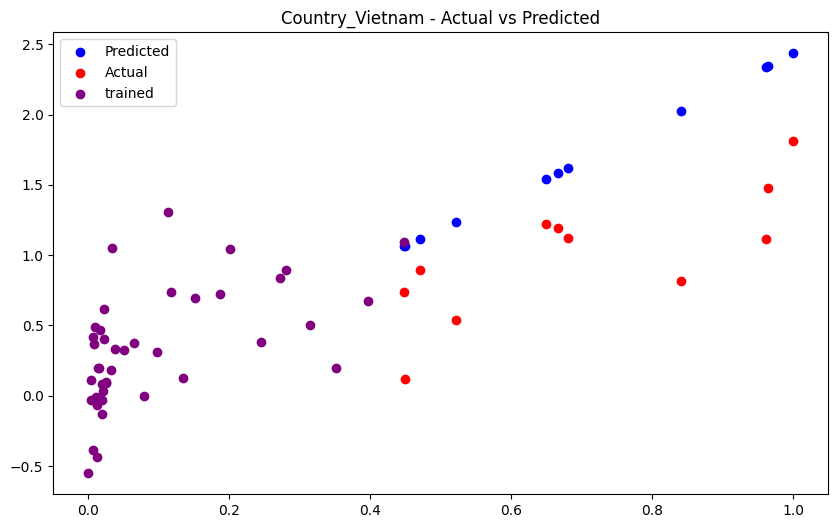

Epoch 1/50
9/9 [==============================] - 7s 182ms/step - loss: 0.9198 - val_loss: 2.4037
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.8518 - val_loss: 2.2208
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.7795 - val_loss: 2.0036
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6852 - val_loss: 1.7378
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5870 - val_loss: 1.4069
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 0.4736 - val_loss: 1.0628
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3797 - val_loss: 0.7421
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.3136 - val_loss: 0.5442
Epoch 9/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2873 - val_loss: 0.4249
Epoch 10/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2742 - val_loss: 0.3491
Epoch 11/50
9/9 [===========

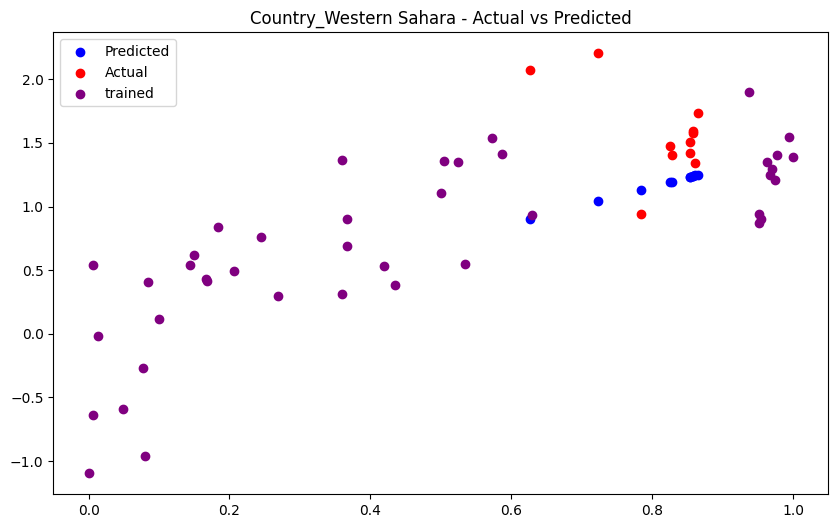

Epoch 1/50
9/9 [==============================] - 7s 217ms/step - loss: 0.2827 - val_loss: 0.8476
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.2628 - val_loss: 0.7795
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.2441 - val_loss: 0.7209
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.2236 - val_loss: 0.6511
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.2054 - val_loss: 0.5783
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.1860 - val_loss: 0.5018
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1734 - val_loss: 0.4210
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1626 - val_loss: 0.3783
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1619 - val_loss: 0.3830
Epoch 10/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1605 - val_loss: 0.3876
Epoch 11/50
9/9 [===========

Epoch 1/50
9/9 [==============================] - 8s 235ms/step - loss: 0.2346 - val_loss: 0.3363
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2217 - val_loss: 0.3146
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2132 - val_loss: 0.2909
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 0.2015 - val_loss: 0.2723
Epoch 5/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1960 - val_loss: 0.2505
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1905 - val_loss: 0.2389
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1887 - val_loss: 0.2346
Epoch 8/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1889 - val_loss: 0.2277
Epoch 9/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1877 - val_loss: 0.2246
Epoch 10/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1882 - val_loss: 0.2219
Epoch 11/50
9/9 [===========

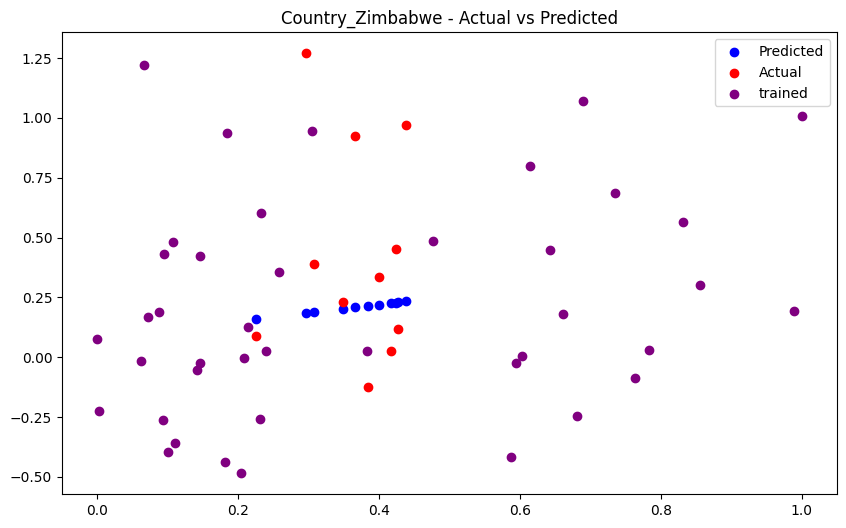

In [13]:
for country in df.columns[3:]:

  if df[country].sum() == 52:

    country_data = df[df[country] == 1][['Year', 'Temperature', 'Co2']]

    X = country_data[['Co2']].values
    y = country_data['Temperature'].values

    # Scale the data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training 80% and testing sets 20%
    split_index = int(len(X_scaled) * 0.8)
    X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Reshape
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(units=50, return_sequences=False),
        Dense(units=1)
    ])


    model.compile(optimizer='adam', loss='mse')


    model.fit(X_train, y_train, batch_size=5, epochs=50, validation_data=(X_test, y_test))


    loss = model.evaluate(X_test, y_test)
    print(f"{country} Test Loss:", loss)


    predictions = model.predict(X_test)


    mse = mean_squared_error(y_test, predictions)
    print(f"{country} MSE:", mse)


    r2 = r2_score(y_test, predictions)
    print("r^2: ", r2)



    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, predictions, color='blue', label='Predicted', marker='o')
    plt.scatter(X_test, y_test, color='red', label='Actual', marker='o')
    plt.scatter(X_train, y_train, color='purple', label='trained', marker='o')
    plt.title(f"{country} - Actual vs Predicted")
    plt.legend()
    plt.show()